## Data importing and preparing

In [3]:
import numpy as np
import pandas as pd

ESS_data = pd.read_csv("C:/Users/grego/Desktop/dataset/ESS11.csv", low_memory=False)


In [4]:
df = ESS_data[[
    "imsmetn", "imdfetn", "impcntr",
"ipcrtiva","impricha","ipeqopta","ipshabta",
"impsafea","impdiffa","ipfrulea","ipudrsta","ipmodsta","ipgdtima",
"impfreea","iphlppla","ipsucesa","ipstrgva","ipadvnta",
"ipbhprpa","iprspota","iplylfra","impenva","imptrada","impfuna",


    "gndr", "brncntr", "maritalb", "domicil",
    "eisced", "hincfel", "pdwrk",
    "agea", "lrscale", "rlgdgr", "hhmmb",
    "polintr",
    
    "trstprl", "trstlgl", "trstplc", "trstplt", "trstprt", "trstep", "trstun", "ppltrst",
    "feethngr", "cntry"
]].copy()


## Initial dataset inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46162 entries, 0 to 46161
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   imsmetn   46162 non-null  int64 
 1   imdfetn   46162 non-null  int64 
 2   impcntr   46162 non-null  int64 
 3   ipcrtiva  46162 non-null  int64 
 4   impricha  46162 non-null  int64 
 5   ipeqopta  46162 non-null  int64 
 6   ipshabta  46162 non-null  int64 
 7   impsafea  46162 non-null  int64 
 8   impdiffa  46162 non-null  int64 
 9   ipfrulea  46162 non-null  int64 
 10  ipudrsta  46162 non-null  int64 
 11  ipmodsta  46162 non-null  int64 
 12  ipgdtima  46162 non-null  int64 
 13  impfreea  46162 non-null  int64 
 14  iphlppla  46162 non-null  int64 
 15  ipsucesa  46162 non-null  int64 
 16  ipstrgva  46162 non-null  int64 
 17  ipadvnta  46162 non-null  int64 
 18  ipbhprpa  46162 non-null  int64 
 19  iprspota  46162 non-null  int64 
 20  iplylfra  46162 non-null  int64 
 21  impenva   46

In [6]:
df.head()

,imsmetn,imdfetn,impcntr,ipcrtiva,impricha,ipeqopta,ipshabta,impsafea,impdiffa,ipfrulea,...,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,ppltrst,feethngr,cntry
0,2,2,3,3,5,2,2,2,4,2,...,6,9,10,5,5,5,5,5,1,AT
1,2,2,2,2,4,2,4,4,4,4,...,6,6,4,1,0,5,5,10,8,AT
2,1,1,1,1,4,1,3,2,4,3,...,7,5,8,4,4,7,5,6,1,AT
3,2,2,2,3,4,2,3,1,4,3,...,5,6,9,3,3,4,4,6,2,AT
4,1,1,2,3,4,2,2,2,4,5,...,6,8,8,5,5,6,8,6,1,AT


Exploring the variables needed to calculate target variable 

In [7]:
# === Questions needed to calculate the target variable ===
#imsmetn: Now, using this card, to what extent do you think [country] should allow people of the same race or ethnic group as most [country]'s people to come and live here?
#imdfetn: How about people of a different race or ethnic group from most [country] people?
#impcntr: How about people from the poorer countries outside Europe?

#1	Allow many to come and live here
#2	Allow some
#3	Allow a few
#4	Allow none
#7	Refusal*
#8	Don't know*
#9	No answer*
#*) Missing Value - all the questions with '*' are considered missing values according to ESS codebook

#unique values
print("Unique values in imsmetn:", df["imsmetn"].unique())
print("Unique values in imdfetn:", df["imdfetn"].unique())
print("Unique values in impcntr:", df["impcntr"].unique())

#changing invalid responses to None
cols = ["imsmetn", "imdfetn", "impcntr"]
df[cols] = df[cols].replace([7, 8, 9, "7", "8", "9"], None)
print('====================')
print("Unique values in imsmetn:", df["imsmetn"].unique())
print("Unique values in imdfetn:", df["imdfetn"].unique())
print("Unique values in impcntr:", df["impcntr"].unique())





Unique values in imsmetn: [2 1 4 3 7 8 9]
Unique values in imdfetn: [2 1 3 4 7 8 9]
Unique values in impcntr: [3 2 1 4 7 8 9]
Unique values in imsmetn: [2 1 4 3 None]
Unique values in imdfetn: [2 1 3 4 None]
Unique values in impcntr: [3 2 1 4 None]


Exploring predictors

In [8]:
#### EXPLORING PREDICTORS
## CATEGORICAL VARIABLES
#1 - gndr: Gender

## Checking unique values
print("Unique values in gndr before recoding:", df["gndr"].unique())

# Renaming column to Gender
df = df.rename(columns={"gndr": "Gender"})

# Replacing numeric codes with text labels
df["Gender"] = df["Gender"].replace({ 1: "Male", 2: "Female"})

# Converting to categorical data type
df["Gender"] = df["Gender"].astype("category")

# Checking values after recoding
print("Unique values in Gender after recoding:", df["Gender"].unique())


Unique values in gndr before recoding: [1 2]
Unique values in Gender after recoding: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']


In [9]:
# cntry - Country code of respondent
# ==============================================================

# Checking unique country codes
print("Unique values in cntry:", df["cntry"].unique())
df = df.rename(columns={"cntry": "Country"})
df["Country"] = df["Country"].replace({"AT":"Austria","BE":"Belgium","BG":"Bulgaria","CH":"Switzerland","CY":"Cyprus","DE":"Germany","ES":"Spain",
                                       "FI":"Finland","FR":"France","GB":"United Kingdom","GR":"Greece","HR":"Croatia","HU":"Hungary","IE":"Ireland",
                                       "IL":"Israel","IS":"Iceland","IT":"Italy","LT":"Lithuania","LV":"Latvia","ME":"Montenegro","NL":"Netherlands",
                                       "NO":"Norway","PL":"Poland","PT":"Portugal","RS":"Serbia","SE":"Sweden","SI":"Slovenia","SK":"Slovakia"})

df = df[df["Country"] != "Israel"]




Unique values in cntry: ['AT' 'BE' 'BG' 'CH' 'CY' 'DE' 'ES' 'FI' 'FR' 'GB' 'GR' 'HR' 'HU' 'IE'
 'IL' 'IS' 'IT' 'LT' 'LV' 'ME' 'NL' 'NO' 'PL' 'PT' 'RS' 'SE' 'SI' 'SK']


In [10]:
#brncntr - Were you born in [country]?
# ============================================================
# 1 = Yes
# 2 = No
# 7 = Refusal*
# 8 = Don't know*
# 9 = No answer*

# Checking unique values
print("Unique values in brncntr before recoding:", df["brncntr"].unique())

df = df.rename(columns={"brncntr": "Born_in_Country"})

# Replacing numeric codes with descriptive labels
df["Born_in_Country"] = df["Born_in_Country"].replace({1:"Yes", 2:"No", 7:None, 8:None, 9:None})

# Converting to categorical data type
df["Born_in_Country"] = df["Born_in_Country"].astype("category")
# Checking values after recoding
print("Unique values in Born_in_Country after recoding:", df["Born_in_Country"].unique())


Unique values in brncntr before recoding: [1 2 7 8 9]
Unique values in Born_in_Country after recoding: ['Yes', 'No', NaN]
Categories (2, object): ['No', 'Yes']


In [11]:
# maritalb: Marital status

## Checking unique values
print("Unique values in maritalb before recoding:", df["maritalb"].unique())

# Renaming column to Marital_Status
df = df.rename(columns={"maritalb": "Marital_Status"})

# Replacing numeric codes with labels
df["Marital_Status"] = df["Marital_Status"].replace({
    1: "Legally married",
    2: "In a legally registered civil union",
    3: "Legally separated",
    4: "Legally divorced/Civil union dissolved",
    5: "Widowed/Civil partner died",
    6: "None of these (never married or in legally registered civil union)",
    77: None,  # Refusal
    88: None,  # Don't know
    99: None   # No answer
})

# Converting to categorical data type
df["Marital_Status"] = df["Marital_Status"].astype("category")

# Checking values after recoding
print("Unique values in Marital_Status after recoding:", df["Marital_Status"].unique())


Unique values in maritalb before recoding: [ 1  6  4  5  2 77 88 99  3]
Unique values in Marital_Status after recoding: ['Legally married', 'None of these (never married or in legally re..., 'Legally divorced/Civil union dissolved', 'Widowed/Civil partner died', 'In a legally registered civil union', NaN, 'Legally separated']
Categories (6, object): ['In a legally registered civil union', 'Legally divorced/Civil union dissolved', 'Legally married', 'Legally separated', 'None of these (never married or in legally re..., 'Widowed/Civil partner died']


In [12]:
#3 - domicil: Which phrase on this card best describes the area where you live?

## Checking unique values
print("Unique values in domicil before recoding:", df["domicil"].unique())

# Renaming column to Domicile
df = df.rename(columns={"domicil": "Domicile"})
# Replacing numeric codes with descriptive labels
df["Domicile"] = df["Domicile"].replace({
    1: "A big city",
    2: "Suburbs or outskirts of big city",
    3: "Town or small city",
    4: "Country village",
    5: "Farm or home in countryside",
    7: None,  # Refusal
    8: None,  # Don't know
    9: None   # No answer
})

# Converting to categorical data type
df["Domicile"] = df["Domicile"].astype("category")

# Checking values after recoding
print("Unique values in Domicile after recoding:", df["Domicile"].unique())


Unique values in domicil before recoding: [3 1 4 5 2 8 7 9]
Unique values in Domicile after recoding: ['Town or small city', 'A big city', 'Country village', 'Farm or home in countryside', 'Suburbs or outskirts of big city', NaN]
Categories (5, object): ['A big city', 'Country village', 'Farm or home in countryside', 'Suburbs or outskirts of big city', 'Town or small city']


In [13]:
# Eisced: Education level (ES-ISCED classification)
  #0:  "Not possible to harmonise into ES-ISCED",
  #1:  "ES-ISCED I, less than lower secondary",
  #2:  "ES-ISCED II, lower secondary",
  #3:  "ES-ISCED IIIb, lower tier upper secondary",
  #4:  "ES-ISCED IIIa, upper tier upper secondary",
  #5:  "ES-ISCED IV, advanced vocational, sub-degree",
  #6:  "ES-ISCED V1, lower tertiary education (BA level)",
  #7:  "ES-ISCED V2, higher tertiary education (≥ MA level)",
  #55: "Other"
  #77: Refusal*
  #88: Don't know*
  #99: No answer*

## Checking unique values
print("Unique values in eisced before recoding:", df["eisced"].unique())

# Renaming column to Education_Level
df = df.rename(columns={"eisced": "Education_Level"})

# Replacing numeric codes with descriptive labels and shorter names to better visualisation
df["Education_Level"] = df["Education_Level"].replace({
    0:  "Not possible to harmonise into ES-ISCED",
    1:  "Less than lower secondary",
    2:  "Lower secondary",
    3:  "Lower tier upper secondary",
    4:  "Upper tier upper secondary",
    5:  "Advanced vocational, sub-degree",
    6:  "Lower tertiary education (BA level)",
    7:  "Higher tertiary education (≥ MA level)",
    55: "Other",
    77: None,  # Refusal
    88: None,  # Don't know
    99: None   # No answer
})

# Converting to categorical data type
df["Education_Level"] = df["Education_Level"].astype("category")

# Checking values after recoding
print("Unique values in Education_Level after recoding:", df["Education_Level"].unique())

#no single instance of "Not possible to harmonise into ES-ISCED"


Unique values in eisced before recoding: [ 3  5  6  4  2  7 55  1 77 88 99]
Unique values in Education_Level after recoding: ['Lower tier upper secondary', 'Advanced vocational, sub-degree', 'Lower tertiary education (BA level)', 'Upper tier upper secondary', 'Lower secondary', 'Higher tertiary education (≥ MA level)', 'Other', 'Less than lower secondary', NaN]
Categories (8, object): ['Advanced vocational, sub-degree', 'Higher tertiary education (≥ MA level)', 'Less than lower secondary', 'Lower secondary', 'Lower tertiary education (BA level)', 'Lower tier upper secondary', 'Other', 'Upper tier upper secondary']


In [14]:
#6 - pdwrk: Doing last 7 days - paid work

# Checking unique values
print("Unique values in pdwrk before recoding:", df["pdwrk"].unique())
# Renaming column to Working
df = df.rename(columns={"pdwrk": "Working"})
# Replacing numeric codes with descriptive labels
df["Working"] = df["Working"].replace({0:"No", 1:"Yes"})
# Converting to categorical data type
df["Working"] = df["Working"].astype("category")

# Checking values after recoding
print("Unique values in Working after recoding:", df["Working"].unique())


Unique values in pdwrk before recoding: [0 1]
Unique values in Working after recoding: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


Human values variables --> needed to calculate Conservation and Self-Transcendence

In [ ]:
# HUMAN VALUES VARIABLES
# ipeqopta  - Important that people are treated equally and have equal opportunities
# ipudrsta  - Important to understand different people
# impenva   - Important to care for nature and environment
# iphlppla  - Important to help people and care for others’ well-being
# iplylfra  - Important to be loyal to friends and devote to people close
# ipmodsta  - Important to be humble and modest, not draw attention
# imptrada  - Important to follow traditions and customs
# ipbhprpa  - Important to behave properly
# ipfrulea  - Important to do what is told and follow rules
# impsafea  - Important to live in secure and safe surroundings
# ipstrgva  - Important that government is strong and ensures safety
 #
 # 
# "ipcrtiva",  # Important to think new ideas / be creative
   # "impricha",  # Important to be rich
   # "ipshabta",  # Important to show abilities and be admired
  #  "impdiffa",  # Important to try new and different things
  #  "ipgdtima",  # Important to have a good time
  #  "impfreea",  # Important to make own decisions / be free
   # "ipsucesa",  # Important to be successful
    #"ipadvnta",  # Important to seek adventures / exciting life
   # "iprspota",  # Important to get respect from others
  #  "impfuna"    # Important to seek fun and things that give pleasure

#Answers:
#1	Very much like me
#2	Like me
#3	Somewhat like me
#4	A little like me
#5	Not like me
#6	Not like me at all
#66	Not applicable*
#77	Refusal*
#88	Don't know*
#99	No answer*


# Check unique values

schwartz_cols = [
    
    "impsafea","ipstrgva","ipfrulea","ipbhprpa","ipmodsta","imptrada",
    "ipeqopta","ipudrsta","impenva","iphlppla","iplylfra",
    
    "ipcrtiva",  
    "impricha",  
    "ipshabta",  
    "impdiffa",  
    "ipgdtima",  
    "impfreea",  
    "ipsucesa",  
    "ipadvnta",  
    "iprspota",  
    "impfuna"    
]
for col in schwartz_cols:
    print(f"Unique values in {col}:", df[col].unique())

# Replace invalid responses (66, 77, 88, 99) with None

for col in schwartz_cols:
    df[col] = df[col].replace({66: None, 77: None, 88: None, 99: None})


Unique values in impsafea: [ 2  4  1  3 88 77  5  6 66 99]
Unique values in ipstrgva: [ 2  3  1  4 88 77  5  6 66 99]
Unique values in ipfrulea: [ 2  4  3  5  1 88  6 77 66 99]
Unique values in ipbhprpa: [ 2  3  1 88  4  6 77  5 66 99]
Unique values in ipmodsta: [ 2  3  4  1  5 88  6 77 66 99]
Unique values in imptrada: [ 3  4  2  1 88  5  6 77 66 99]
Unique values in ipeqopta: [ 2  1  3 88  4  5  6 77 66 99]
Unique values in ipudrsta: [ 2  1  3  4 88  5  6 77 66 99]
Unique values in impenva: [ 2  1  3  4 88  5 77 66  6 99]
Unique values in iphlppla: [ 2  1  3  4 88  5 77 66  6 99]
Unique values in iplylfra: [ 2  1 88  3  4  5 77 66  6 99]
Unique values in ipcrtiva: [ 3  2  1  4 88  6  5 77 66 99]
Unique values in impricha: [ 5  4  2  6  3 88 77  1 66 99]
Unique values in ipshabta: [ 2  4  3  1  5 88  6 77 66 99]
Unique values in impdiffa: [ 4  2  3  1 88  6  5 77 66 99]
Unique values in ipgdtima: [ 2  3  4  1 88  5 77  6 66 99]
Unique values in impfreea: [ 2  3  1  4 88  5 77  6 66 99

In [16]:
# ==============================================================
# agea - Age of respondent (calculated)
# ==============================================================
#numerical variable
#999* - Not available

df["agea"] = df["agea"].replace({999: None})
df = df.rename(columns={"agea": "Age"})
df["Age"].unique()

array([65, 21, 53, 78, 64, 59, 77, 69, 52, 75, 44, 49, 63, 76, 30, 67, 41,
       82, 26, 42, 85, 72, 31, 47, 50, 60, 43, 35, 36, 46, 81, 57, 38, 58,
       79, 25, 34, 74, 28, 16, 71, 20, 80, 51, 87, 61, 89, 68, 24, 32, 45,
       33, 27, 73, 62, 90, 70, 18, 83, 86, 39, 48, 54, 23, 55, 17, 29, 56,
       19, 66, 40, 84, 22, 88, 37, 15, None], dtype=object)

In [17]:
# hincfel - Feeling about household's income nowadays
# 1 = Living comfortably on present income
# 2 = Coping on present income
# 3 = Difficult on present income
# 4 = Very difficult on present income
# 7 = Refusal*
# 8 = Don't know*
# 9 = No answer*
df["hincfel"].unique()
# Replacing invalid codes (7, 8, 9) with None
df["hincfel"] = df["hincfel"].replace({7: None, 8: None, 9: None})
df["hincfel"] = df["hincfel"].map({1:4, 2:3, 3:2, 4:1})
df = df.rename(columns={"hincfel": "Household_income_feeling"})
print("Unique values in hincfel (after):", df["Household_income_feeling"].unique())




Unique values in hincfel (after): [ 4.  3.  1.  2. nan]


In [18]:
# lrscale - Placement on left-right political scale
# --------------------------------------------------------------
# 0 = Left
# 1–9 = Intermediate positions
# 10 = Right
# 77 = Refusal*
# 88 = Don't know*
# 99 = No answer*
print("Unique before:", df["lrscale"].unique())
# Replacing invalid codes (77, 88, 99) with None
df["lrscale"] = df["lrscale"].replace({77: None, 88: None, 99: None})
df = df.rename(columns={"lrscale": "Left–Right_self-placement"})


Unique before: [ 5  0  3  2  4 77  6 88  9  7  8 10  1 99]


In [19]:
# rlgdgr - How religious are you
# 0 = Not at all religious
# 1–9 = Intermediate positions
# 10 = Very religious
# 77 = Refusal*
# 88 = Don't know*
# 99 = No answer*
# ==============================================================
# Pokaż unikalne wartości PRZED zamianą
print("Unique before:", df["rlgdgr"].unique())

# Replacing invalid codes (77, 88, 99) with None
df["rlgdgr"] = df["rlgdgr"].replace({77: None, 88: None, 99: None})
df = df.rename(columns={"rlgdgr": "Religiosity"})




Unique before: [ 5  0  8  6  1  3 10  9  7  4  2 77 88 99]


In [20]:
#polintr - How interested would you say you are in politics - are you...
#1	Very interested
#2	Quite interested
#3	Hardly interested
#4	Not at all interested
#7	Refusal*
#8	Don't know*
#9	No answer*
#*) Missing Value

df["polintr"].unique()
# Replacing invalid codes (7, 8, 9) with None
df["polintr"] = df["polintr"].replace({7: None, 8: None, 9: None})
df["polintr"] = df["polintr"].map({1:4, 2:3, 3:2, 4:1})
df = df.rename(columns={"polintr": "Interest_in_politics"})
print("Unique values in polintr (after):", df["Interest_in_politics"].unique())

Unique values in polintr (after): [ 4.  3.  2.  1. nan]


In [21]:
# hhmmb - Number of people living in household
# Numeric value = total number of household members
# 77 = Refusal*
# 88 = Don't know*
# 99 = No answer*
## Pokaż unikalne wartości PRZED zamianą
print("Unique before:", df["hhmmb"].unique())

# Replacing invalid codes (77, 88, 99) with None
df["hhmmb"] = df["hhmmb"].replace({77: None, 88: None, 99: None})
df = df.rename(columns={"hhmmb": "Household size"})



Unique before: [ 2  1  3  4  5  7  0  6  8 77 12  9 88 99 10 11]


In [ ]:
#since it is impossible that 0 people live in the household, instances containing these values are removed

zero_cnt = (df["Household size"] == 0).sum()
print("Number of instances with Household size == 0:", zero_cnt)
#only 7 instances with '0', so they are removed


df = df[df["Household size"] != 0].copy()


Number of instances with Household size == 0: 7


In [23]:
# TRUST VARIABLES
# --------------------------------------------------------------
# trstprl  - Trust in country's parliament
# trstlgl  - Trust in the legal system
# trstplc  - Trust in the police
# trstplt  - Trust in politicians
# trstprt  - Trust in political parties
# trstep   - Trust in the European Parliament
# trstun   - Trust in the United Nations
# ppltrst  - Most people can be trusted or you can't be too careful       
# --------------------------------------------------------------
# Invalid codes: 77 = Refusal*, 88 = Don't know*, 99 = No answer*
# ==============================================================

trust_cols = ["trstprl", "trstlgl", "trstplc", "trstplt","trstprt", "trstep", "trstun", "ppltrst"]
for col in trust_cols:
    df[col] = df[col].replace({77: None, 88: None, 99: None})

df = df.rename(columns={"trstprl": "Trust in country's parliament"})
df = df.rename(columns={"trstlgl": "Trust in the legal system"})
df = df.rename(columns={"trstplc": "Trust in the police"})
df = df.rename(columns={"trstplt": "Trust in politicians"})
df = df.rename(columns={"trstprt": "Trust in political parties"})
df = df.rename(columns={"trstep": "Trust in the European Parliament"})
df = df.rename(columns={"trstun": "Trust in the United Nations"})
df = df.rename(columns={"ppltrst": "Social trust"})


In [24]:

# feethngr - Feel part of same race or ethnic group as most people in country
# --------------------------------------------------------------
# 1 = Yes
# 2 = No
# 7 = Refusal*
# 8 = Don't know*
# 9 = No answer*
# Checking unique values before recoding
print("Unique values in feethngr before recoding:", df["feethngr"].unique())

# Renaming column to more descriptive name
df = df.rename(columns={"feethngr": "Ethnic_majority"})

# Replacing numeric codes with descriptive labels
df["Ethnic_majority"] = df["Ethnic_majority"].replace({1: "Yes",2: "No",7: None,8: None,9: None})
# Converting to categorical data type
df["Ethnic_majority"] = df["Ethnic_majority"].astype("category")
# Checking values after recoding
print("Unique values in Ethnic_majority after recoding:", df["Ethnic_majority"].unique())



Unique values in feethngr before recoding: [1 8 2 7 9]
Unique values in Ethnic_majority after recoding: ['Yes', NaN, 'No']
Categories (2, object): ['No', 'Yes']


In [26]:
# ==============================================================
# Missing values report (count + percentage per column)
# ==============================================================

missing_count = df.isna().sum()
missing_pct = df.isna().mean() * 100

missing_report = (
    pd.DataFrame({
        "Missing_count": missing_count,
        "Missing_pct": missing_pct.round(2)
    })
    .sort_values("Missing_pct", ascending=False)
)

print("Missing values per column (count and percentage):")
print(missing_report)


Missing values per column (count and percentage):
                                  Missing_count  Missing_pct
Left–Right_self-placement                  5998        13.26
Trust in the United Nations                3306         7.31
Trust in the European Parliament           2809         6.21
ipfrulea                                   1065         2.35
ipstrgva                                   1049         2.32
impcntr                                     984         2.17
imdfetn                                     951         2.10
Trust in the legal system                   945         2.09
imsmetn                                     935         2.07
iprspota                                    922         2.04
Trust in country's parliament               882         1.95
ipbhprpa                                    880         1.94
ipudrsta                                    861         1.90
ipsucesa                                    849         1.88
ipcrtiva                           

In [27]:
#Deleting invalid responsed incolumns required to compute the target feature and calculating target
#imsmetn: Now, using this card, to what extent do you think [country] should allow people of the same race or ethnic group as most [country]'s people to come and live here?
#imdfetn: How about people of a different race or ethnic group from most [country] people?
#impcntr: How about people from the poorer countries outside Europe?
#1	Allow many to come and live here
#2	Allow some
#3	Allow a few
#4	Allow none
#7	Refusal* - already as None
#8	Don't know* - already as None
#9	No answer* - already as None

cols = ["imsmetn", "imdfetn", "impcntr"]
df = df.dropna(subset=cols).copy()

# Target calculation
df["reject_mean"] = df[cols].mean(axis=1, skipna=False)
df["reject"] = (df["reject_mean"] > 2.5).astype(int)
# 1 - negative attitude towards immigration
# 2 - positive attitude towards immigration

# Deleting rows required to compute the target
df = df.drop(columns=["reject_mean"] + cols)

# Target proportions
print("Counts")
print(df["reject"].value_counts())
print("\n Proportions")
print(df["reject"].value_counts(normalize=True).round(3))


Counts
reject
0    26795
1    16951
Name: count, dtype: int64

 Proportions
reject
0    0.613
1    0.387
Name: proportion, dtype: float64


### Target visualisation

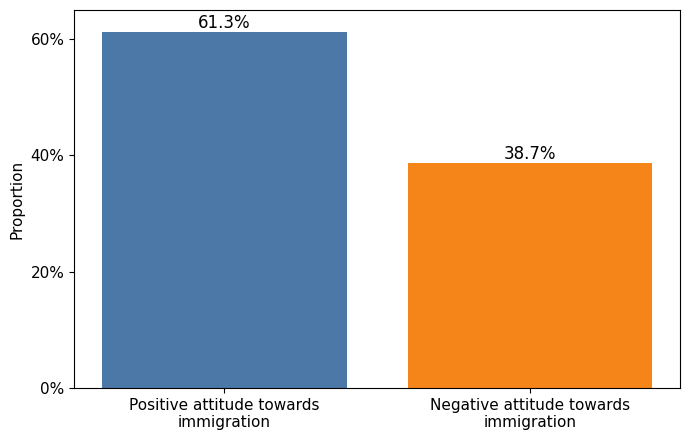

In [ ]:
import matplotlib.pyplot as plt


props = df["reject"].value_counts(normalize=True).reindex([0, 1]).fillna(0)

labels = ["Positive attitude towards\nimmigration", "Negative attitude towards\nimmigration"]

fig, ax = plt.subplots(figsize=(7, 4.5))
colors = ["#4C78A8", "#F58518"]
ax.bar([0, 1], props.values, color=colors)


for i, p in enumerate(props.values):
    ax.text(i, p, f"{p*100:.1f}%", ha="center", va="bottom", fontsize=12)

ax.set_xticks([0, 1])
ax.set_xticklabels(labels, ha="center", fontsize=11)  
ax.set_ylabel("Proportion", fontsize=11)            

ax.set_yticks([0, 0.2, 0.4, 0.6])
ax.set_yticklabels(["0%", "20%", "40%", "60%"], fontsize=11)  
ax.set_ylim(0, 0.65)


plt.tight_layout()

plt.savefig("target_distribution.png", dpi=300, bbox_inches="tight")
plt.savefig("target_distribution.svg", bbox_inches="tight")
plt.show()


### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Prepare X (features) and y (target)
target = "reject"
X = df.drop(columns=[target])
y = df[target].astype(int)  # make sure target is integer (0/1)


# Lists to store country level splits
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []


# 2. Split data inside each country separately
for country, idx in X.groupby("Country").groups.items():
    X_c = X.loc[idx]      # rows for one country (features)
    y_c = y.loc[idx]      # rows for one country (target)

    # stratified train/test split for this country
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_c,
        y_c,
        test_size=0.20,      # 20% test set inside each country
        stratify=y_c,        # keep class balance in train and test
        random_state=42
    )

    # store results in the lists
    X_train_list.append(X_train_c)
    X_test_list.append(X_test_c)
    y_train_list.append(y_train_c)
    y_test_list.append(y_test_c)


# 3. Combine all country splits into one global train and test set
#    (we keep original indices, no reset)
X_train = pd.concat(X_train_list, axis=0)
X_test = pd.concat(X_test_list, axis=0)
y_train = pd.concat(y_train_list, axis=0)
y_test = pd.concat(y_test_list, axis=0)


In [30]:
col_cat = ["Gender", "Born_in_Country", "Marital_Status", "Domicile", "Education_Level", "Working", "Ethnic_majority", "Country"]

col_num = ["Left–Right_self-placement","Trust in the United Nations","Trust in the European Parliament","ipfrulea","ipstrgva","Trust in the legal system","Trust in country's parliament","ipbhprpa","ipudrsta","ipmodsta","imptrada","Trust in political parties","ipeqopta","impenva","iphlppla","iplylfra","impsafea","Trust in politicians","Household_income_feeling","Trust in the police","Age","Religiosity","Social trust","Household size","Interest_in_politics","ipcrtiva","impricha","ipshabta","impdiffa","ipgdtima","impfreea","ipsucesa","ipadvnta","iprspota","impfuna"]


 Handling missing values

In [ ]:
import pandas as pd

# ============================
# 1. NUMERICAL: median per country (computed on TRAIN)
# ============================
for col in col_num:
    # compute country specific medians in TRAIN
    medians = X_train.groupby("Country")[col].median()

    # impute in TRAIN: NA -> country median from TRAIN
    X_train[col] = X_train[col].fillna(X_train["Country"].map(medians))

    # impute in TEST: NA -> country median from TRAIN
    X_test[col] = X_test[col].fillna(X_test["Country"].map(medians))


# ============================
# 2. CATEGORICAL: mode per country (computed on TRAIN)
# ============================
for col in col_cat:
    # compute country specific mode in TRAIN
    modes = (
        X_train.groupby("Country")[col]
        .agg(lambda s: s.mode().iloc[0])  # take the first mode if there are several
    )

    # impute in TRAIN
    X_train[col] = X_train[col].fillna(X_train["Country"].map(modes))

    # impute in TEST (still using TRAIN modes)
    X_test[col] = X_test[col].fillna(X_test["Country"].map(modes))


C:\Users\grego\AppData\Local\Temp\ipykernel_8480\883311369.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].fillna(X_train["Country"].map(medians))
C:\Users\grego\AppData\Local\Temp\ipykernel_8480\883311369.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[col] = X_test[col].fillna(X_test["Country"].map(medians))
C:\Users\grego\AppData\Local\Temp\ipykernel_8480\883311369.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.

Outliers detection

In [32]:
# Checking outliers in 'agea' using the IQR method   only on X_train
import pandas as pd
Q1 = X_train['Age'].quantile(0.25)
Q3 = X_train['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = X_train[(X_train['Age'] < lower_bound) | (X_train['Age'] > upper_bound)]

print(f"Number of outliers in 'Age': {len(outliers)}")
print(sorted(pd.unique(outliers['Age'])))


Number of outliers in 'Age': 0
[]


In [33]:
# IQR  only on train
import pandas as pd
Q1 = X_train['Household size'].quantile(0.25)
Q3 = X_train['Household size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = X_train[(X_train['Household size'] < lower_bound) | (X_train['Household size'] > upper_bound)]

print(f"Number of outliers in Household size : {len(outliers)}")
print(sorted(pd.unique(outliers['Household size'])))
##however it is possible for 5 or more people to live in the same household, so these values aer not removed.
##In feature engineering they are going to be grouped, followed by approach from literature,
##in 4 bins: 1 person, 2 people, 3-5 people, 6 people or more


Number of outliers in Household size : 2696
[np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0)]


In [34]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34987 entries, 1906 to 17193
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ipcrtiva                          34987 non-null  float64 
 1   impricha                          34987 non-null  float64 
 2   ipeqopta                          34987 non-null  float64 
 3   ipshabta                          34987 non-null  float64 
 4   impsafea                          34987 non-null  float64 
 5   impdiffa                          34987 non-null  float64 
 6   ipfrulea                          34987 non-null  float64 
 7   ipudrsta                          34987 non-null  float64 
 8   ipmodsta                          34987 non-null  float64 
 9   ipgdtima                          34987 non-null  float64 
 10  impfreea                          34987 non-null  float64 
 11  iphlppla                          34987 non-null  float6

### Calculating variables: Self-Transcendence and Conservation

In [ ]:
import pandas as pd

# ============================
# 1. PVQ ITEM LISTS (21 items)
# ============================
pvq_21 = [
    "ipcrtiva","impricha","ipeqopta","ipshabta","impsafea","impdiffa",
    "ipfrulea","ipudrsta","ipmodsta","ipgdtima","impfreea","iphlppla",
    "ipsucesa","ipstrgva","ipadvnta","ipbhprpa","iprspota","iplylfra",
    "impenva","imptrada","impfuna"
]

# 5 basic values that form ST and Conservation
universalism_items = ["ipeqopta", "ipudrsta", "impenva"]
benevolence_items  = ["iphlppla", "iplylfra"]
security_items     = ["impsafea", "ipstrgva"]
conformity_items   = ["ipfrulea", "ipbhprpa"]
tradition_items    = ["imptrada", "ipmodsta"]


# ============================
# 2. FUNCTION ADDING PVQ FEATURES
# ============================
def add_pvq_features(X: pd.DataFrame) -> pd.DataFrame:
    X = X.copy()

    # --- reverse scale 1–6 -> 6–1 ---
    X[pvq_21] = X[pvq_21].apply(pd.to_numeric, errors="coerce")
    X[pvq_21] = 7 - X[pvq_21]

    # --- raw basic values ---
    X["universalism_raw"] = X[universalism_items].mean(axis=1)
    X["benevolence_raw"]  = X[benevolence_items].mean(axis=1)
    X["security_raw"]     = X[security_items].mean(axis=1)
    X["conformity_raw"]   = X[conformity_items].mean(axis=1)
    X["tradition_raw"]    = X[tradition_items].mean(axis=1)

    # --- mean of all 21 items ---
    X["mean_all_items"] = X[pvq_21].mean(axis=1)

    # --- centering basic values ---
    X["universalism_c"] = X["universalism_raw"] - X["mean_all_items"]
    X["benevolence_c"]  = X["benevolence_raw"]  - X["mean_all_items"]
    X["security_c"]     = X["security_raw"]     - X["mean_all_items"]
    X["conformity_c"]   = X["conformity_raw"]   - X["mean_all_items"]
    X["tradition_c"]    = X["tradition_raw"]    - X["mean_all_items"]

    # --- two higher order dimensions ---
    X["Self_Transcendence"] = X[["universalism_c", "benevolence_c"]].mean(axis=1)
    X["Conservation"]       = X[["security_c", "conformity_c", "tradition_c"]].mean(axis=1)

    # --- cleanup: keep only ST and Conservation ---
    X = X.drop(
        columns=pvq_21 + [
            "universalism_raw","benevolence_raw","security_raw",
            "conformity_raw","tradition_raw",
            "universalism_c","benevolence_c","security_c",
            "conformity_c","tradition_c",
            "mean_all_items"
        ],
        errors="ignore"
    )

    return X


# ============================
# 3. APPLYING TO  DATASETS
# ============================


X_train = add_pvq_features(X_train)
X_test  = add_pvq_features(X_test)


In [36]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34987 entries, 1906 to 17193
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            34987 non-null  category
 1   Born_in_Country                   34987 non-null  category
 2   Marital_Status                    34987 non-null  category
 3   Domicile                          34987 non-null  category
 4   Education_Level                   34987 non-null  category
 5   Household_income_feeling          34987 non-null  float64 
 6   Working                           34987 non-null  category
 7   Age                               34987 non-null  float64 
 8   Left–Right_self-placement         34987 non-null  float64 
 9   Religiosity                       34987 non-null  float64 
 10  Household size                    34987 non-null  float64 
 11  Interest_in_politics              34987 non-null  float6

In [37]:
import numpy as np
import pandas as pd

def add_hhmmb_band(D):
    hh = D["Household size"]
    labels = np.empty(len(hh), dtype=object); labels[:] = None
    labels[hh == 1] = "1 person"
    labels[hh == 2] = "2 people"
    labels[(hh >= 3) & (hh <= 5)] = "3–5 people"
    labels[hh >= 6] = "6+ people"

    D["Household size"] = pd.Categorical(
        labels,
        categories=["1 person", "2 people", "3–5 people", "6+ people"],
        ordered=True)
    return D


X_train = add_hhmmb_band(X_train)
X_test  = add_hhmmb_band(X_test)


### Preparing datasets: with and without trust related columns

In [ ]:


trust_cols_named = [
    "Social trust",
    "Trust in the United Nations",
    "Trust in the European Parliament",
    "Trust in the legal system",
    "Trust in country's parliament",
    "Trust in political parties",
    "Trust in politicians",
    "Trust in the police",
]

X_train_notrust = X_train.drop(columns=[c for c in trust_cols_named if c in X_train.columns], errors="ignore").copy()
X_test_notrust  = X_test.drop(columns=[c for c in trust_cols_named if c in X_test.columns], errors="ignore").copy()


In [39]:
X_train_notrust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34987 entries, 1906 to 17193
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     34987 non-null  category
 1   Born_in_Country            34987 non-null  category
 2   Marital_Status             34987 non-null  category
 3   Domicile                   34987 non-null  category
 4   Education_Level            34987 non-null  category
 5   Household_income_feeling   34987 non-null  float64 
 6   Working                    34987 non-null  category
 7   Age                        34987 non-null  float64 
 8   Left–Right_self-placement  34987 non-null  float64 
 9   Religiosity                34987 non-null  float64 
 10  Household size             34987 non-null  category
 11  Interest_in_politics       34987 non-null  float64 
 12  Ethnic_majority            34987 non-null  category
 13  Country                    34987 

In [40]:
cat_columns = X_train.select_dtypes(include=["object", "category"]).columns
num_columns = X_train.select_dtypes(include=["int64", "float64"]).columns


### Data visualisation

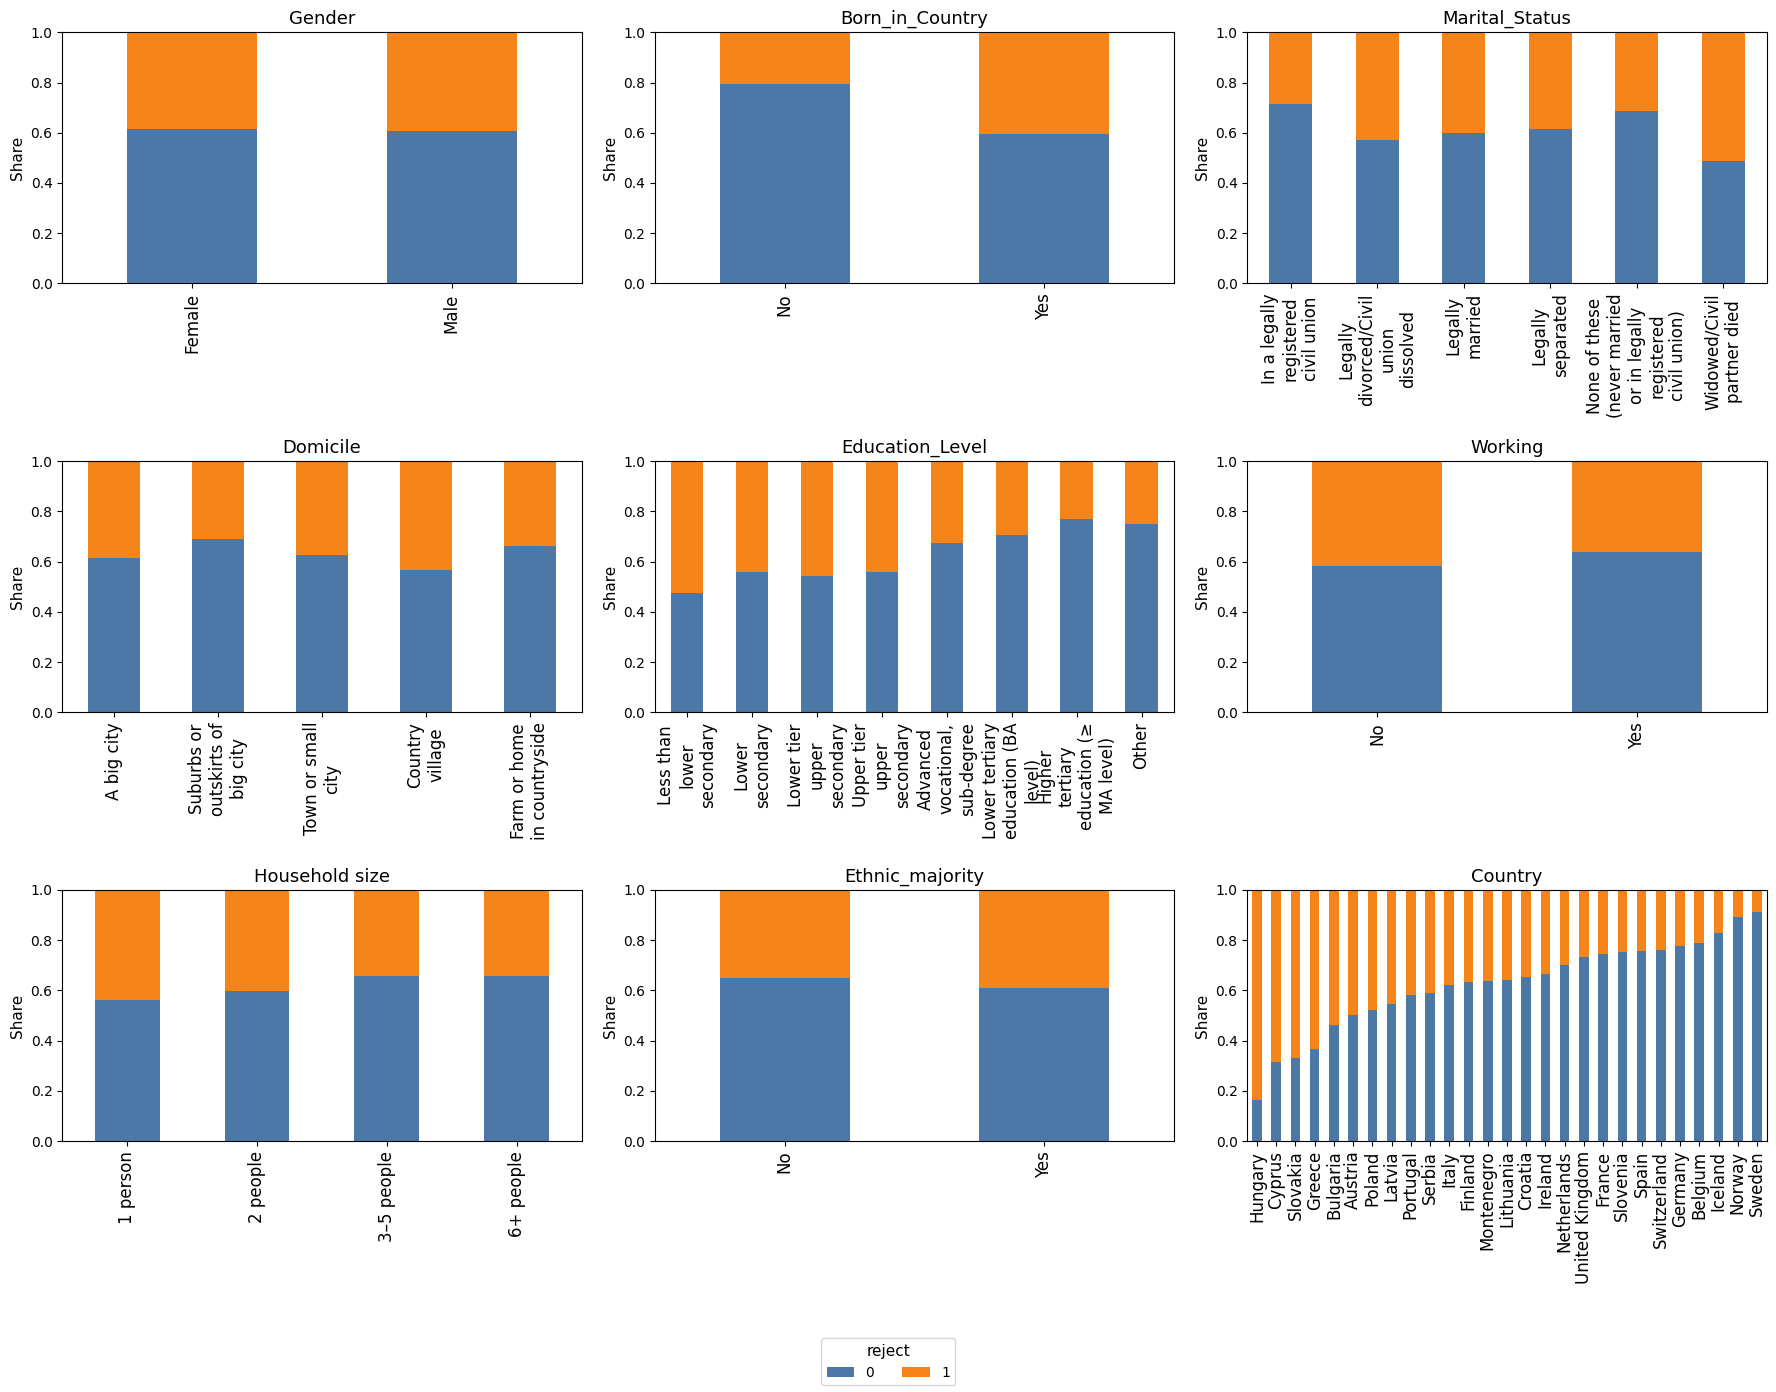

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import fill

# combining X_train and target variable using indexes - split is already done so it is needed
tmp = X_train_notrust.copy()
tmp["reject"] = y_train.loc[X_train_notrust.index].to_numpy()

cats = cat_columns

dom_order_full = [
    "A big city",
    "Suburbs or outskirts of big city",
    "Town or small city",
    "Country village",
    "Farm or home in countryside",
]

# kolejność poziomów edukacji – od najniższego do najwyższego
educ_order_full = [
    "Less than lower secondary",
    "Lower secondary",
    "Lower tier upper secondary",
    "Upper tier upper secondary",
    "Advanced vocational, sub-degree",
    "Lower tertiary education (BA level)",
    "Higher tertiary education (≥ MA level)",
    "Other",
]

for page, start in enumerate(range(0, len(cats), 9), start=1):
    subset = cats[start:start+9]
    # większe wykresy
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    axes = axes.flatten()

    for ax, col in zip(axes, subset):
        ct = (
            pd.crosstab(tmp[col], tmp["reject"], normalize="index")
            .reindex(columns=[0, 1], fill_value=0)
        )

        # specjalne zasady
        if col == "Domicile":
            # converting the order of the place of living
            existing = [c for c in dom_order_full if c in ct.index]
            ct = ct.reindex(existing)

        elif col == "Education_Level":  # rosnący poziom edukacji
            existing = [e for e in educ_order_full if e in ct.index]
            ct = ct.reindex(existing)

        elif col == "Country":
            if 1 in ct.columns:
                # odwrotne ułożenie krajów (malejąco po udziale klasy 1)
                ct = ct.sort_values(1, ascending=False)

        ct.plot(
            kind="bar",
            stacked=True,
            ax=ax,
            color=["#4C78A8", "#F58518"],
            legend=False
        )

        ax.set_title(col, fontsize=13)
        ax.set_ylabel("Share", fontsize=11)
        ax.set_xlabel("")

        ax.set_ylim(0, 1)

        ax.set_xticklabels(
            [fill(t.get_text(), width=14) for t in ax.get_xticklabels()],
            rotation=90,
            ha="center",
            fontsize=12,   # większe podpisy kategorii
        )

        ax.tick_params(axis="y", labelsize=10)  # większe liczby na osi Y

    handles, _ = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        ["0", "1"],
        title="reject",
        loc="lower center",
        ncol=2,
        fontsize=10,
        title_fontsize=11
    )
    plt.tight_layout(rect=[0, 0.06, 1, 1])
    fig.savefig(f"categorical_distributions_page_{page}.png", dpi=300, bbox_inches="tight")
    fig.savefig(f"categorical_distributions_page_{page}.svg", bbox_inches="tight")

    plt.show()


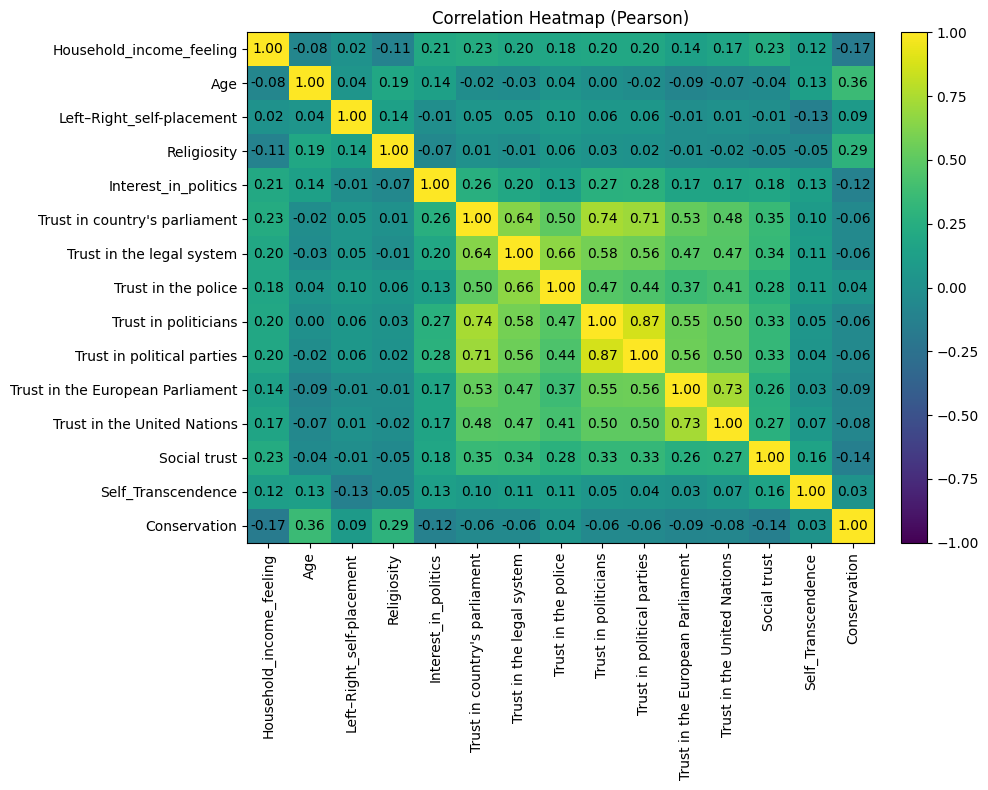

In [102]:
#correlation heatmap preparation

import numpy as np
import matplotlib.pyplot as plt

corr = X_train[num_columns].corr().round(2)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values, aspect='auto', vmin=-1, vmax=1)  # skala -1..1

ax.set_xticks(np.arange(corr.shape[1])); ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(np.arange(corr.shape[0])); ax.set_yticklabels(corr.index)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha='center', va='center')

ax.set_title("Correlation Heatmap (Pearson)")
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)


plt.tight_layout()
fig.savefig("corr_matrix.png", dpi=300, bbox_inches="tight")
fig.savefig("corr_matrix.svg", bbox_inches="tight")
plt.show()


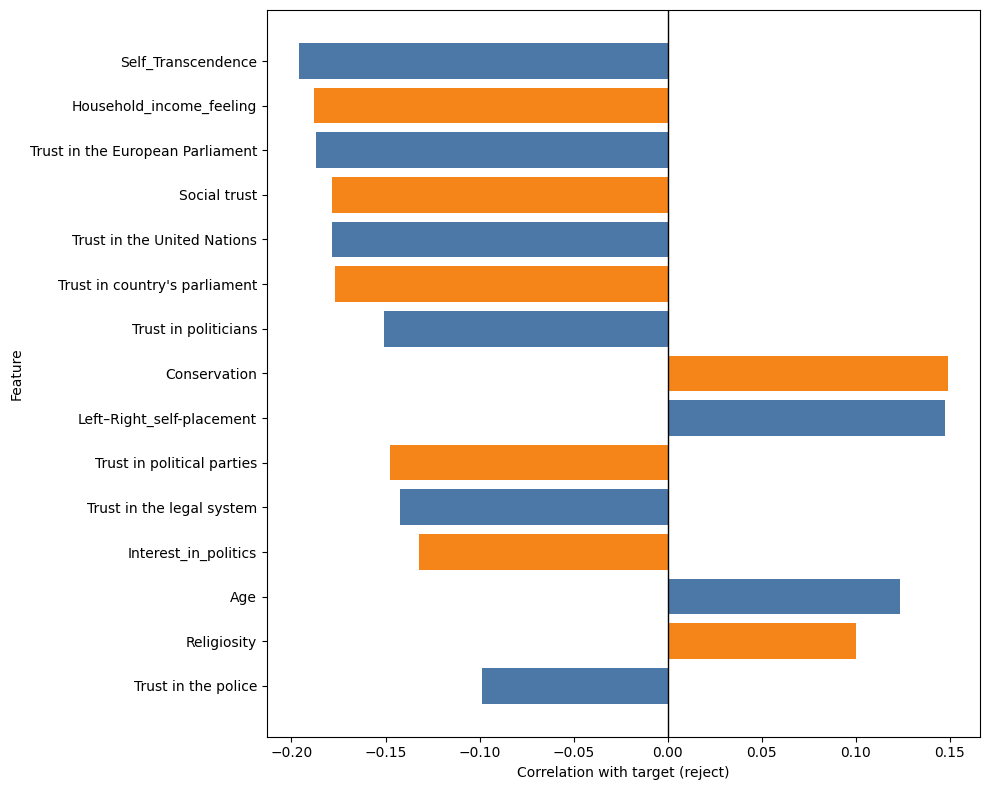

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# combining X_train and target variable using indexes - split is already done so it is needed
tmp = X_train.copy()
tmp["reject"] = y_train.loc[X_train.index].to_numpy()

corr = tmp[num_columns].astype(float).corrwith(tmp["reject"].astype(float))
corr_sorted = corr.reindex(corr.abs().sort_values(ascending=True).index)

plt.figure(figsize=(10, 8))
plt.barh(corr_sorted.index, corr_sorted.values, color=colors, edgecolor="none")
plt.axvline(0, color="k", linewidth=1)
plt.xlabel("Correlation with target (reject)")
plt.ylabel("Feature")
plt.tight_layout()

plt.savefig("num_vs_target_correlations.png", dpi=300, bbox_inches="tight")
plt.show()


## Modeling

### Logisitc regression

In [47]:
# logistic regression (ROC AUC)
import numpy as np
import optuna
from optuna.samplers import TPESampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from joblib import dump
import pandas as pd


# ============================================================
# LOGISTIC REGRESSION (NO TRUST) – "logistic_regression_nested_cv_notrust_auc"
# ============================================================

# 1. Column split (NO TRUST)
cat_cols = [
    c
    for c in X_train_notrust.columns
    if str(X_train_notrust[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train_notrust.columns if c not in cat_cols]

# 2. Preprocessing: OHE + MinMax
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# 3. Allowed solver–penalty combinations
valid_combinations = {
    "liblinear_l1": ("liblinear", "l1"),
    "liblinear_l2": ("liblinear", "l2"),
    "lbfgs_l2": ("lbfgs", "l2"),
    "lbfgs_none": ("lbfgs", None),
    "saga_l1": ("saga", "l1"),
    "saga_l2": ("saga", "l2"),
    "saga_none": ("saga", None),
}

# 4. Seeds
seeds = [0, 7, 42, 123, 999]

# Global lists for summary statistics
all_outer_f1_lr = []
all_outer_prec_lr = []
all_outer_rec_lr = []
all_outer_acc_lr = []
all_outer_auc_lr = []   # AUC

# Best model by AUC (across all seeds and folds)
best_global_auc_lr = -1.0
best_global_params_lr = None

# Detailed results: seed + fold
rows_lr = []


# ============================================================
# NESTED CV – LOGISTIC REGRESSION (NO TRUST, ROC AUC SCORING)
# ============================================================
for seed in seeds:
    print("\n" + "=" * 70)
    print(f"=== NESTED CV – SEED: {seed} (LOGREG, NO TRUST, ROC AUC) ===")
    print("=" * 70)

    outer_cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=seed,
    )

    outer_f1_scores = []
    outer_precisions = []
    outer_recalls = []
    outer_accuracies = []
    outer_aucs = []   # AUC

    for fold, (train_idx, val_idx) in enumerate(
        outer_cv.split(X_train_notrust, y_train),
        start=1,
    ):
        # Train / validation split on NO TRUST set
        X_tr = X_train_notrust.iloc[train_idx].copy()
        X_val = X_train_notrust.iloc[val_idx].copy()
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        inner_cv = StratifiedKFold(
            n_splits=3,
            shuffle=True,
            random_state=seed,
        )

        # ----------------- Optuna objective -----------------
        def objective_logreg_nested(trial):
            # Choose solver–penalty combination
            sp_key = trial.suggest_categorical(
                "solver_penalty",
                list(valid_combinations.keys()),
            )
            solver, penalty = valid_combinations[sp_key]

            # C is only tuned when penalty is not None
            if penalty is not None:
                C = trial.suggest_float("C", 1e-4, 100.0, log=True)
            else:
                C = 1.0

            max_iter = trial.suggest_int("max_iter", 100, 5000)

            clf = LogisticRegression(
                solver=solver,
                penalty=penalty,
                C=C,
                max_iter=max_iter,
                class_weight="balanced",
                random_state=seed,
            )

            pipe = Pipeline(
                [
                    ("pre", preprocess),
                    ("clf", clf),
                ]
            )

            cv_score = cross_val_score(
                pipe,
                X_tr,
                y_tr,
                cv=inner_cv,
                scoring="roc_auc",   # ROC AUC instead of F1
                n_jobs=-1,
            ).mean()

            return cv_score
        # ----------------------------------------------------

        study_nested_lr = optuna.create_study(
            direction="maximize",
            sampler=TPESampler(seed=seed),
        )
        study_nested_lr.optimize(
            objective_logreg_nested,
            n_trials=50,
            show_progress_bar=False,
        )

        best_sp_key = study_nested_lr.best_params["solver_penalty"]
        best_solver, best_penalty = valid_combinations[best_sp_key]

        if best_penalty is not None:
            best_C = study_nested_lr.best_params["C"]
        else:
            best_C = 1.0

        best_iter = study_nested_lr.best_params["max_iter"]

        best_params_fold_lr = {
            "solver": best_solver,
            "penalty": best_penalty,
            "C": best_C,
            "max_iter": best_iter,
            "seed": seed,
            "fold": fold,
        }

        # Model for this outer fold
        final_fold_clf = LogisticRegression(
            solver=best_solver,
            penalty=best_penalty,
            C=best_C,
            max_iter=best_iter,
            class_weight="balanced",
            random_state=seed,
        )

        final_fold_model = Pipeline([
            ("pre", preprocess),
            ("clf", final_fold_clf),
        ])

        final_fold_model.fit(X_tr, y_tr)
        y_val_pred = final_fold_model.predict(X_val)
        y_val_proba = final_fold_model.predict_proba(X_val)[:, 1]

        f1_val = f1_score(
            y_val,
            y_val_pred,
            pos_label=1,
            zero_division=0,
        )
        prec_val = precision_score(
            y_val,
            y_val_pred,
            pos_label=1,
            zero_division=0,
        )
        rec_val = recall_score(
            y_val,
            y_val_pred,
            pos_label=1,
            zero_division=0,
        )
        acc_val = accuracy_score(y_val, y_val_pred)
        auc_val = roc_auc_score(y_val, y_val_proba)

        outer_f1_scores.append(f1_val)
        outer_precisions.append(prec_val)
        outer_recalls.append(rec_val)
        outer_accuracies.append(acc_val)
        outer_aucs.append(auc_val)

        all_outer_f1_lr.append(f1_val)
        all_outer_prec_lr.append(prec_val)
        all_outer_rec_lr.append(rec_val)
        all_outer_acc_lr.append(acc_val)
        all_outer_auc_lr.append(auc_val)

        rows_lr.append({
            "seed": seed,
            "fold": fold,
            "F1": f1_val,
            "Precision": prec_val,
            "Recall": rec_val,
            "Accuracy": acc_val,
            "ROC_AUC": auc_val,
        })

        if auc_val > best_global_auc_lr:
            best_global_auc_lr = auc_val
            best_global_params_lr = best_params_fold_lr.copy()

        # ======= PRINT RESULTS AND PARAMETERS (same order as original) =======
        print(f"\nSeed {seed} | Outer fold {fold}")
        print(
            f"  AUC={auc_val:.4f}, "
            f"F1={f1_val:.4f}, "
            f"Prec={prec_val:.4f}, "
            f"Rec={rec_val:.4f}, "
            f"Acc={acc_val:.4f}"
        )

        param_str = []
        for k, v in best_params_fold_lr.items():
            if isinstance(v, float):
                param_str.append(f"{k}={v:.4f}")
            else:
                param_str.append(f"{k}={v}")
        param_str = ", ".join(param_str)
        print("  Best params:", param_str)
        # ==========================================================

    # Summary for this seed (same text and order as original)
    outer_f1_scores = np.array(outer_f1_scores)
    outer_precisions = np.array(outer_precisions)
    outer_recalls = np.array(outer_recalls)
    outer_accuracies = np.array(outer_accuracies)
    outer_aucs = np.array(outer_aucs)

    print("\n--- Summary for seed", seed, "(LOGREG, NO TRUST, ROC AUC) ---")
    print(f"  AUC:       mean={outer_aucs.mean():.4f}, std={outer_aucs.std():.4f}")
    print(f"  F1:        mean={outer_f1_scores.mean():.4f}, std={outer_f1_scores.std():.4f}")
    print(f"  Precision: mean={outer_precisions.mean():.4f}, std={outer_precisions.std():.4f}")
    print(f"  Recall:    mean={outer_recalls.mean():.4f}, std={outer_recalls.std():.4f}")
    print(f"  Accuracy:  mean={outer_accuracies.mean():.4f}, std={outer_accuracies.std():.4f}")


# ============================================================
# GLOBAL SUMMARY – LOGISTIC REGRESSION (ROC AUC)
# ============================================================
all_outer_f1_lr = np.array(all_outer_f1_lr)
all_outer_prec_lr = np.array(all_outer_prec_lr)
all_outer_rec_lr = np.array(all_outer_rec_lr)
all_outer_acc_lr = np.array(all_outer_acc_lr)
all_outer_auc_lr = np.array(all_outer_auc_lr)

print("\n" + "=" * 70)
print("===== GLOBAL SUMMARY – LOGREG, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====")
print("=" * 70)
print(f"Global AUC:       mean={all_outer_auc_lr.mean():.4f}, std={all_outer_auc_lr.std():.4f}")
print(f"Global F1:        mean={all_outer_f1_lr.mean():.4f}, std={all_outer_f1_lr.std():.4f}")
print(f"Global Precision: mean={all_outer_prec_lr.mean():.4f}, std={all_outer_prec_lr.std():.4f}")
print(f"Global Recall:    mean={all_outer_rec_lr.mean():.4f}, std={all_outer_rec_lr.std():.4f}")
print(f"Global Accuracy:  mean={all_outer_acc_lr.mean():.4f}, std={all_outer_acc_lr.std():.4f}")

print("\n===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – LOGREG =====")
print(f"Best ROC AUC: {best_global_auc_lr:.4f}")
print("Best hyperparameters (with seed and fold):")
for k, v in best_global_params_lr.items():
    print(f"{k}: {v}")

# Detailed table of results: seed + fold
results_lr_df = pd.DataFrame(rows_lr)
print("\n===== DETAILED RESULTS PER SEED AND FOLD (LOGREG, ROC AUC) =====")
print(results_lr_df)

results_lr_df.to_csv("logreg_nested_cv_detailed_results_auc.csv", index=False)


[I 2025-12-01 15:18:00,646] A new study created in memory with name: no-name-f73a1a2a-65ae-4143-be03-da31428948a7



=== NESTED CV – SEED: 0 (LOGREG, NO TRUST, ROC AUC) ===


[I 2025-12-01 15:18:05,154] Trial 0 finished with value: 0.7632906593468828 and parameters: {'solver_penalty': 'liblinear_l2', 'C': 22.420123713724433, 'max_iter': 4822}. Best is trial 0 with value: 0.7632906593468828.
[I 2025-12-01 15:18:07,086] Trial 1 finished with value: 0.5 and parameters: {'solver_penalty': 'saga_l1', 'C': 0.00013222402845895949, 'max_iter': 4180}. Best is trial 0 with value: 0.7632906593468828.
[I 2025-12-01 15:18:07,569] Trial 2 finished with value: 0.7633207912501935 and parameters: {'solver_penalty': 'lbfgs_l2', 'C': 0.6910765046043328, 'max_iter': 802}. Best is trial 2 with value: 0.7633207912501935.
[I 2025-12-01 15:18:07,930] Trial 3 finished with value: 0.5 and parameters: {'solver_penalty': 'liblinear_l1', 'C': 0.00012963993440545028, 'max_iter': 3127}. Best is trial 2 with value: 0.7633207912501935.
[I 2025-12-01 15:18:08,326] Trial 4 finished with value: 0.7027161290484139 and parameters: {'solver_penalty': 'lbfgs_l2', 'C': 0.00022980148444982768, 'max


Seed 0 | Outer fold 1
  AUC=0.7621, F1=0.6311, Prec=0.5821, Rec=0.6892, Acc=0.6878
  Best params: solver=saga, penalty=l1, C=0.3515, max_iter=3232, seed=0, fold=1


[I 2025-12-01 15:18:45,370] Trial 0 finished with value: 0.7641058208167307 and parameters: {'solver_penalty': 'liblinear_l2', 'C': 22.420123713724433, 'max_iter': 4822}. Best is trial 0 with value: 0.7641058208167307.
[I 2025-12-01 15:18:45,727] Trial 1 finished with value: 0.5 and parameters: {'solver_penalty': 'saga_l1', 'C': 0.00013222402845895949, 'max_iter': 4180}. Best is trial 0 with value: 0.7641058208167307.
[I 2025-12-01 15:18:46,186] Trial 2 finished with value: 0.7641416505215012 and parameters: {'solver_penalty': 'lbfgs_l2', 'C': 0.6910765046043328, 'max_iter': 802}. Best is trial 2 with value: 0.7641416505215012.
[I 2025-12-01 15:18:46,503] Trial 3 finished with value: 0.5 and parameters: {'solver_penalty': 'liblinear_l1', 'C': 0.00012963993440545028, 'max_iter': 3127}. Best is trial 2 with value: 0.7641416505215012.
[I 2025-12-01 15:18:46,863] Trial 4 finished with value: 0.7039227044858721 and parameters: {'solver_penalty': 'lbfgs_l2', 'C': 0.00022980148444982768, 'max


Seed 0 | Outer fold 2
  AUC=0.7564, F1=0.6264, Prec=0.5788, Rec=0.6825, Acc=0.6845
  Best params: solver=liblinear, penalty=l1, C=0.2797, max_iter=2307, seed=0, fold=2


[I 2025-12-01 15:19:18,201] Trial 0 finished with value: 0.7619991342487479 and parameters: {'solver_penalty': 'liblinear_l2', 'C': 22.420123713724433, 'max_iter': 4822}. Best is trial 0 with value: 0.7619991342487479.
[I 2025-12-01 15:19:18,573] Trial 1 finished with value: 0.5 and parameters: {'solver_penalty': 'saga_l1', 'C': 0.00013222402845895949, 'max_iter': 4180}. Best is trial 0 with value: 0.7619991342487479.
[I 2025-12-01 15:19:19,168] Trial 2 finished with value: 0.7620234947956837 and parameters: {'solver_penalty': 'lbfgs_l2', 'C': 0.6910765046043328, 'max_iter': 802}. Best is trial 2 with value: 0.7620234947956837.
[I 2025-12-01 15:19:19,503] Trial 3 finished with value: 0.5 and parameters: {'solver_penalty': 'liblinear_l1', 'C': 0.00012963993440545028, 'max_iter': 3127}. Best is trial 2 with value: 0.7620234947956837.
[I 2025-12-01 15:19:19,881] Trial 4 finished with value: 0.7021736641773092 and parameters: {'solver_penalty': 'lbfgs_l2', 'C': 0.00022980148444982768, 'max

KeyboardInterrupt: 

In [ ]:
# xgboost nested (NO TRUST) – with ROC AUC
import numpy as np
import optuna
from optuna.samplers import TPESampler

import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from joblib import dump

from xgboost import XGBClassifier


# ============================================================
# XGBOOST (NO TRUST) – "xgboost_rocauc"
# ============================================================

# 1. Podział kolumn
cat_cols = [
    c for c in X_train_notrust.columns
    if str(X_train_notrust[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train_notrust.columns if c not in cat_cols]

# 2. Preprocessing: OHE + MinMax
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# 3. scale_pos_weight (neg/pos)
pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
base_spw = neg / max(pos, 1)

# 4. Seeds
seeds = [0, 7, 42, 123, 999]

# Zbiorcze listy do globalnych statystyk
all_outer_f1_xgb = []
all_outer_prec_xgb = []
all_outer_rec_xgb = []
all_outer_acc_xgb = []
all_outer_auc_xgb = []

# Najlepszy model po ROC AUC (spośród wszystkich seedów i foldów)
best_global_auc_xgb = -1.0
best_global_params_xgb = None

# Szczegółowe wyniki: seed + fold
rows_xgb = []


# ============================================================
# NESTED CV – XGBOOST (NO TRUST, ROC AUC)
# ============================================================
for seed in seeds:
    print("\n" + "=" * 70)
    print(f"=== NESTED CV – SEED: {seed} (XGBOOST, NO TRUST, ROC AUC) ===")
    print("=" * 70)

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    outer_f1_scores = []
    outer_precisions = []
    outer_recalls = []
    outer_accuracies = []
    outer_aucs = []

    for fold, (train_idx, val_idx) in enumerate(
        outer_cv.split(X_train_notrust, y_train),
        start=1
    ):
        # train / val ze zbioru BEZ TRUSTU
        X_tr = X_train_notrust.iloc[train_idx].copy()
        X_val = X_train_notrust.iloc[val_idx].copy()
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

        # ----------------- Optuna objective -----------------
        def objective_xgb_nested(trial):
            params = {
                # tunowane
                "n_estimators":      trial.suggest_int("n_estimators", 100, 1500),
                "learning_rate":     trial.suggest_float("learning_rate", 0.01, 0.5, log=True),
                "max_depth":         trial.suggest_int("max_depth", 3, 10),
                "subsample":         trial.suggest_float("subsample", 0.6, 1.0),
                "colsample_bytree":  trial.suggest_float("colsample_bytree", 0.6, 1.0),
                "gamma":             trial.suggest_float("gamma", 0.0, 5.0),
                "reg_alpha":         trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
                "reg_lambda":        trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
                # stałe
                "min_child_weight":  1.0,
                "scale_pos_weight":  base_spw,
                "objective":         "binary:logistic",
                "eval_metric":       "logloss",
                "random_state":      seed,
                "use_label_encoder": False,
                "n_jobs":            -1,
                "tree_method":       "hist",
            }

            clf = XGBClassifier(**params)

            pipe = Pipeline([
                ("pre", preprocess),
                ("clf", clf),
            ])

            score = cross_val_score(
                pipe,
                X_tr,
                y_tr,
                cv=inner_cv,
                scoring="roc_auc",   # ROC AUC zamiast F1
                n_jobs=-1,
                error_score="raise",
            ).mean()

            return score
        # ----------------------------------------------------

        study_nested_xgb = optuna.create_study(
            direction="maximize",
            sampler=TPESampler(seed=seed),
        )
        study_nested_xgb.optimize(
            objective_xgb_nested,
            n_trials=50,
            show_progress_bar=False
        )

        best_params_xgb = study_nested_xgb.best_params.copy()
        best_params_full_xgb = best_params_xgb.copy()
        best_params_full_xgb.update({
            "min_child_weight":  1.0,
            "scale_pos_weight":  base_spw,
            "objective":         "binary:logistic",
            "eval_metric":       "logloss",
            "random_state":      seed,
            "use_label_encoder": False,
            "n_jobs":            1,
            "tree_method":       "hist",
        })

        # Model dla danego outer folda
        xgb_fold_model = Pipeline([
            ("pre", preprocess),
            ("clf", XGBClassifier(**best_params_full_xgb)),
        ])
        xgb_fold_model.fit(X_tr, y_tr)

        y_val_pred = xgb_fold_model.predict(X_val)
        y_val_proba = xgb_fold_model.predict_proba(X_val)[:, 1]

        f1_val = f1_score(y_val, y_val_pred)
        prec_val = precision_score(y_val, y_val_pred, zero_division=0)
        rec_val = recall_score(y_val, y_val_pred, zero_division=0)
        acc_val = accuracy_score(y_val, y_val_pred)
        auc_val = roc_auc_score(y_val, y_val_proba)

        outer_f1_scores.append(f1_val)
        outer_precisions.append(prec_val)
        outer_recalls.append(rec_val)
        outer_accuracies.append(acc_val)
        outer_aucs.append(auc_val)

        all_outer_f1_xgb.append(f1_val)
        all_outer_prec_xgb.append(prec_val)
        all_outer_rec_xgb.append(rec_val)
        all_outer_acc_xgb.append(acc_val)
        all_outer_auc_xgb.append(auc_val)

        rows_xgb.append({
            "seed": seed,
            "fold": fold,
            "F1": f1_val,
            "Precision": prec_val,
            "Recall": rec_val,
            "Accuracy": acc_val,
            "ROC_AUC": auc_val,
        })

        if auc_val > best_global_auc_xgb:
            best_global_auc_xgb = auc_val
            best_global_params_xgb = best_params_full_xgb.copy()

        # ======= PRINT WYNIKÓW I WSZYSTKICH PARAMETRÓW =======
        print(f"\nSeed {seed} | Outer fold {fold}")
        print(
            f"  F1={f1_val:.4f}, Prec={prec_val:.4f}, "
            f"Rec={rec_val:.4f}, Acc={acc_val:.4f}, ROC AUC={auc_val:.4f}"
        )

        param_str = []
        for k, v in best_params_full_xgb.items():
            if isinstance(v, float):
                param_str.append(f"{k}={v:.4f}")
            else:
                param_str.append(f"{k}={v}")
        param_str = ", ".join(param_str)
        print("  Best params:", param_str)
        # =====================================================

    # Podsumowanie dla danego seeda
    outer_f1_scores = np.array(outer_f1_scores)
    outer_precisions = np.array(outer_precisions)
    outer_recalls = np.array(outer_recalls)
    outer_accuracies = np.array(outer_accuracies)
    outer_aucs = np.array(outer_aucs)

    print("\n--- Summary for seed", seed, "(XGBOOST, NO TRUST, ROC AUC) ---")
    print(f"  F1:        mean={outer_f1_scores.mean():.4f}, std={outer_f1_scores.std():.4f}")
    print(f"  Precision: mean={outer_precisions.mean():.4f}, std={outer_precisions.std():.4f}")
    print(f"  Recall:    mean={outer_recalls.mean():.4f}, std={outer_recalls.std():.4f}")
    print(f"  Accuracy:  mean={outer_accuracies.mean():.4f}, std={outer_accuracies.std():.4f}")
    print(f"  ROC AUC:   mean={outer_aucs.mean():.4f}, std={outer_aucs.std():.4f}")


# ============================================================
# GLOBAL SUMMARY – XGBOOST (NO TRUST, ROC AUC)
# ============================================================
all_outer_f1_xgb = np.array(all_outer_f1_xgb)
all_outer_prec_xgb = np.array(all_outer_prec_xgb)
all_outer_rec_xgb = np.array(all_outer_rec_xgb)
all_outer_acc_xgb = np.array(all_outer_acc_xgb)
all_outer_auc_xgb = np.array(all_outer_auc_xgb)

print("\n" + "=" * 70)
print("===== GLOBAL SUMMARY – XGBOOST, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====")
print("=" * 70)
print(f"Global F1:        mean={all_outer_f1_xgb.mean():.4f}, std={all_outer_f1_xgb.std():.4f}")
print(f"Global Precision: mean={all_outer_prec_xgb.mean():.4f}, std={all_outer_prec_xgb.std():.4f}")
print(f"Global Recall:    mean={all_outer_rec_xgb.mean():.4f}, std={all_outer_rec_xgb.std():.4f}")
print(f"Global Accuracy:  mean={all_outer_acc_xgb.mean():.4f}, std={all_outer_acc_xgb.std():.4f}")
print(f"Global ROC AUC:   mean={all_outer_auc_xgb.mean():.4f}, std={all_outer_auc_xgb.std():.4f}")

print("\n===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – XGBOOST =====")
print(f"Best ROC AUC: {best_global_auc_xgb:.4f}")
print("Best hyperparameters:")
for k, v in best_global_params_xgb.items():
    print(f"{k}: {v}")

# Szczegółowa tabela wyników: seed + fold
results_xgb_df = pd.DataFrame(rows_xgb)
print("\n===== DETAILED RESULTS PER SEED AND FOLD (XGBOOST, NO TRUST, ROC AUC) =====")
print(results_xgb_df)

results_xgb_df.to_csv("xgboost_nested_cv_detailed_results_roc_auc.csv", index=False)
# xgboost nested (NO TRUST) – with ROC AUC
import numpy as np
import optuna
from optuna.samplers import TPESampler

import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from joblib import dump

from xgboost import XGBClassifier


# ============================================================
# XGBOOST (NO TRUST) – "xgboost_rocauc"
# ============================================================

# 1. Podział kolumn
cat_cols = [
    c for c in X_train_notrust.columns
    if str(X_train_notrust[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train_notrust.columns if c not in cat_cols]

# 2. Preprocessing: OHE + MinMax
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# 3. scale_pos_weight (neg/pos)
pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
base_spw = neg / max(pos, 1)

# 4. Seeds
seeds = [0, 7, 42, 123, 999]

# Zbiorcze listy do globalnych statystyk
all_outer_f1_xgb = []
all_outer_prec_xgb = []
all_outer_rec_xgb = []
all_outer_acc_xgb = []
all_outer_auc_xgb = []

# Najlepszy model po ROC AUC (spośród wszystkich seedów i foldów)
best_global_auc_xgb = -1.0
best_global_params_xgb = None

# Szczegółowe wyniki: seed + fold
rows_xgb = []


# ============================================================
# NESTED CV – XGBOOST (NO TRUST, ROC AUC)
# ============================================================
for seed in seeds:
    print("\n" + "=" * 70)
    print(f"=== NESTED CV – SEED: {seed} (XGBOOST, NO TRUST, ROC AUC) ===")
    print("=" * 70)

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    outer_f1_scores = []
    outer_precisions = []
    outer_recalls = []
    outer_accuracies = []
    outer_aucs = []

    for fold, (train_idx, val_idx) in enumerate(
        outer_cv.split(X_train_notrust, y_train),
        start=1
    ):
        # train / val ze zbioru BEZ TRUSTU
        X_tr = X_train_notrust.iloc[train_idx].copy()
        X_val = X_train_notrust.iloc[val_idx].copy()
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

        # ----------------- Optuna objective -----------------
        def objective_xgb_nested(trial):
            params = {
                # tunowane
                "n_estimators":      trial.suggest_int("n_estimators", 100, 1500),
                "learning_rate":     trial.suggest_float("learning_rate", 0.01, 0.5, log=True),
                "max_depth":         trial.suggest_int("max_depth", 3, 10),
                "subsample":         trial.suggest_float("subsample", 0.6, 1.0),
                "colsample_bytree":  trial.suggest_float("colsample_bytree", 0.6, 1.0),
                "gamma":             trial.suggest_float("gamma", 0.0, 5.0),
                "reg_alpha":         trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
                "reg_lambda":        trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
                # stałe
                "min_child_weight":  1.0,
                "scale_pos_weight":  base_spw,
                "objective":         "binary:logistic",
                "eval_metric":       "logloss",
                "random_state":      seed,
                "use_label_encoder": False,
                "n_jobs":            -1,
                "tree_method":       "hist",
            }

            clf = XGBClassifier(**params)

            pipe = Pipeline([
                ("pre", preprocess),
                ("clf", clf),
            ])

            score = cross_val_score(
                pipe,
                X_tr,
                y_tr,
                cv=inner_cv,
                scoring="roc_auc",   # ROC AUC zamiast F1
                n_jobs=-1,
                error_score="raise",
            ).mean()

            return score
        # ----------------------------------------------------

        study_nested_xgb = optuna.create_study(
            direction="maximize",
            sampler=TPESampler(seed=seed),
        )
        study_nested_xgb.optimize(
            objective_xgb_nested,
            n_trials=50,
            show_progress_bar=False
        )

        best_params_xgb = study_nested_xgb.best_params.copy()
        best_params_full_xgb = best_params_xgb.copy()
        best_params_full_xgb.update({
            "min_child_weight":  1.0,
            "scale_pos_weight":  base_spw,
            "objective":         "binary:logistic",
            "eval_metric":       "logloss",
            "random_state":      seed,
            "use_label_encoder": False,
            "n_jobs":            1,
            "tree_method":       "hist",
        })

        # Model dla danego outer folda
        xgb_fold_model = Pipeline([
            ("pre", preprocess),
            ("clf", XGBClassifier(**best_params_full_xgb)),
        ])
        xgb_fold_model.fit(X_tr, y_tr)

        y_val_pred = xgb_fold_model.predict(X_val)
        y_val_proba = xgb_fold_model.predict_proba(X_val)[:, 1]

        f1_val = f1_score(y_val, y_val_pred)
        prec_val = precision_score(y_val, y_val_pred, zero_division=0)
        rec_val = recall_score(y_val, y_val_pred, zero_division=0)
        acc_val = accuracy_score(y_val, y_val_pred)
        auc_val = roc_auc_score(y_val, y_val_proba)

        outer_f1_scores.append(f1_val)
        outer_precisions.append(prec_val)
        outer_recalls.append(rec_val)
        outer_accuracies.append(acc_val)
        outer_aucs.append(auc_val)

        all_outer_f1_xgb.append(f1_val)
        all_outer_prec_xgb.append(prec_val)
        all_outer_rec_xgb.append(rec_val)
        all_outer_acc_xgb.append(acc_val)
        all_outer_auc_xgb.append(auc_val)

        rows_xgb.append({
            "seed": seed,
            "fold": fold,
            "F1": f1_val,
            "Precision": prec_val,
            "Recall": rec_val,
            "Accuracy": acc_val,
            "ROC_AUC": auc_val,
        })

        if auc_val > best_global_auc_xgb:
            best_global_auc_xgb = auc_val
            best_global_params_xgb = best_params_full_xgb.copy()

        # ======= PRINT WYNIKÓW I WSZYSTKICH PARAMETRÓW =======
        print(f"\nSeed {seed} | Outer fold {fold}")
        print(
            f"  F1={f1_val:.4f}, Prec={prec_val:.4f}, "
            f"Rec={rec_val:.4f}, Acc={acc_val:.4f}, ROC AUC={auc_val:.4f}"
        )

        param_str = []
        for k, v in best_params_full_xgb.items():
            if isinstance(v, float):
                param_str.append(f"{k}={v:.4f}")
            else:
                param_str.append(f"{k}={v}")
        param_str = ", ".join(param_str)
        print("  Best params:", param_str)
        # =====================================================

    # Podsumowanie dla danego seeda
    outer_f1_scores = np.array(outer_f1_scores)
    outer_precisions = np.array(outer_precisions)
    outer_recalls = np.array(outer_recalls)
    outer_accuracies = np.array(outer_accuracies)
    outer_aucs = np.array(outer_aucs)

    print("\n--- Summary for seed", seed, "(XGBOOST, NO TRUST, ROC AUC) ---")
    print(f"  F1:        mean={outer_f1_scores.mean():.4f}, std={outer_f1_scores.std():.4f}")
    print(f"  Precision: mean={outer_precisions.mean():.4f}, std={outer_precisions.std():.4f}")
    print(f"  Recall:    mean={outer_recalls.mean():.4f}, std={outer_recalls.std():.4f}")
    print(f"  Accuracy:  mean={outer_accuracies.mean():.4f}, std={outer_accuracies.std():.4f}")
    print(f"  ROC AUC:   mean={outer_aucs.mean():.4f}, std={outer_aucs.std():.4f}")


# ============================================================
# GLOBAL SUMMARY – XGBOOST (NO TRUST, ROC AUC)
# ============================================================
all_outer_f1_xgb = np.array(all_outer_f1_xgb)
all_outer_prec_xgb = np.array(all_outer_prec_xgb)
all_outer_rec_xgb = np.array(all_outer_rec_xgb)
all_outer_acc_xgb = np.array(all_outer_acc_xgb)
all_outer_auc_xgb = np.array(all_outer_auc_xgb)

print("\n" + "=" * 70)
print("===== GLOBAL SUMMARY – XGBOOST, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====")
print("=" * 70)
print(f"Global F1:        mean={all_outer_f1_xgb.mean():.4f}, std={all_outer_f1_xgb.std():.4f}")
print(f"Global Precision: mean={all_outer_prec_xgb.mean():.4f}, std={all_outer_prec_xgb.std():.4f}")
print(f"Global Recall:    mean={all_outer_rec_xgb.mean():.4f}, std={all_outer_rec_xgb.std():.4f}")
print(f"Global Accuracy:  mean={all_outer_acc_xgb.mean():.4f}, std={all_outer_acc_xgb.std():.4f}")
print(f"Global ROC AUC:   mean={all_outer_auc_xgb.mean():.4f}, std={all_outer_auc_xgb.std():.4f}")

print("\n===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – XGBOOST =====")
print(f"Best ROC AUC: {best_global_auc_xgb:.4f}")
print("Best hyperparameters:")
for k, v in best_global_params_xgb.items():
    print(f"{k}: {v}")

# Szczegółowa tabela wyników: seed + fold
results_xgb_df = pd.DataFrame(rows_xgb)
print("\n===== DETAILED RESULTS PER SEED AND FOLD (XGBOOST, NO TRUST, ROC AUC) =====")
print(results_xgb_df)

results_xgb_df.to_csv("xgboost_nested_cv_detailed_results_roc_auc.csv", index=False)


[I 2025-11-28 06:26:15,941] A new study created in memory with name: no-name-35c0258c-2a88-4d9e-872b-159b9552af99



=== NESTED CV – SEED: 0 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 06:26:19,913] Trial 0 finished with value: 0.7717802754458916 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7717802754458916.
[I 2025-11-28 06:26:25,109] Trial 1 finished with value: 0.7751078700740561 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7751078700740561.
[I 2025-11-28 06:26:26,011] Trial 2 finished with value: 0.7688693775958529 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 1
  F1=0.6405, Prec=0.5880, Rec=0.7032, Acc=0.6941, ROC AUC=0.7809
  Best params: n_estimators=1372, learning_rate=0.0204, max_depth=10, subsample=0.8738, colsample_bytree=0.6019, gamma=2.6282, reg_alpha=1.8003, reg_lambda=0.0412, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:30:23,231] Trial 0 finished with value: 0.7747860670705232 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7747860670705232.
[I 2025-11-28 06:30:28,214] Trial 1 finished with value: 0.7792229816293658 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7792229816293658.
[I 2025-11-28 06:30:29,137] Trial 2 finished with value: 0.7715062335334726 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 2
  F1=0.6372, Prec=0.5872, Rec=0.6965, Acc=0.6926, ROC AUC=0.7703
  Best params: n_estimators=896, learning_rate=0.0141, max_depth=7, subsample=0.7177, colsample_bytree=0.7459, gamma=3.4918, reg_alpha=0.0188, reg_lambda=0.9168, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:34:12,629] Trial 0 finished with value: 0.7711295398379802 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7711295398379802.
[I 2025-11-28 06:34:17,649] Trial 1 finished with value: 0.7745918027372607 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7745918027372607.
[I 2025-11-28 06:34:18,568] Trial 2 finished with value: 0.7654336245112404 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 3
  F1=0.6569, Prec=0.6003, Rec=0.7252, Acc=0.7064, ROC AUC=0.7858
  Best params: n_estimators=708, learning_rate=0.0134, max_depth=9, subsample=0.7440, colsample_bytree=0.7975, gamma=3.2391, reg_alpha=0.1487, reg_lambda=0.0052, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:38:16,283] Trial 0 finished with value: 0.7729319235259425 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7729319235259425.
[I 2025-11-28 06:38:21,273] Trial 1 finished with value: 0.776636098196631 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.776636098196631.
[I 2025-11-28 06:38:22,184] Trial 2 finished with value: 0.7723449271676194 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.9914


Seed 0 | Outer fold 4
  F1=0.6409, Prec=0.5895, Rec=0.7021, Acc=0.6950, ROC AUC=0.7757
  Best params: n_estimators=1247, learning_rate=0.0136, max_depth=9, subsample=0.8723, colsample_bytree=0.8257, gamma=2.8106, reg_alpha=0.0907, reg_lambda=1.7264, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:42:22,629] Trial 0 finished with value: 0.7695347490120289 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7695347490120289.
[I 2025-11-28 06:42:27,700] Trial 1 finished with value: 0.7741809921103044 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7741809921103044.
[I 2025-11-28 06:42:28,629] Trial 2 finished with value: 0.7658244770644481 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 5
  F1=0.6588, Prec=0.6068, Rec=0.7205, Acc=0.7107, ROC AUC=0.7866
  Best params: n_estimators=1264, learning_rate=0.0101, max_depth=10, subsample=0.8851, colsample_bytree=0.6072, gamma=4.1231, reg_alpha=0.0012, reg_lambda=0.0221, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 0 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6468, std=0.0091
  Precision: mean=0.5944, std=0.0078
  Recall:    mean=0.7095, std=0.0112
  Accuracy:  mean=0.6998, std=0.0074
  ROC AUC:   mean=0.7799, std=0.0062

=== NESTED CV – SEED: 7 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 06:46:32,850] Trial 0 finished with value: 0.7677165633526529 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7677165633526529.
[I 2025-11-28 06:46:36,287] Trial 1 finished with value: 0.7657199441723392 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7677165633526529.
[I 2025-11-28 06:46:38,388] Trial 2 finished with value: 0.7750739014532179 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0


Seed 7 | Outer fold 1
  F1=0.6502, Prec=0.5967, Rec=0.7142, Acc=0.7022, ROC AUC=0.7801
  Best params: n_estimators=842, learning_rate=0.0126, max_depth=7, subsample=0.8276, colsample_bytree=0.6102, gamma=0.0031, reg_alpha=0.0978, reg_lambda=1.7954, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:50:08,264] Trial 0 finished with value: 0.7702945852212499 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7702945852212499.
[I 2025-11-28 06:50:11,894] Trial 1 finished with value: 0.7689218729690284 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7702945852212499.
[I 2025-11-28 06:50:13,927] Trial 2 finished with value: 0.7768017986644339 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0


Seed 7 | Outer fold 2
  F1=0.6497, Prec=0.5913, Rec=0.7209, Acc=0.6988, ROC AUC=0.7766
  Best params: n_estimators=1432, learning_rate=0.0125, max_depth=8, subsample=0.6760, colsample_bytree=0.7390, gamma=3.5436, reg_alpha=0.0019, reg_lambda=0.9789, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:54:37,513] Trial 0 finished with value: 0.7680499230529373 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7680499230529373.
[I 2025-11-28 06:54:41,021] Trial 1 finished with value: 0.767586257954122 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7680499230529373.
[I 2025-11-28 06:54:43,068] Trial 2 finished with value: 0.774686099026559 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0.8


Seed 7 | Outer fold 3
  F1=0.6501, Prec=0.5956, Rec=0.7156, Acc=0.7016, ROC AUC=0.7804
  Best params: n_estimators=1377, learning_rate=0.0205, max_depth=7, subsample=0.7289, colsample_bytree=0.6403, gamma=3.7758, reg_alpha=0.0022, reg_lambda=0.4181, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 06:58:58,141] Trial 0 finished with value: 0.7668172050426653 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7668172050426653.
[I 2025-11-28 06:59:01,674] Trial 1 finished with value: 0.7634265866056781 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7668172050426653.
[I 2025-11-28 06:59:03,851] Trial 2 finished with value: 0.7729296057848538 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0


Seed 7 | Outer fold 4
  F1=0.6513, Prec=0.6020, Rec=0.7094, Acc=0.7056, ROC AUC=0.7858
  Best params: n_estimators=1126, learning_rate=0.0123, max_depth=6, subsample=0.8689, colsample_bytree=0.6791, gamma=2.1722, reg_alpha=0.0355, reg_lambda=0.0278, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:03:12,055] Trial 0 finished with value: 0.7672297350607691 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7672297350607691.
[I 2025-11-28 07:03:15,579] Trial 1 finished with value: 0.764109305917836 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7672297350607691.
[I 2025-11-28 07:03:17,662] Trial 2 finished with value: 0.7734614735127483 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0.


Seed 7 | Outer fold 5
  F1=0.6535, Prec=0.5991, Rec=0.7187, Acc=0.7046, ROC AUC=0.7849
  Best params: n_estimators=1186, learning_rate=0.0145, max_depth=7, subsample=0.8299, colsample_bytree=0.7381, gamma=3.2346, reg_alpha=0.0037, reg_lambda=0.9824, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 7 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6510, std=0.0014
  Precision: mean=0.5970, std=0.0036
  Recall:    mean=0.7158, std=0.0039
  Accuracy:  mean=0.7025, std=0.0024
  ROC AUC:   mean=0.7815, std=0.0034

=== NESTED CV – SEED: 42 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 07:07:14,545] Trial 0 finished with value: 0.7376312699465916 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7376312699465916.
[I 2025-11-28 07:07:17,735] Trial 1 finished with value: 0.7714039308662475 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7714039308662475.
[I 2025-11-28 07:07:20,851] Trial 2 finished with value: 0.7607401651573936 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 1
  F1=0.6520, Prec=0.5928, Rec=0.7242, Acc=0.7003, ROC AUC=0.7838
  Best params: n_estimators=753, learning_rate=0.0136, max_depth=9, subsample=0.6780, colsample_bytree=0.7431, gamma=3.7508, reg_alpha=0.0109, reg_lambda=1.3547, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:11:16,188] Trial 0 finished with value: 0.735086515965769 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.735086515965769.
[I 2025-11-28 07:11:19,396] Trial 1 finished with value: 0.7729405811848475 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7729405811848475.
[I 2025-11-28 07:11:22,560] Trial 2 finished with value: 0.7608146776849561 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447


Seed 42 | Outer fold 2
  F1=0.6446, Prec=0.5891, Rec=0.7117, Acc=0.6959, ROC AUC=0.7756
  Best params: n_estimators=1247, learning_rate=0.0120, max_depth=8, subsample=0.7389, colsample_bytree=0.7940, gamma=3.2497, reg_alpha=0.0705, reg_lambda=0.4669, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:14:50,288] Trial 0 finished with value: 0.7371039297724473 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7371039297724473.
[I 2025-11-28 07:14:53,587] Trial 1 finished with value: 0.7719482397423706 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7719482397423706.
[I 2025-11-28 07:14:56,828] Trial 2 finished with value: 0.7621087083115218 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 3
  F1=0.6477, Prec=0.5938, Rec=0.7123, Acc=0.6997, ROC AUC=0.7777
  Best params: n_estimators=1070, learning_rate=0.0158, max_depth=5, subsample=0.7606, colsample_bytree=0.8055, gamma=2.1580, reg_alpha=0.6871, reg_lambda=1.7577, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:18:50,661] Trial 0 finished with value: 0.7357010189691063 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7357010189691063.
[I 2025-11-28 07:18:55,013] Trial 1 finished with value: 0.7727256210731931 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7727256210731931.
[I 2025-11-28 07:18:58,135] Trial 2 finished with value: 0.7636544558596027 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 4
  F1=0.6470, Prec=0.5976, Rec=0.7054, Acc=0.7017, ROC AUC=0.7777
  Best params: n_estimators=1313, learning_rate=0.0105, max_depth=7, subsample=0.6780, colsample_bytree=0.8738, gamma=3.5480, reg_alpha=0.0652, reg_lambda=0.0699, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:23:15,483] Trial 0 finished with value: 0.7356758541245002 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7356758541245002.
[I 2025-11-28 07:23:18,619] Trial 1 finished with value: 0.7716757230061484 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7716757230061484.
[I 2025-11-28 07:23:21,827] Trial 2 finished with value: 0.7589230065264353 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 5
  F1=0.6551, Prec=0.5995, Rec=0.7220, Acc=0.7053, ROC AUC=0.7862
  Best params: n_estimators=1351, learning_rate=0.0134, max_depth=5, subsample=0.6506, colsample_bytree=0.7924, gamma=3.2441, reg_alpha=0.0033, reg_lambda=2.4103, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 42 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6493, std=0.0037
  Precision: mean=0.5946, std=0.0037
  Recall:    mean=0.7151, std=0.0070
  Accuracy:  mean=0.7006, std=0.0030
  ROC AUC:   mean=0.7802, std=0.0041

=== NESTED CV – SEED: 123 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 07:27:38,205] Trial 0 finished with value: 0.7727239131746456 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7727239131746456.
[I 2025-11-28 07:27:42,789] Trial 1 finished with value: 0.7713121208441852 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7727239131746456.
[I 2025-11-28 07:27:45,098] Trial 2 finished with value: 0.7754448043727136 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.85


Seed 123 | Outer fold 1
  F1=0.6527, Prec=0.5991, Rec=0.7168, Acc=0.7043, ROC AUC=0.7822
  Best params: n_estimators=1352, learning_rate=0.0145, max_depth=8, subsample=0.6671, colsample_bytree=0.6772, gamma=4.1147, reg_alpha=0.5351, reg_lambda=0.0134, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:32:06,844] Trial 0 finished with value: 0.7726398247696333 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7726398247696333.
[I 2025-11-28 07:32:11,513] Trial 1 finished with value: 0.771527863190198 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7726398247696333.
[I 2025-11-28 07:32:13,740] Trial 2 finished with value: 0.7746226997174501 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.853


Seed 123 | Outer fold 2
  F1=0.6554, Prec=0.6085, Rec=0.7102, Acc=0.7106, ROC AUC=0.7849
  Best params: n_estimators=1018, learning_rate=0.0119, max_depth=8, subsample=0.6299, colsample_bytree=0.6111, gamma=3.3661, reg_alpha=0.3809, reg_lambda=0.0096, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:36:35,010] Trial 0 finished with value: 0.7733021134371615 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7733021134371615.
[I 2025-11-28 07:36:39,085] Trial 1 finished with value: 0.7725605525759326 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7733021134371615.
[I 2025-11-28 07:36:41,414] Trial 2 finished with value: 0.7752014617231598 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.85


Seed 123 | Outer fold 3
  F1=0.6468, Prec=0.5896, Rec=0.7163, Acc=0.6969, ROC AUC=0.7778
  Best params: n_estimators=1149, learning_rate=0.0130, max_depth=7, subsample=0.6838, colsample_bytree=0.6897, gamma=2.9427, reg_alpha=0.4454, reg_lambda=0.0055, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:41:07,760] Trial 0 finished with value: 0.7739658187969285 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7739658187969285.
[I 2025-11-28 07:41:11,798] Trial 1 finished with value: 0.7728130048290186 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7739658187969285.
[I 2025-11-28 07:41:14,058] Trial 2 finished with value: 0.7751496914356458 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.85


Seed 123 | Outer fold 4
  F1=0.6548, Prec=0.5956, Rec=0.7271, Acc=0.7029, ROC AUC=0.7831
  Best params: n_estimators=1492, learning_rate=0.0101, max_depth=8, subsample=0.6245, colsample_bytree=0.6597, gamma=3.6766, reg_alpha=0.0096, reg_lambda=0.0019, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:45:55,248] Trial 0 finished with value: 0.7752238126932302 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7752238126932302.
[I 2025-11-28 07:45:59,114] Trial 1 finished with value: 0.7746866258889425 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7752238126932302.
[I 2025-11-28 07:46:01,336] Trial 2 finished with value: 0.777022896526215 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.853


Seed 123 | Outer fold 5
  F1=0.6399, Prec=0.5904, Rec=0.6984, Acc=0.6953, ROC AUC=0.7739
  Best params: n_estimators=1492, learning_rate=0.0107, max_depth=8, subsample=0.6337, colsample_bytree=0.6309, gamma=3.6284, reg_alpha=0.0094, reg_lambda=0.0024, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 123 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6499, std=0.0059
  Precision: mean=0.5966, std=0.0069
  Recall:    mean=0.7138, std=0.0094
  Accuracy:  mean=0.7020, std=0.0055
  ROC AUC:   mean=0.7804, std=0.0040

=== NESTED CV – SEED: 999 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 07:50:31,342] Trial 0 finished with value: 0.7740877751644996 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7740877751644996.
[I 2025-11-28 07:50:36,649] Trial 1 finished with value: 0.7491877524574968 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7740877751644996.
[I 2025-11-28 07:50:41,521] Trial 2 finished with value: 0.7762591415450956 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 1
  F1=0.6525, Prec=0.5968, Rec=0.7198, Acc=0.7029, ROC AUC=0.7818
  Best params: n_estimators=1141, learning_rate=0.0121, max_depth=9, subsample=0.8457, colsample_bytree=0.6132, gamma=2.2002, reg_alpha=0.1337, reg_lambda=0.5348, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:54:38,168] Trial 0 finished with value: 0.774106540807419 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.774106540807419.
[I 2025-11-28 07:54:42,844] Trial 1 finished with value: 0.7480389035547446 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.774106540807419.
[I 2025-11-28 07:54:48,205] Trial 2 finished with value: 0.7749477480470901 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71468


Seed 999 | Outer fold 2
  F1=0.6532, Prec=0.5993, Rec=0.7179, Acc=0.7046, ROC AUC=0.7835
  Best params: n_estimators=948, learning_rate=0.0192, max_depth=7, subsample=0.7569, colsample_bytree=0.8962, gamma=3.6948, reg_alpha=0.0014, reg_lambda=0.2377, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 07:58:27,284] Trial 0 finished with value: 0.7748808946715773 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7748808946715773.
[I 2025-11-28 07:58:32,140] Trial 1 finished with value: 0.7481313927882972 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7748808946715773.
[I 2025-11-28 07:58:37,106] Trial 2 finished with value: 0.7766268360431297 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 3
  F1=0.6456, Prec=0.5936, Rec=0.7075, Acc=0.6990, ROC AUC=0.7771
  Best params: n_estimators=1163, learning_rate=0.0192, max_depth=7, subsample=0.7273, colsample_bytree=0.6019, gamma=3.2373, reg_alpha=0.0108, reg_lambda=0.4069, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:02:39,619] Trial 0 finished with value: 0.7721908182784162 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7721908182784162.
[I 2025-11-28 08:02:45,006] Trial 1 finished with value: 0.7469471365201511 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7721908182784162.
[I 2025-11-28 08:02:50,558] Trial 2 finished with value: 0.7739328896314933 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 4
  F1=0.6520, Prec=0.6021, Rec=0.7109, Acc=0.7059, ROC AUC=0.7793
  Best params: n_estimators=1385, learning_rate=0.0132, max_depth=8, subsample=0.9225, colsample_bytree=0.6548, gamma=1.9096, reg_alpha=0.0241, reg_lambda=4.3540, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:06:58,392] Trial 0 finished with value: 0.7725822237925214 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7725822237925214.
[I 2025-11-28 08:07:03,100] Trial 1 finished with value: 0.7468999584239225 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7725822237925214.
[I 2025-11-28 08:07:07,840] Trial 2 finished with value: 0.7744913223301838 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 5
  F1=0.6492, Prec=0.5982, Rec=0.7098, Acc=0.7027, ROC AUC=0.7808
  Best params: n_estimators=760, learning_rate=0.0114, max_depth=7, subsample=0.7423, colsample_bytree=0.6687, gamma=2.8504, reg_alpha=0.0026, reg_lambda=1.6092, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 999 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6505, std=0.0028
  Precision: mean=0.5980, std=0.0028
  Recall:    mean=0.7132, std=0.0048
  Accuracy:  mean=0.7030, std=0.0023
  ROC AUC:   mean=0.7805, std=0.0022

===== GLOBAL SUMMARY – XGBOOST, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====
Global F1:        mean=0.6495, std=0.0055
Global Precision: mean=0.5961, std=0.0055
Global Recall:    mean=0.7135, std=0.0081
Global Accuracy:  mean=0.7016, std=0.0047
Global ROC AUC:   mean=0.7805, std=0.0042

===== BEST HYPERPARAMETERS ACROSS ALL SEED

[I 2025-11-28 08:10:48,615] Trial 0 finished with value: 0.7717802754458916 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7717802754458916.
[I 2025-11-28 08:10:54,297] Trial 1 finished with value: 0.7751078700740561 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7751078700740561.
[I 2025-11-28 08:10:55,246] Trial 2 finished with value: 0.7688693775958529 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 1
  F1=0.6405, Prec=0.5880, Rec=0.7032, Acc=0.6941, ROC AUC=0.7809
  Best params: n_estimators=1372, learning_rate=0.0204, max_depth=10, subsample=0.8738, colsample_bytree=0.6019, gamma=2.6282, reg_alpha=1.8003, reg_lambda=0.0412, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:14:56,124] Trial 0 finished with value: 0.7747860670705232 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7747860670705232.
[I 2025-11-28 08:15:01,728] Trial 1 finished with value: 0.7792229816293658 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7792229816293658.
[I 2025-11-28 08:15:02,657] Trial 2 finished with value: 0.7715062335334726 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 2
  F1=0.6372, Prec=0.5872, Rec=0.6965, Acc=0.6926, ROC AUC=0.7703
  Best params: n_estimators=896, learning_rate=0.0141, max_depth=7, subsample=0.7177, colsample_bytree=0.7459, gamma=3.4918, reg_alpha=0.0188, reg_lambda=0.9168, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:18:51,866] Trial 0 finished with value: 0.7711295398379802 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7711295398379802.
[I 2025-11-28 08:18:57,059] Trial 1 finished with value: 0.7745918027372607 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7745918027372607.
[I 2025-11-28 08:18:57,960] Trial 2 finished with value: 0.7654336245112404 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 3
  F1=0.6569, Prec=0.6003, Rec=0.7252, Acc=0.7064, ROC AUC=0.7858
  Best params: n_estimators=708, learning_rate=0.0134, max_depth=9, subsample=0.7440, colsample_bytree=0.7975, gamma=3.2391, reg_alpha=0.1487, reg_lambda=0.0052, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:22:57,278] Trial 0 finished with value: 0.7729319235259425 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7729319235259425.
[I 2025-11-28 08:23:02,559] Trial 1 finished with value: 0.776636098196631 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.776636098196631.
[I 2025-11-28 08:23:03,483] Trial 2 finished with value: 0.7723449271676194 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.9914


Seed 0 | Outer fold 4
  F1=0.6409, Prec=0.5895, Rec=0.7021, Acc=0.6950, ROC AUC=0.7757
  Best params: n_estimators=1247, learning_rate=0.0136, max_depth=9, subsample=0.8723, colsample_bytree=0.8257, gamma=2.8106, reg_alpha=0.0907, reg_lambda=1.7264, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:27:08,385] Trial 0 finished with value: 0.7695347490120289 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 7, 'subsample': 0.8179532731987588, 'colsample_bytree': 0.7694619197355619, 'gamma': 3.2294705653332807, 'reg_alpha': 0.0562793204741517, 'reg_lambda': 3.6905577292137624}. Best is trial 0 with value: 0.7695347490120289.
[I 2025-11-28 08:27:13,973] Trial 1 finished with value: 0.7741809921103044 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 9, 'subsample': 0.8115579679011617, 'colsample_bytree': 0.827217824437573, 'gamma': 4.627983191463305, 'reg_alpha': 0.0019237305096546497, 'reg_lambda': 0.002231090560744304}. Best is trial 1 with value: 0.7741809921103044.
[I 2025-11-28 08:27:14,917] Trial 2 finished with value: 0.7658244770644481 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 9, 'subsample': 0.9480048592987277, 'colsample_bytree': 0.99


Seed 0 | Outer fold 5
  F1=0.6588, Prec=0.6068, Rec=0.7205, Acc=0.7107, ROC AUC=0.7866
  Best params: n_estimators=1264, learning_rate=0.0101, max_depth=10, subsample=0.8851, colsample_bytree=0.6072, gamma=4.1231, reg_alpha=0.0012, reg_lambda=0.0221, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=0, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 0 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6468, std=0.0091
  Precision: mean=0.5944, std=0.0078
  Recall:    mean=0.7095, std=0.0112
  Accuracy:  mean=0.6998, std=0.0074
  ROC AUC:   mean=0.7799, std=0.0062

=== NESTED CV – SEED: 7 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 08:31:23,293] Trial 0 finished with value: 0.7677165633526529 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7677165633526529.
[I 2025-11-28 08:31:26,791] Trial 1 finished with value: 0.7657199441723392 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7677165633526529.
[I 2025-11-28 08:31:28,822] Trial 2 finished with value: 0.7750739014532179 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0


Seed 7 | Outer fold 1
  F1=0.6502, Prec=0.5967, Rec=0.7142, Acc=0.7022, ROC AUC=0.7801
  Best params: n_estimators=842, learning_rate=0.0126, max_depth=7, subsample=0.8276, colsample_bytree=0.6102, gamma=0.0031, reg_alpha=0.0978, reg_lambda=1.7954, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:35:04,453] Trial 0 finished with value: 0.7702945852212499 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7702945852212499.
[I 2025-11-28 08:35:08,075] Trial 1 finished with value: 0.7689218729690284 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7702945852212499.
[I 2025-11-28 08:35:10,179] Trial 2 finished with value: 0.7768017986644339 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0


Seed 7 | Outer fold 2
  F1=0.6497, Prec=0.5913, Rec=0.7209, Acc=0.6988, ROC AUC=0.7766
  Best params: n_estimators=1432, learning_rate=0.0125, max_depth=8, subsample=0.6760, colsample_bytree=0.7390, gamma=3.5436, reg_alpha=0.0019, reg_lambda=0.9789, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:39:30,692] Trial 0 finished with value: 0.7680499230529373 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7680499230529373.
[I 2025-11-28 08:39:34,258] Trial 1 finished with value: 0.767586257954122 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7680499230529373.
[I 2025-11-28 08:39:36,259] Trial 2 finished with value: 0.774686099026559 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0.8


Seed 7 | Outer fold 3
  F1=0.6501, Prec=0.5956, Rec=0.7156, Acc=0.7016, ROC AUC=0.7804
  Best params: n_estimators=1377, learning_rate=0.0205, max_depth=7, subsample=0.7289, colsample_bytree=0.6403, gamma=3.7758, reg_alpha=0.0022, reg_lambda=0.4181, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:43:52,196] Trial 0 finished with value: 0.7668172050426653 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7668172050426653.
[I 2025-11-28 08:43:55,975] Trial 1 finished with value: 0.7634265866056781 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7668172050426653.
[I 2025-11-28 08:43:58,091] Trial 2 finished with value: 0.7729296057848538 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0


Seed 7 | Outer fold 4
  F1=0.6513, Prec=0.6020, Rec=0.7094, Acc=0.7056, ROC AUC=0.7858
  Best params: n_estimators=1126, learning_rate=0.0123, max_depth=6, subsample=0.8689, colsample_bytree=0.6791, gamma=2.1722, reg_alpha=0.0355, reg_lambda=0.0278, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:48:14,384] Trial 0 finished with value: 0.7672297350607691 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 6, 'subsample': 0.8893860711323764, 'colsample_bytree': 0.9911958047986411, 'gamma': 2.6924793520521684, 'reg_alpha': 0.10103732850016275, 'reg_lambda': 0.0019418001640357841}. Best is trial 0 with value: 0.7672297350607691.
[I 2025-11-28 08:48:18,017] Trial 1 finished with value: 0.764109305917836 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 8, 'subsample': 0.9214956144417502, 'colsample_bytree': 0.7523764532594154, 'gamma': 0.32968173452952554, 'reg_alpha': 0.014209617815888049, 'reg_lambda': 4.348846821552335}. Best is trial 0 with value: 0.7672297350607691.
[I 2025-11-28 08:48:20,882] Trial 2 finished with value: 0.7734614735127483 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 10, 'subsample': 0.6099596910201391, 'colsample_bytree': 0.


Seed 7 | Outer fold 5
  F1=0.6535, Prec=0.5991, Rec=0.7187, Acc=0.7046, ROC AUC=0.7849
  Best params: n_estimators=1186, learning_rate=0.0145, max_depth=7, subsample=0.8299, colsample_bytree=0.7381, gamma=3.2346, reg_alpha=0.0037, reg_lambda=0.9824, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=7, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 7 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6510, std=0.0014
  Precision: mean=0.5970, std=0.0036
  Recall:    mean=0.7158, std=0.0039
  Accuracy:  mean=0.7025, std=0.0024
  ROC AUC:   mean=0.7815, std=0.0034

=== NESTED CV – SEED: 42 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 08:52:16,197] Trial 0 finished with value: 0.7376312699465916 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7376312699465916.
[I 2025-11-28 08:52:19,737] Trial 1 finished with value: 0.7714039308662475 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7714039308662475.
[I 2025-11-28 08:52:23,030] Trial 2 finished with value: 0.7607401651573936 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 1
  F1=0.6520, Prec=0.5928, Rec=0.7242, Acc=0.7003, ROC AUC=0.7838
  Best params: n_estimators=753, learning_rate=0.0136, max_depth=9, subsample=0.6780, colsample_bytree=0.7431, gamma=3.7508, reg_alpha=0.0109, reg_lambda=1.3547, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 08:56:27,896] Trial 0 finished with value: 0.735086515965769 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.735086515965769.
[I 2025-11-28 08:56:31,103] Trial 1 finished with value: 0.7729405811848475 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7729405811848475.
[I 2025-11-28 08:56:34,249] Trial 2 finished with value: 0.7608146776849561 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447


Seed 42 | Outer fold 2
  F1=0.6446, Prec=0.5891, Rec=0.7117, Acc=0.6959, ROC AUC=0.7756
  Best params: n_estimators=1247, learning_rate=0.0120, max_depth=8, subsample=0.7389, colsample_bytree=0.7940, gamma=3.2497, reg_alpha=0.0705, reg_lambda=0.4669, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:00:04,003] Trial 0 finished with value: 0.7371039297724473 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7371039297724473.
[I 2025-11-28 09:00:07,662] Trial 1 finished with value: 0.7719482397423706 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7719482397423706.
[I 2025-11-28 09:00:11,216] Trial 2 finished with value: 0.7621087083115218 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 3
  F1=0.6477, Prec=0.5938, Rec=0.7123, Acc=0.6997, ROC AUC=0.7777
  Best params: n_estimators=1070, learning_rate=0.0158, max_depth=5, subsample=0.7606, colsample_bytree=0.8055, gamma=2.1580, reg_alpha=0.6871, reg_lambda=1.7577, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:04:14,343] Trial 0 finished with value: 0.7357010189691063 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7357010189691063.
[I 2025-11-28 09:04:17,510] Trial 1 finished with value: 0.7727256210731931 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7727256210731931.
[I 2025-11-28 09:04:20,613] Trial 2 finished with value: 0.7636544558596027 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 4
  F1=0.6470, Prec=0.5976, Rec=0.7054, Acc=0.7017, ROC AUC=0.7777
  Best params: n_estimators=1313, learning_rate=0.0105, max_depth=7, subsample=0.6780, colsample_bytree=0.8738, gamma=3.5480, reg_alpha=0.0652, reg_lambda=0.0699, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:08:37,442] Trial 0 finished with value: 0.7356758541245002 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 8, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.7799726016810132, 'reg_alpha': 0.0017073967431528124, 'reg_lambda': 2.9154431891537547}. Best is trial 0 with value: 0.7356758541245002.
[I 2025-11-28 09:08:40,674] Trial 1 finished with value: 0.7716757230061484 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 3, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 1.0616955533913808, 'reg_alpha': 0.005337032762603957, 'reg_lambda': 0.00541524411940254}. Best is trial 1 with value: 0.7716757230061484.
[I 2025-11-28 09:08:44,131] Trial 2 finished with value: 0.7589230065264353 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 6, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84


Seed 42 | Outer fold 5
  F1=0.6551, Prec=0.5995, Rec=0.7220, Acc=0.7053, ROC AUC=0.7862
  Best params: n_estimators=1351, learning_rate=0.0134, max_depth=5, subsample=0.6506, colsample_bytree=0.7924, gamma=3.2441, reg_alpha=0.0033, reg_lambda=2.4103, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=42, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 42 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6493, std=0.0037
  Precision: mean=0.5946, std=0.0037
  Recall:    mean=0.7151, std=0.0070
  Accuracy:  mean=0.7006, std=0.0030
  ROC AUC:   mean=0.7802, std=0.0041

=== NESTED CV – SEED: 123 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 09:12:54,935] Trial 0 finished with value: 0.7727239131746456 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7727239131746456.
[I 2025-11-28 09:12:58,730] Trial 1 finished with value: 0.7713121208441852 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7727239131746456.
[I 2025-11-28 09:13:01,058] Trial 2 finished with value: 0.7754448043727136 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.85


Seed 123 | Outer fold 1
  F1=0.6527, Prec=0.5991, Rec=0.7168, Acc=0.7043, ROC AUC=0.7822
  Best params: n_estimators=1352, learning_rate=0.0145, max_depth=8, subsample=0.6671, colsample_bytree=0.6772, gamma=4.1147, reg_alpha=0.5351, reg_lambda=0.0134, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:17:29,596] Trial 0 finished with value: 0.7726398247696333 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7726398247696333.
[I 2025-11-28 09:17:33,399] Trial 1 finished with value: 0.771527863190198 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7726398247696333.
[I 2025-11-28 09:17:35,636] Trial 2 finished with value: 0.7746226997174501 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.853


Seed 123 | Outer fold 2
  F1=0.6554, Prec=0.6085, Rec=0.7102, Acc=0.7106, ROC AUC=0.7849
  Best params: n_estimators=1018, learning_rate=0.0119, max_depth=8, subsample=0.6299, colsample_bytree=0.6111, gamma=3.3661, reg_alpha=0.3809, reg_lambda=0.0096, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:21:51,721] Trial 0 finished with value: 0.7733021134371615 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7733021134371615.
[I 2025-11-28 09:21:56,021] Trial 1 finished with value: 0.7725605525759326 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7733021134371615.
[I 2025-11-28 09:21:58,318] Trial 2 finished with value: 0.7752014617231598 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.85


Seed 123 | Outer fold 3
  F1=0.6468, Prec=0.5896, Rec=0.7163, Acc=0.6969, ROC AUC=0.7778
  Best params: n_estimators=1149, learning_rate=0.0130, max_depth=7, subsample=0.6838, colsample_bytree=0.6897, gamma=2.9427, reg_alpha=0.4454, reg_lambda=0.0055, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:26:32,889] Trial 0 finished with value: 0.7739658187969285 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7739658187969285.
[I 2025-11-28 09:26:36,586] Trial 1 finished with value: 0.7728130048290186 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7739658187969285.
[I 2025-11-28 09:26:38,879] Trial 2 finished with value: 0.7751496914356458 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.85


Seed 123 | Outer fold 4
  F1=0.6548, Prec=0.5956, Rec=0.7271, Acc=0.7029, ROC AUC=0.7831
  Best params: n_estimators=1492, learning_rate=0.0101, max_depth=8, subsample=0.6245, colsample_bytree=0.6597, gamma=3.6766, reg_alpha=0.0096, reg_lambda=0.0019, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:31:21,514] Trial 0 finished with value: 0.7752238126932302 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 4, 'subsample': 0.8205259076331565, 'colsample_bytree': 0.8877875879142252, 'gamma': 2.115532300622305, 'reg_alpha': 8.376388146302443, 'reg_lambda': 0.5486797781181635}. Best is trial 0 with value: 0.7752238126932302.
[I 2025-11-28 09:31:25,552] Trial 1 finished with value: 0.7746866258889425 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 5, 'subsample': 0.8916198829536166, 'colsample_bytree': 0.7754288978718498, 'gamma': 0.29838948304784174, 'reg_alpha': 0.03910002376153661, 'reg_lambda': 0.8953268791955239}. Best is trial 0 with value: 0.7752238126932302.
[I 2025-11-28 09:31:27,744] Trial 2 finished with value: 0.777022896526215 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 7, 'subsample': 0.8127310348387464, 'colsample_bytree': 0.853


Seed 123 | Outer fold 5
  F1=0.6399, Prec=0.5904, Rec=0.6984, Acc=0.6953, ROC AUC=0.7739
  Best params: n_estimators=1492, learning_rate=0.0107, max_depth=8, subsample=0.6337, colsample_bytree=0.6309, gamma=3.6284, reg_alpha=0.0094, reg_lambda=0.0024, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=123, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 123 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6499, std=0.0059
  Precision: mean=0.5966, std=0.0069
  Recall:    mean=0.7138, std=0.0094
  Accuracy:  mean=0.7020, std=0.0055
  ROC AUC:   mean=0.7804, std=0.0040

=== NESTED CV – SEED: 999 (XGBOOST, NO TRUST, ROC AUC) ===


[I 2025-11-28 09:36:10,577] Trial 0 finished with value: 0.7740877751644996 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7740877751644996.
[I 2025-11-28 09:36:16,169] Trial 1 finished with value: 0.7491877524574968 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7740877751644996.
[I 2025-11-28 09:36:21,750] Trial 2 finished with value: 0.7762591415450956 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 1
  F1=0.6525, Prec=0.5968, Rec=0.7198, Acc=0.7029, ROC AUC=0.7818
  Best params: n_estimators=1141, learning_rate=0.0121, max_depth=9, subsample=0.8457, colsample_bytree=0.6132, gamma=2.2002, reg_alpha=0.1337, reg_lambda=0.5348, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:40:15,679] Trial 0 finished with value: 0.774106540807419 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.774106540807419.
[I 2025-11-28 09:40:20,323] Trial 1 finished with value: 0.7480389035547446 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.774106540807419.
[I 2025-11-28 09:40:25,285] Trial 2 finished with value: 0.7749477480470901 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71468


Seed 999 | Outer fold 2
  F1=0.6532, Prec=0.5993, Rec=0.7179, Acc=0.7046, ROC AUC=0.7835
  Best params: n_estimators=948, learning_rate=0.0192, max_depth=7, subsample=0.7569, colsample_bytree=0.8962, gamma=3.6948, reg_alpha=0.0014, reg_lambda=0.2377, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:44:08,089] Trial 0 finished with value: 0.7748808946715773 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7748808946715773.
[I 2025-11-28 09:44:12,841] Trial 1 finished with value: 0.7481313927882972 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7748808946715773.
[I 2025-11-28 09:44:18,370] Trial 2 finished with value: 0.7766268360431297 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 3
  F1=0.6456, Prec=0.5936, Rec=0.7075, Acc=0.6990, ROC AUC=0.7771
  Best params: n_estimators=1163, learning_rate=0.0192, max_depth=7, subsample=0.7273, colsample_bytree=0.6019, gamma=3.2373, reg_alpha=0.0108, reg_lambda=0.4069, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:48:21,517] Trial 0 finished with value: 0.7721908182784162 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7721908182784162.
[I 2025-11-28 09:48:26,171] Trial 1 finished with value: 0.7469471365201511 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7721908182784162.
[I 2025-11-28 09:48:31,007] Trial 2 finished with value: 0.7739328896314933 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 4
  F1=0.6520, Prec=0.6021, Rec=0.7109, Acc=0.7059, ROC AUC=0.7793
  Best params: n_estimators=1385, learning_rate=0.0132, max_depth=8, subsample=0.9225, colsample_bytree=0.6548, gamma=1.9096, reg_alpha=0.0241, reg_lambda=4.3540, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist


[I 2025-11-28 09:52:35,895] Trial 0 finished with value: 0.7725822237925214 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 3, 'subsample': 0.855872577696942, 'colsample_bytree': 0.636370105109632, 'gamma': 1.6611284039650616, 'reg_alpha': 0.051229933220778734, 'reg_lambda': 0.16502253327523717}. Best is trial 0 with value: 0.7725822237925214.
[I 2025-11-28 09:52:40,777] Trial 1 finished with value: 0.7468999584239225 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 9, 'subsample': 0.6527561411578436, 'colsample_bytree': 0.7371081806530819, 'gamma': 1.007798054077667, 'reg_alpha': 0.6749893497408824, 'reg_lambda': 0.001360182106896091}. Best is trial 0 with value: 0.7725822237925214.
[I 2025-11-28 09:52:45,753] Trial 2 finished with value: 0.7744913223301838 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 9, 'subsample': 0.7895033503046097, 'colsample_bytree': 0.71


Seed 999 | Outer fold 5
  F1=0.6492, Prec=0.5982, Rec=0.7098, Acc=0.7027, ROC AUC=0.7808
  Best params: n_estimators=760, learning_rate=0.0114, max_depth=7, subsample=0.7423, colsample_bytree=0.6687, gamma=2.8504, reg_alpha=0.0026, reg_lambda=1.6092, min_child_weight=1.0000, scale_pos_weight=1.5804, objective=binary:logistic, eval_metric=logloss, random_state=999, use_label_encoder=False, n_jobs=1, tree_method=hist

--- Summary for seed 999 (XGBOOST, NO TRUST, ROC AUC) ---
  F1:        mean=0.6505, std=0.0028
  Precision: mean=0.5980, std=0.0028
  Recall:    mean=0.7132, std=0.0048
  Accuracy:  mean=0.7030, std=0.0023
  ROC AUC:   mean=0.7805, std=0.0022

===== GLOBAL SUMMARY – XGBOOST, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====
Global F1:        mean=0.6495, std=0.0055
Global Precision: mean=0.5961, std=0.0055
Global Recall:    mean=0.7135, std=0.0081
Global Accuracy:  mean=0.7016, std=0.0047
Global ROC AUC:   mean=0.7805, std=0.0042

===== BEST HYPERPARAMETERS ACROSS ALL SEED

In [ ]:
# lightgbm nested (NO TRUST) – with ROC AUC
import numpy as np
import optuna
from optuna.samplers import TPESampler

import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from joblib import dump

from lightgbm import LGBMClassifier


# ============================================================
# LIGHTGBM (NO TRUST) – "lightgbm_notrust_auc"
#   -> używamy X_train_notrust
# ============================================================

# 1. Podział kolumn (X_train_notrust)
cat_cols = [
    c for c in X_train_notrust.columns
    if str(X_train_notrust[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train_notrust.columns if c not in cat_cols]

# 2. Preprocessing: OHE + MinMax
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# 3. Seeds
seeds = [0, 7, 42, 123, 999]

# Zbiorcze listy do globalnych statystyk
all_outer_f1_lgb = []
all_outer_prec_lgb = []
all_outer_rec_lgb = []
all_outer_acc_lgb = []
all_outer_auc_lgb = []

# Najlepszy model po ROC AUC (spośród wszystkich seedów i foldów)
best_global_auc_lgb = -1.0
best_global_params_lgb = None

# Szczegółowe wyniki: seed + fold
rows_lgb = []


# ============================================================
# NESTED CV – LIGHTGBM (NO TRUST, X_train_notrust) – ROC AUC
# ============================================================
for seed in seeds:
    print("\n" + "=" * 70)
    print(f"=== NESTED CV – SEED: {seed} (LIGHTGBM, NO TRUST, ROC AUC) ===")
    print("=" * 70)

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    outer_f1_scores = []
    outer_precisions = []
    outer_recalls = []
    outer_accuracies = []
    outer_aucs = []

    for fold, (train_idx, val_idx) in enumerate(
        outer_cv.split(X_train_notrust, y_train),
        start=1
    ):
        # train / val ze zbioru BEZ TRUSTU
        X_tr = X_train_notrust.iloc[train_idx].copy()
        X_val = X_train_notrust.iloc[val_idx].copy()
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

        # ----------------- Optuna objective -----------------
        def objective_lgb_nested(trial):
            params = {
                "n_estimators":      trial.suggest_int("n_estimators", 100, 1500),
                "learning_rate":     trial.suggest_float("learning_rate", 0.01, 0.5, log=True),
                "max_depth":         trial.suggest_int("max_depth", 4, 20),
                # num_leaves usunięte – LightGBM użyje wartości domyślnej
                "min_child_samples": trial.suggest_int("min_child_samples", 1, 30),
                # stała wartość jak w XGBoost
                "min_child_weight":  1.0,
                "subsample":         trial.suggest_float("subsample", 0.5, 1.0),
                "colsample_bytree":  trial.suggest_float("colsample_bytree", 0.5, 1.0),
                "reg_alpha":         trial.suggest_float("reg_alpha", 1e-4, 1.0, log=True),
                "reg_lambda":        trial.suggest_float("reg_lambda", 1e-4, 1.0, log=True),
                "objective":         "binary",
                "verbosity":         -1,
                "random_state":      seed,
                "n_jobs":            -1,
                "class_weight":      "balanced",
            }

            clf = LGBMClassifier(**params)

            pipe = Pipeline([
                ("pre", preprocess),
                ("clf", clf),
            ])

            score = cross_val_score(
                pipe,
                X_tr,
                y_tr,
                cv=inner_cv,
                scoring="roc_auc",   # ROC AUC
                n_jobs=-1,
            ).mean()

            return score
        # ----------------------------------------------------

        study_nested_lgb = optuna.create_study(
            direction="maximize",
            sampler=TPESampler(seed=seed),
        )
        study_nested_lgb.optimize(
            objective_lgb_nested,
            n_trials=50,
            show_progress_bar=False
        )

        best_params_lgb = study_nested_lgb.best_params.copy()
        best_params_full_lgb = best_params_lgb.copy()
        best_params_full_lgb.update({
            "objective":        "binary",
            "verbosity":        -1,
            "random_state":     seed,
            "n_jobs":           -1,
            "class_weight":     "balanced",
            "min_child_weight": 1.0,
        })

        # Model dla danego outer folda (NO TRUST)
        lgb_fold_model = Pipeline([
            ("pre", preprocess),
            ("clf", LGBMClassifier(**best_params_full_lgb)),
        ])
        lgb_fold_model.fit(X_tr, y_tr)

        y_val_pred = lgb_fold_model.predict(X_val)
        y_val_proba = lgb_fold_model.predict_proba(X_val)[:, 1]

        f1_val = f1_score(y_val, y_val_pred)  # F1 dla klasy 1
        prec_val = precision_score(y_val, y_val_pred, zero_division=0)
        rec_val = recall_score(y_val, y_val_pred, zero_division=0)
        acc_val = accuracy_score(y_val, y_val_pred)
        auc_val = roc_auc_score(y_val, y_val_proba)

        outer_f1_scores.append(f1_val)
        outer_precisions.append(prec_val)
        outer_recalls.append(rec_val)
        outer_accuracies.append(acc_val)
        outer_aucs.append(auc_val)

        all_outer_f1_lgb.append(f1_val)
        all_outer_prec_lgb.append(prec_val)
        all_outer_rec_lgb.append(rec_val)
        all_outer_acc_lgb.append(acc_val)
        all_outer_auc_lgb.append(auc_val)

        rows_lgb.append({
            "seed": seed,
            "fold": fold,
            "F1": f1_val,
            "Precision": prec_val,
            "Recall": rec_val,
            "Accuracy": acc_val,
            "ROC_AUC": auc_val,
        })

        if auc_val > best_global_auc_lgb:
            best_global_auc_lgb = auc_val
            best_global_params_lgb = best_params_full_lgb.copy()

        # ======= PRINT WYNIKÓW I WSZYSTKICH PARAMETRÓW =======
        print(f"\nSeed {seed} | Outer fold {fold} (NO TRUST)")
        print(
            f"  F1={f1_val:.4f}, Prec={prec_val:.4f}, "
            f"Rec={rec_val:.4f}, Acc={acc_val:.4f}, ROC AUC={auc_val:.4f}"
        )

        # wszystkie parametry z best_params_full_lgb
        param_str = []
        for k, v in best_params_full_lgb.items():
            if isinstance(v, float):
                param_str.append(f"{k}={v:.4f}")
            else:
                param_str.append(f"{k}={v}")
        param_str = ", ".join(param_str)
        print("  Best params:", param_str)
        # =====================================================

    # Podsumowanie dla danego seeda
    outer_f1_scores = np.array(outer_f1_scores)
    outer_precisions = np.array(outer_precisions)
    outer_recalls = np.array(outer_recalls)
    outer_accuracies = np.array(outer_accuracies)
    outer_aucs = np.array(outer_aucs)

    print("\n--- Summary for seed", seed, "(LIGHTGBM, NO TRUST, ROC AUC) ---")
    print(f"  F1:        mean={outer_f1_scores.mean():.4f}, std={outer_f1_scores.std():.4f}")
    print(f"  Precision: mean={outer_precisions.mean():.4f}, std={outer_precisions.std():.4f}")
    print(f"  Recall:    mean={outer_recalls.mean():.4f}, std={outer_recalls.std():.4f}")
    print(f"  Accuracy:  mean={outer_accuracies.mean():.4f}, std={outer_accuracies.std():.4f}")
    print(f"  ROC AUC:   mean={outer_aucs.mean():.4f}, std={outer_aucs.std():.4f}")


# ============================================================
# GLOBAL SUMMARY – LIGHTGBM (NO TRUST, ROC AUC)
# ============================================================
all_outer_f1_lgb = np.array(all_outer_f1_lgb)
all_outer_prec_lgb = np.array(all_outer_prec_lgb)
all_outer_rec_lgb = np.array(all_outer_rec_lgb)
all_outer_acc_lgb = np.array(all_outer_acc_lgb)
all_outer_auc_lgb = np.array(all_outer_auc_lgb)

print("\n" + "=" * 70)
print("===== GLOBAL SUMMARY – LIGHTGBM, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====")
print("=" * 70)
print(f"Global F1:        mean={all_outer_f1_lgb.mean():.4f}, std={all_outer_f1_lgb.std():.4f}")
print(f"Global Precision: mean={all_outer_prec_lgb.mean():.4f}, std={all_outer_prec_lgb.std():.4f}")
print(f"Global Recall:    mean={all_outer_rec_lgb.mean():.4f}, std={all_outer_rec_lgb.std():.4f}")
print(f"Global Accuracy:  mean={all_outer_acc_lgb.mean():.4f}, std={all_outer_acc_lgb.std():.4f}")
print(f"Global ROC AUC:   mean={all_outer_auc_lgb.mean():.4f}, std={all_outer_auc_lgb.std():.4f}")

print("\n===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – LIGHTGBM (NO TRUST) =====")
print(f"Best ROC AUC: {best_global_auc_lgb:.4f}")
print("Best hyperparameters:")
for k, v in best_global_params_lgb.items():
    print(f"{k}: {v}")

# Szczegółowa tabela wyników: seed + fold
results_lgb_df = pd.DataFrame(rows_lgb)
print("\n===== DETAILED RESULTS PER SEED AND FOLD (LIGHTGBM, NO TRUST, ROC AUC) =====")
print(results_lgb_df)

results_lgb_df.to_csv("lightgbm_notrust_nested_cv_detailed_results_roc_auc.csv", index=False)


[I 2025-11-28 05:01:27,988] A new study created in memory with name: no-name-b12024b3-a7e9-44ae-a299-a60edfae8b24



=== NESTED CV – SEED: 0 (LIGHTGBM, NO TRUST, ROC AUC) ===


[I 2025-11-28 05:01:32,889] Trial 0 finished with value: 0.7517103061352296 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7517103061352296.
[I 2025-11-28 05:01:39,070] Trial 1 finished with value: 0.7615455156949361 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7615455156949361.
[I 2025-11-28 05:01:39,916] Trial 2 finished with value: 0.7606258828705093 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 1 (NO TRUST)
  F1=0.6485, Prec=0.5929, Rec=0.7157, Acc=0.6993, ROC AUC=0.7806
  Best params: n_estimators=1039, learning_rate=0.0101, max_depth=9, min_child_samples=27, subsample=0.7784, colsample_bytree=0.5237, reg_alpha=0.0086, reg_lambda=0.2038, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:05:19,616] Trial 0 finished with value: 0.7537593509851505 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7537593509851505.
[I 2025-11-28 05:05:25,668] Trial 1 finished with value: 0.765438608749253 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.765438608749253.
[I 2025-11-28 05:05:26,540] Trial 2 finished with value: 0.7656807102566875 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.989309171116382


Seed 0 | Outer fold 2 (NO TRUST)
  F1=0.6357, Prec=0.5818, Rec=0.7006, Acc=0.6888, ROC AUC=0.7701
  Best params: n_estimators=594, learning_rate=0.0126, max_depth=20, min_child_samples=16, subsample=0.9340, colsample_bytree=0.6417, reg_alpha=0.0098, reg_lambda=0.2150, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:07:53,049] Trial 0 finished with value: 0.7483301571052005 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7483301571052005.
[I 2025-11-28 05:07:59,071] Trial 1 finished with value: 0.7600339802203974 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7600339802203974.
[I 2025-11-28 05:07:59,895] Trial 2 finished with value: 0.7581500871688127 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 3 (NO TRUST)
  F1=0.6557, Prec=0.5973, Rec=0.7267, Acc=0.7043, ROC AUC=0.7852
  Best params: n_estimators=791, learning_rate=0.0109, max_depth=10, min_child_samples=15, subsample=0.7309, colsample_bytree=0.5612, reg_alpha=0.1869, reg_lambda=0.0002, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:10:53,508] Trial 0 finished with value: 0.7497604341535332 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7497604341535332.
[I 2025-11-28 05:10:59,506] Trial 1 finished with value: 0.7632524118803709 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7632524118803709.
[I 2025-11-28 05:11:00,391] Trial 2 finished with value: 0.7610582201365674 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 4 (NO TRUST)
  F1=0.6432, Prec=0.5843, Rec=0.7153, Acc=0.6924, ROC AUC=0.7751
  Best params: n_estimators=846, learning_rate=0.0104, max_depth=17, min_child_samples=24, subsample=0.7836, colsample_bytree=0.7049, reg_alpha=0.0001, reg_lambda=0.4065, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:14:10,277] Trial 0 finished with value: 0.7492364929989369 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7492364929989369.
[I 2025-11-28 05:14:16,351] Trial 1 finished with value: 0.760891768980177 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.760891768980177.
[I 2025-11-28 05:14:17,174] Trial 2 finished with value: 0.7599142324816359 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.989309171116382


Seed 0 | Outer fold 5 (NO TRUST)
  F1=0.6572, Prec=0.6050, Rec=0.7194, Acc=0.7092, ROC AUC=0.7858
  Best params: n_estimators=920, learning_rate=0.0141, max_depth=19, min_child_samples=16, subsample=0.6673, colsample_bytree=0.5022, reg_alpha=0.0906, reg_lambda=0.2526, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 0 (LIGHTGBM, NO TRUST, ROC AUC) ---
  F1:        mean=0.6481, std=0.0080
  Precision: mean=0.5922, std=0.0085
  Recall:    mean=0.7155, std=0.0085
  Accuracy:  mean=0.6988, std=0.0075
  ROC AUC:   mean=0.7794, std=0.0060

=== NESTED CV – SEED: 7 (LIGHTGBM, NO TRUST, ROC AUC) ===


[I 2025-11-28 05:17:21,591] Trial 0 finished with value: 0.7641819070254053 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7641819070254053.
[I 2025-11-28 05:17:23,848] Trial 1 finished with value: 0.7730792818825815 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7730792818825815.
[I 2025-11-28 05:17:25,784] Trial 2 finished with value: 0.7717663050393959 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 1 (NO TRUST)
  F1=0.6467, Prec=0.5919, Rec=0.7128, Acc=0.6982, ROC AUC=0.7774
  Best params: n_estimators=855, learning_rate=0.0132, max_depth=13, min_child_samples=13, subsample=0.6441, colsample_bytree=0.5268, reg_alpha=0.0005, reg_lambda=0.0033, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:20:29,415] Trial 0 finished with value: 0.7617675831767542 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7617675831767542.
[I 2025-11-28 05:20:31,638] Trial 1 finished with value: 0.7738879077737909 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7738879077737909.
[I 2025-11-28 05:20:33,631] Trial 2 finished with value: 0.7722047583767807 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 2 (NO TRUST)
  F1=0.6459, Prec=0.5836, Rec=0.7231, Acc=0.6928, ROC AUC=0.7736
  Best params: n_estimators=679, learning_rate=0.0155, max_depth=12, min_child_samples=24, subsample=0.8063, colsample_bytree=0.5475, reg_alpha=0.0381, reg_lambda=0.0163, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:23:55,134] Trial 0 finished with value: 0.760512156784093 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.760512156784093.
[I 2025-11-28 05:23:57,407] Trial 1 finished with value: 0.7723316360323915 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7723316360323915.
[I 2025-11-28 05:23:59,365] Trial 2 finished with value: 0.7713945212839551 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, 'co


Seed 7 | Outer fold 3 (NO TRUST)
  F1=0.6511, Prec=0.5949, Rec=0.7189, Acc=0.7014, ROC AUC=0.7805
  Best params: n_estimators=804, learning_rate=0.0139, max_depth=10, min_child_samples=23, subsample=0.7623, colsample_bytree=0.5631, reg_alpha=0.0857, reg_lambda=0.0187, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:27:02,725] Trial 0 finished with value: 0.7607661640450697 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7607661640450697.
[I 2025-11-28 05:27:04,962] Trial 1 finished with value: 0.7710892081007512 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7710892081007512.
[I 2025-11-28 05:27:06,960] Trial 2 finished with value: 0.7711421237935058 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 4 (NO TRUST)
  F1=0.6519, Prec=0.6029, Rec=0.7094, Acc=0.7063, ROC AUC=0.7861
  Best params: n_estimators=800, learning_rate=0.0206, max_depth=17, min_child_samples=6, subsample=0.5484, colsample_bytree=0.5565, reg_alpha=0.0143, reg_lambda=0.1980, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:29:51,890] Trial 0 finished with value: 0.7585331029643948 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7585331029643948.
[I 2025-11-28 05:29:54,248] Trial 1 finished with value: 0.7721713297697606 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7721713297697606.
[I 2025-11-28 05:29:56,170] Trial 2 finished with value: 0.7709485512790638 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 5 (NO TRUST)
  F1=0.6531, Prec=0.5988, Rec=0.7183, Acc=0.7043, ROC AUC=0.7816
  Best params: n_estimators=1424, learning_rate=0.0119, max_depth=5, min_child_samples=5, subsample=0.6249, colsample_bytree=0.5319, reg_alpha=0.0001, reg_lambda=0.0360, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 7 (LIGHTGBM, NO TRUST, ROC AUC) ---
  F1:        mean=0.6497, std=0.0029
  Precision: mean=0.5944, std=0.0066
  Recall:    mean=0.7165, std=0.0048
  Accuracy:  mean=0.7006, std=0.0048
  ROC AUC:   mean=0.7798, std=0.0042

=== NESTED CV – SEED: 42 (LIGHTGBM, NO TRUST, ROC AUC) ===


[I 2025-11-28 05:33:06,927] Trial 0 finished with value: 0.734422446101854 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.734422446101854.
[I 2025-11-28 05:33:09,722] Trial 1 finished with value: 0.756644373095838 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.756644373095838.
[I 2025-11-28 05:33:12,044] Trial 2 finished with value: 0.7679922684643271 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'colsam


Seed 42 | Outer fold 1 (NO TRUST)
  F1=0.6513, Prec=0.5922, Rec=0.7235, Acc=0.6998, ROC AUC=0.7832
  Best params: n_estimators=855, learning_rate=0.0117, max_depth=19, min_child_samples=21, subsample=0.6280, colsample_bytree=0.5656, reg_alpha=0.0028, reg_lambda=0.0175, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:36:28,237] Trial 0 finished with value: 0.7345494418036864 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7345494418036864.
[I 2025-11-28 05:36:30,993] Trial 1 finished with value: 0.7553542238075268 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7553542238075268.
[I 2025-11-28 05:36:33,391] Trial 2 finished with value: 0.7664934134696999 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'co


Seed 42 | Outer fold 2 (NO TRUST)
  F1=0.6422, Prec=0.5846, Rec=0.7124, Acc=0.6923, ROC AUC=0.7728
  Best params: n_estimators=779, learning_rate=0.0131, max_depth=17, min_child_samples=21, subsample=0.8872, colsample_bytree=0.5283, reg_alpha=0.0002, reg_lambda=0.0050, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:39:54,732] Trial 0 finished with value: 0.7331562466766405 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7331562466766405.
[I 2025-11-28 05:39:57,616] Trial 1 finished with value: 0.7581307923250146 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7581307923250146.
[I 2025-11-28 05:39:59,968] Trial 2 finished with value: 0.769474789189312 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'col


Seed 42 | Outer fold 3 (NO TRUST)
  F1=0.6476, Prec=0.5903, Rec=0.7171, Acc=0.6976, ROC AUC=0.7761
  Best params: n_estimators=668, learning_rate=0.0123, max_depth=8, min_child_samples=17, subsample=0.9649, colsample_bytree=0.6876, reg_alpha=0.0005, reg_lambda=0.0018, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:43:08,436] Trial 0 finished with value: 0.7321072084177072 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7321072084177072.
[I 2025-11-28 05:43:11,284] Trial 1 finished with value: 0.7591842268884061 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7591842268884061.
[I 2025-11-28 05:43:13,660] Trial 2 finished with value: 0.7689258036960847 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'co


Seed 42 | Outer fold 4 (NO TRUST)
  F1=0.6471, Prec=0.5933, Rec=0.7117, Acc=0.6992, ROC AUC=0.7755
  Best params: n_estimators=540, learning_rate=0.0185, max_depth=19, min_child_samples=14, subsample=0.9261, colsample_bytree=0.6030, reg_alpha=0.0007, reg_lambda=0.2515, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:46:07,094] Trial 0 finished with value: 0.7313010094694793 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7313010094694793.
[I 2025-11-28 05:46:09,852] Trial 1 finished with value: 0.7572510840856702 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7572510840856702.
[I 2025-11-28 05:46:12,187] Trial 2 finished with value: 0.7666238812790485 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'co


Seed 42 | Outer fold 5 (NO TRUST)
  F1=0.6542, Prec=0.5985, Rec=0.7212, Acc=0.7044, ROC AUC=0.7867
  Best params: n_estimators=811, learning_rate=0.0129, max_depth=7, min_child_samples=16, subsample=0.6592, colsample_bytree=0.5027, reg_alpha=0.0510, reg_lambda=0.1541, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 42 (LIGHTGBM, NO TRUST, ROC AUC) ---
  F1:        mean=0.6485, std=0.0041
  Precision: mean=0.5918, std=0.0045
  Recall:    mean=0.7172, std=0.0047
  Accuracy:  mean=0.6987, std=0.0039
  ROC AUC:   mean=0.7789, std=0.0052

=== NESTED CV – SEED: 123 (LIGHTGBM, NO TRUST, ROC AUC) ===


[I 2025-11-28 05:49:31,953] Trial 0 finished with value: 0.7708818692412606 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7708818692412606.
[I 2025-11-28 05:49:35,396] Trial 1 finished with value: 0.7705855036510165 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 0 with value: 0.7708818692412606.
[I 2025-11-28 05:49:37,569] Trial 2 finished with value: 0.7740783874094784 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 1 (NO TRUST)
  F1=0.6470, Prec=0.5950, Rec=0.7091, Acc=0.7002, ROC AUC=0.7809
  Best params: n_estimators=1247, learning_rate=0.0129, max_depth=19, min_child_samples=23, subsample=0.7485, colsample_bytree=0.5329, reg_alpha=0.0002, reg_lambda=0.0263, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:53:49,501] Trial 0 finished with value: 0.7713707622499388 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7713707622499388.
[I 2025-11-28 05:53:52,873] Trial 1 finished with value: 0.7719502534833205 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7719502534833205.
[I 2025-11-28 05:53:54,982] Trial 2 finished with value: 0.7739798961872729 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 2 (NO TRUST)
  F1=0.6510, Prec=0.6044, Rec=0.7054, Acc=0.7069, ROC AUC=0.7824
  Best params: n_estimators=1288, learning_rate=0.0102, max_depth=20, min_child_samples=29, subsample=0.5001, colsample_bytree=0.5713, reg_alpha=0.1296, reg_lambda=0.9296, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 05:57:37,493] Trial 0 finished with value: 0.770913223021033 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.770913223021033.
[I 2025-11-28 05:57:40,938] Trial 1 finished with value: 0.7717911545466652 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7717911545466652.
[I 2025-11-28 05:57:43,016] Trial 2 finished with value: 0.7744752673658756 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'col


Seed 123 | Outer fold 3 (NO TRUST)
  F1=0.6453, Prec=0.5844, Rec=0.7204, Acc=0.6932, ROC AUC=0.7779
  Best params: n_estimators=764, learning_rate=0.0118, max_depth=10, min_child_samples=27, subsample=0.7320, colsample_bytree=0.5011, reg_alpha=0.0003, reg_lambda=0.0055, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 06:00:48,120] Trial 0 finished with value: 0.7704816943244771 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7704816943244771.
[I 2025-11-28 06:00:51,615] Trial 1 finished with value: 0.7721379633037282 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7721379633037282.
[I 2025-11-28 06:00:53,666] Trial 2 finished with value: 0.7744093911828495 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 4 (NO TRUST)
  F1=0.6545, Prec=0.5953, Rec=0.7268, Acc=0.7026, ROC AUC=0.7837
  Best params: n_estimators=1289, learning_rate=0.0101, max_depth=20, min_child_samples=29, subsample=0.5001, colsample_bytree=0.5387, reg_alpha=0.0001, reg_lambda=0.0001, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 06:05:01,589] Trial 0 finished with value: 0.7727720023802843 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7727720023802843.
[I 2025-11-28 06:05:05,107] Trial 1 finished with value: 0.7727051326268494 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 0 with value: 0.7727720023802843.
[I 2025-11-28 06:05:07,138] Trial 2 finished with value: 0.7757593397809384 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 5 (NO TRUST)
  F1=0.6385, Prec=0.5841, Rec=0.7039, Acc=0.6910, ROC AUC=0.7722
  Best params: n_estimators=1196, learning_rate=0.0112, max_depth=15, min_child_samples=25, subsample=0.6794, colsample_bytree=0.5269, reg_alpha=0.0002, reg_lambda=0.0888, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 123 (LIGHTGBM, NO TRUST, ROC AUC) ---
  F1:        mean=0.6473, std=0.0054
  Precision: mean=0.5926, std=0.0076
  Recall:    mean=0.7131, std=0.0089
  Accuracy:  mean=0.6988, std=0.0059
  ROC AUC:   mean=0.7794, std=0.0041

=== NESTED CV – SEED: 999 (LIGHTGBM, NO TRUST, ROC AUC) ===


[I 2025-11-28 06:08:32,967] Trial 0 finished with value: 0.7574371866440144 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7574371866440144.
[I 2025-11-28 06:08:37,113] Trial 1 finished with value: 0.75208402764228 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7574371866440144.
[I 2025-11-28 06:08:42,798] Trial 2 finished with value: 0.7642545805930793 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, 'co


Seed 999 | Outer fold 1 (NO TRUST)
  F1=0.6556, Prec=0.5942, Rec=0.7312, Acc=0.7023, ROC AUC=0.7812
  Best params: n_estimators=1437, learning_rate=0.0102, max_depth=15, min_child_samples=20, subsample=0.9704, colsample_bytree=0.5031, reg_alpha=0.5379, reg_lambda=0.0913, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 06:12:33,435] Trial 0 finished with value: 0.7583416693472396 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7583416693472396.
[I 2025-11-28 06:12:37,458] Trial 1 finished with value: 0.7537044349448161 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7583416693472396.
[I 2025-11-28 06:12:43,148] Trial 2 finished with value: 0.763882037691744 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, 'c


Seed 999 | Outer fold 2 (NO TRUST)
  F1=0.6490, Prec=0.5917, Rec=0.7187, Acc=0.6988, ROC AUC=0.7830
  Best params: n_estimators=859, learning_rate=0.0147, max_depth=8, min_child_samples=14, subsample=0.6193, colsample_bytree=0.5666, reg_alpha=0.0445, reg_lambda=0.0022, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 06:15:28,728] Trial 0 finished with value: 0.7591213147493656 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7591213147493656.
[I 2025-11-28 06:15:32,818] Trial 1 finished with value: 0.7542878434482195 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7591213147493656.
[I 2025-11-28 06:15:38,484] Trial 2 finished with value: 0.7644005033953762 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, '


Seed 999 | Outer fold 3 (NO TRUST)
  F1=0.6446, Prec=0.5910, Rec=0.7090, Acc=0.6972, ROC AUC=0.7756
  Best params: n_estimators=928, learning_rate=0.0100, max_depth=18, min_child_samples=23, subsample=0.7009, colsample_bytree=0.6713, reg_alpha=0.0063, reg_lambda=0.0025, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 06:18:41,371] Trial 0 finished with value: 0.7539053281198403 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7539053281198403.
[I 2025-11-28 06:18:45,436] Trial 1 finished with value: 0.7501301889600515 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7539053281198403.
[I 2025-11-28 06:18:51,142] Trial 2 finished with value: 0.762060213550836 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, 'c


Seed 999 | Outer fold 4 (NO TRUST)
  F1=0.6496, Prec=0.6004, Rec=0.7076, Acc=0.7042, ROC AUC=0.7769
  Best params: n_estimators=1224, learning_rate=0.0102, max_depth=18, min_child_samples=4, subsample=0.6093, colsample_bytree=0.5148, reg_alpha=0.2359, reg_lambda=0.4742, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 06:22:29,443] Trial 0 finished with value: 0.7543025420312267 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7543025420312267.
[I 2025-11-28 06:22:33,454] Trial 1 finished with value: 0.7511053587600048 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7543025420312267.
[I 2025-11-28 06:22:39,246] Trial 2 finished with value: 0.7614132731195079 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, '


Seed 999 | Outer fold 5 (NO TRUST)
  F1=0.6451, Prec=0.5974, Rec=0.7010, Acc=0.7010, ROC AUC=0.7802
  Best params: n_estimators=1273, learning_rate=0.0102, max_depth=17, min_child_samples=11, subsample=0.6303, colsample_bytree=0.5840, reg_alpha=0.0093, reg_lambda=0.0215, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 999 (LIGHTGBM, NO TRUST, ROC AUC) ---
  F1:        mean=0.6488, std=0.0040
  Precision: mean=0.5950, std=0.0035
  Recall:    mean=0.7135, std=0.0105
  Accuracy:  mean=0.7007, std=0.0025
  ROC AUC:   mean=0.7794, std=0.0028

===== GLOBAL SUMMARY – LIGHTGBM, NO TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====
Global F1:        mean=0.6485, std=0.0052
Global Precision: mean=0.5932, std=0.0065
Global Recall:    mean=0.7152, std=0.0080
Global Accuracy:  mean=0.6995, std=0.0053
Global ROC AUC:   mean=0.7794, std=0.0046

===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – LIGHTGBM (

=== Test set performance – LightGBM WITHOUT TRUST (best AUC params) ===
Accuracy:  0.7009
F1 score:  0.6486
Precision: 0.5950
Recall:    0.7129
ROC AUC:   0.7783

Confusion matrix:
[[3721 1646]
 [ 974 2418]]

Classification report:
                                precision    recall  f1-score   support

Positive attitudes (class = 0)     0.7925    0.6933    0.7396      5367
Negative attitudes (class = 1)     0.5950    0.7129    0.6486      3392

                      accuracy                         0.7009      8759
                     macro avg     0.6938    0.7031    0.6941      8759
                  weighted avg     0.7160    0.7009    0.7044      8759



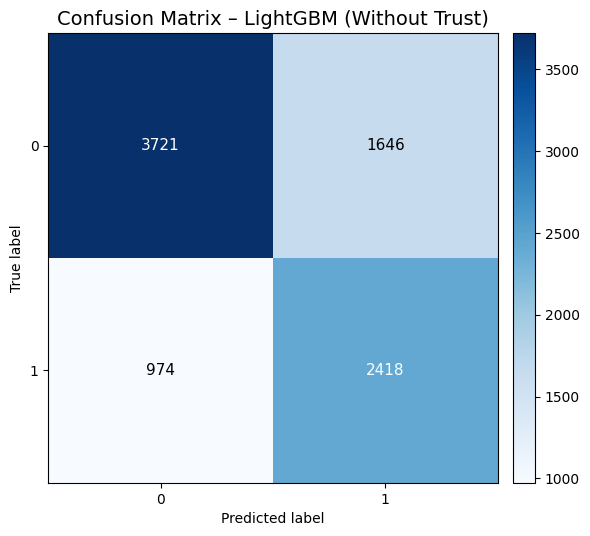

In [ ]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from joblib import dump
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ============================================================
# 1. Podział kolumn + PREPROCESS (WITHOUT TRUST, X_train_notrust)
# ============================================================
cat_cols = [
    c for c in X_train_notrust.columns
    if str(X_train_notrust[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train_notrust.columns if c not in cat_cols]

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# ============================================================
# 2. Najlepsze hiperparametry z nested CV (AUC, NO TRUST)
# ============================================================
best_params_notrust_lgb = {
    "n_estimators": 811,
    "learning_rate": 0.012924009463446781,
    "max_depth": 7,
    "min_child_samples": 16,
    "subsample": 0.6592376757494612,
    "colsample_bytree": 0.5027292876886567,
    "reg_alpha": 0.0510050918416387,
    "reg_lambda": 0.15408760181137504,
    "objective": "binary",
    "verbosity": -1,
    "random_state": 42,
    "n_jobs": -1,
    "class_weight": "balanced",
    "min_child_weight": 1.0,
}

# ============================================================
# 3. Pipeline: preprocess + LightGBM (WITHOUT TRUST)
# ============================================================
lgb_final_notrust = Pipeline([
    ("pre", preprocess),
    ("clf", LGBMClassifier(**best_params_notrust_lgb)),
])

# ============================================================
# 4. Trening na całym zbiorze treningowym (WITHOUT TRUST)
# ============================================================
lgb_final_notrust.fit(X_train_notrust, y_train)

# opcjonalnie: zapis modelu
dump(lgb_final_notrust, "lightgbm_notrust_auc_final.joblib")

# ============================================================
# 5. Ewaluacja na zbiorze testowym (WITHOUT TRUST)
# ============================================================
y_pred = lgb_final_notrust.predict(X_test_notrust)
y_proba = lgb_final_notrust.predict_proba(X_test_notrust)[:, 1]

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Test set performance – LightGBM WITHOUT TRUST (best AUC params) ===")
print(f"Accuracy:  {acc:.4f}")
print(f"F1 score:  {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"ROC AUC:   {auc:.4f}")

# macierz pomyłek jako liczby + classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

target_names = ["Positive attitudes (class = 0)", "Negative attitudes (class = 1)"]
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

# ============================================================
# 6. Macierz pomyłek – wykres (WITHOUT TRUST)
# ============================================================
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation="nearest", cmap="Blues")

# colorbar o tej samej wysokości co macierz
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
cbar = fig.colorbar(im, cax=cax)

# etykiety osi
ax.set(
    xticks=[0, 1],
    yticks=[0, 1],
    xticklabels=[0, 1],
    yticklabels=[0, 1],
    xlabel="Predicted label",
    ylabel="True label",
)
ax.set_title("Confusion Matrix – LightGBM (Without Trust)", fontsize=14)

# liczby w środku
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            fontsize=11,
            color="white" if cm[i, j] > thresh else "black",
        )

plt.tight_layout()
plt.savefig("confusion_matrix_lgbm_notrust.png", dpi=300, bbox_inches="tight")
plt.show()


c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


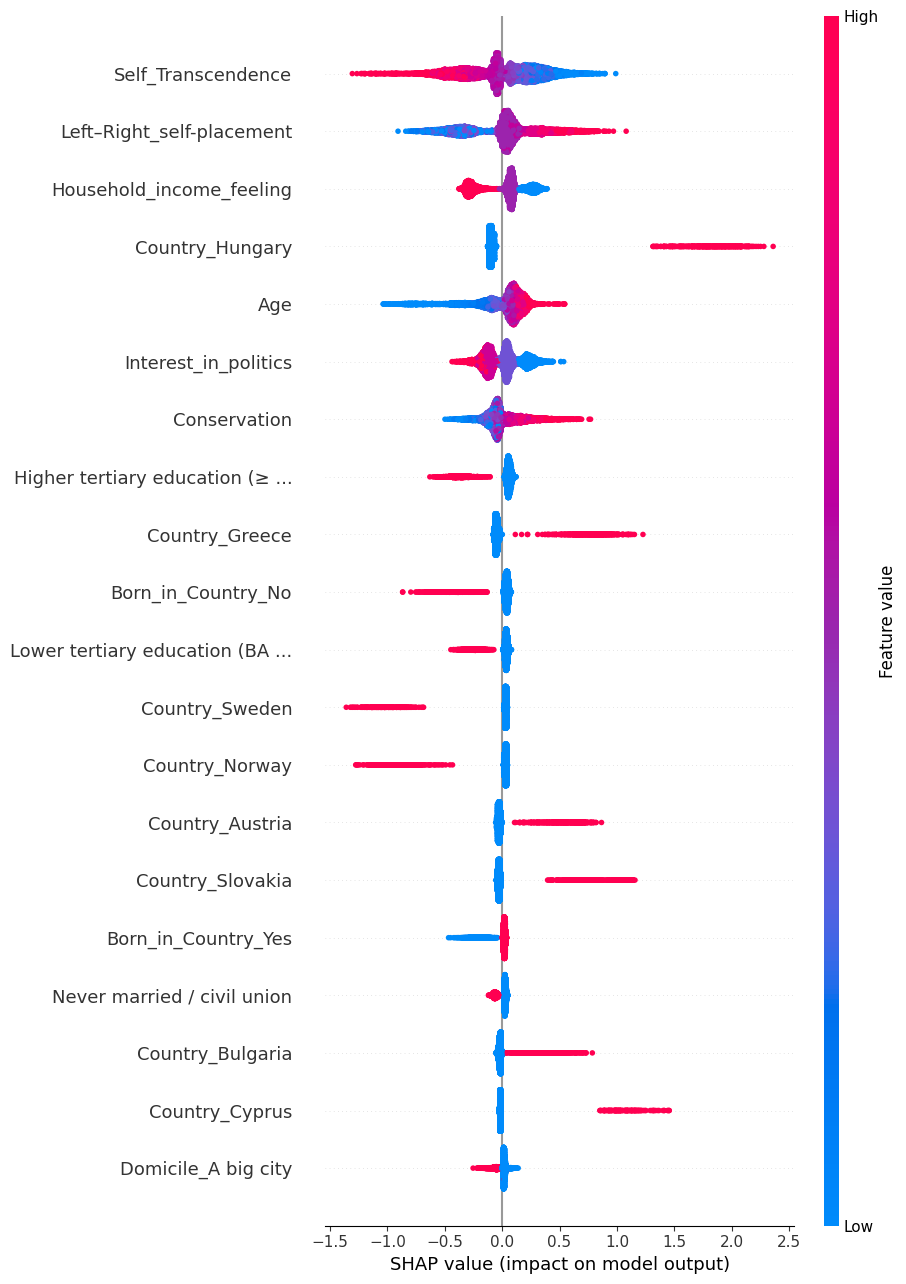

Top 20 features by mean |SHAP| (full original names):
Domicile_A big city: 0.0324
Country_Cyprus: 0.0337
Country_Bulgaria: 0.0349
Marital_Status_None of these (never married or in legally registered civil union): 0.0361
Born_in_Country_Yes: 0.0376
Country_Slovakia: 0.0546
Country_Austria: 0.0548
Country_Norway: 0.0556
Country_Sweden: 0.0563
Education_Level_Lower tertiary education (BA level): 0.0636
Born_in_Country_No: 0.0737
Country_Greece: 0.0927
Education_Level_Higher tertiary education (≥ MA level): 0.1037
Conservation: 0.1162
Interest_in_politics: 0.1294
Age: 0.1617
Country_Hungary: 0.1745
Household_income_feeling: 0.1761
Left–Right_self-placement: 0.2298
Self_Transcendence: 0.2647


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------
# 1. Dane + nazwy cech
# ---------------------------------------
pre_tr = lgb_final_notrust_auc.named_steps["pre"]
clf_tr = lgb_final_notrust_auc.named_steps["clf"]

Xte = pre_tr.transform(X_test_notrust)

feature_names = pre_tr.get_feature_names_out()
feature_names = [
    n.replace("num__", "").replace("cat__", "") for n in feature_names
]

# ---------------------------------------
# 2. MAPA ZMIAN NAZW (tylko to, o co prosisz)
# ---------------------------------------
label_map = {
    "Marital_Status_None of these (never married or in legally registered civil union)":
        "Never married / civil union",
}

# ---------------------------------------
# 3. Usuwamy 'Education_Level_' z nazw edukacji
# ---------------------------------------
cleaned_names = []
for n in feature_names:
    if n.startswith("Education_Level_"):
        cleaned_names.append(n.replace("Education_Level_", ""))
    else:
        cleaned_names.append(n)

# ---------------------------------------
# 4. Finalne nazwy: najpierw education fix, potem label_map
# ---------------------------------------
display_names = [label_map.get(n, n) for n in cleaned_names]

# lekkie przycięcie, żeby nie były absurdalnie długie
max_len = 32
short_feature_names = [
    n if len(n) <= max_len else n[: max_len - 3] + "..."
    for n in display_names
]

# ---------------------------------------
# 5. SHAP values
# ---------------------------------------
explainer = shap.TreeExplainer(clf_tr)
shap_values = explainer.shap_values(Xte)

# używamy nowych nazw w DataFrame
Xte_df = pd.DataFrame(Xte, columns=short_feature_names)

# ---------------------------------------
# 6. Ustawienia wykresu – większy obrazek
# ---------------------------------------
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 12,
})

plt.figure()
shap.summary_plot(
    shap_values,
    Xte_df,
    max_display=20,
    show=False,
    plot_size=(11, 13),   # większy wykres (szerokość, wysokość)
)

# więcej miejsca na nazwy z lewej
plt.gcf().subplots_adjust(left=0.45)

plt.savefig(
    "shap_summary_lgbm_notrust_top20_big_renamed.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# ---------------------------------------
# 7. TOP 20 cech wg mean |SHAP| – pełne nazwy
# ---------------------------------------
mean_shap_values = np.abs(shap_values).mean(axis=0)
top_idx = np.argsort(mean_shap_values)[-20:]
top_features = [feature_names[i] for i in top_idx]

print("Top 20 features by mean |SHAP| (full original names):")
for feat, imp in zip(top_features, mean_shap_values[top_idx]):
    print(f"{feat}: {imp:.4f}")


In [ ]:
# lightgbm nested (WITH TRUST) – with ROC AUC            
import optuna
from optuna.samplers import TPESampler

import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)
from joblib import dump

from lightgbm import LGBMClassifier


# ============================================================
# LIGHTGBM (WITH TRUST) – "lightgbm_withtrust_auc"
#   -> używamy X_train
# ============================================================

# 1. Podział kolumn (X_train)
cat_cols = [
    c for c in X_train.columns
    if str(X_train[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train.columns if c not in cat_cols]

# 2. Preprocessing: OHE + MinMax
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# 3. Seeds
seeds = [0, 7, 42, 123, 999]

# Zbiorcze listy do globalnych statystyk
all_outer_f1_lgb = []
all_outer_prec_lgb = []
all_outer_rec_lgb = []
all_outer_acc_lgb = []
all_outer_auc_lgb = []

# Najlepszy model po ROC AUC (spośród wszystkich seedów i foldów)
best_global_auc_lgb = -1.0
best_global_params_lgb = None

# Szczegółowe wyniki: seed + fold
rows_lgb = []


# ============================================================
# NESTED CV – LIGHTGBM (WITH TRUST, X_train) – ROC AUC
# ============================================================
for seed in seeds:
    print("\n" + "=" * 70)
    print(f"=== NESTED CV – SEED: {seed} (LIGHTGBM, WITH TRUST, ROC AUC) ===")
    print("=" * 70)

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    outer_f1_scores = []
    outer_precisions = []
    outer_recalls = []
    outer_accuracies = []
    outer_aucs = []

    for fold, (train_idx, val_idx) in enumerate(
        outer_cv.split(X_train, y_train),
        start=1
    ):
        # train / val ze zbioru Z TRUSTEM
        X_tr = X_train.iloc[train_idx].copy()
        X_val = X_train.iloc[val_idx].copy()
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

        # ----------------- Optuna objective -----------------
        def objective_lgb_nested(trial):
            params = {
                "n_estimators":      trial.suggest_int("n_estimators", 100, 1500),
                "learning_rate":     trial.suggest_float("learning_rate", 0.01, 0.5, log=True),
                "max_depth":         trial.suggest_int("max_depth", 4, 20),
                # num_leaves usunięte – LightGBM użyje wartości domyślnej
                "min_child_samples": trial.suggest_int("min_child_samples", 1, 30),
                # stała wartość jak w XGBoost
                "min_child_weight":  1.0,
                "subsample":         trial.suggest_float("subsample", 0.5, 1.0),
                "colsample_bytree":  trial.suggest_float("colsample_bytree", 0.5, 1.0),
                "reg_alpha":         trial.suggest_float("reg_alpha", 1e-4, 1.0, log=True),
                "reg_lambda":        trial.suggest_float("reg_lambda", 1e-4, 1.0, log=True),
                "objective":         "binary",
                "verbosity":         -1,
                "random_state":      seed,
                "n_jobs":            -1,
                "class_weight":      "balanced",
            }

            clf = LGBMClassifier(**params)

            pipe = Pipeline([
                ("pre", preprocess),
                ("clf", clf),
            ])

            score = cross_val_score(
                pipe,
                X_tr,
                y_tr,
                cv=inner_cv,
                scoring="roc_auc",   # ROC AUC
                n_jobs=-1,
            ).mean()

            return score
        # ----------------------------------------------------

        study_nested_lgb = optuna.create_study(
            direction="maximize",
            sampler=TPESampler(seed=seed),
        )
        study_nested_lgb.optimize(
            objective_lgb_nested,
            n_trials=50,
            show_progress_bar=False
        )

        best_params_lgb = study_nested_lgb.best_params.copy()
        best_params_full_lgb = best_params_lgb.copy()
        best_params_full_lgb.update({
            "objective":        "binary",
            "verbosity":        -1,
            "random_state":     seed,
            "n_jobs":           -1,
            "class_weight":     "balanced",
            "min_child_weight": 1.0,
        })

        # Model dla danego outer folda (WITH TRUST)
        lgb_fold_model = Pipeline([
            ("pre", preprocess),
            ("clf", LGBMClassifier(**best_params_full_lgb)),
        ])
        lgb_fold_model.fit(X_tr, y_tr)

        y_val_pred = lgb_fold_model.predict(X_val)
        y_val_proba = lgb_fold_model.predict_proba(X_val)[:, 1]

        f1_val = f1_score(y_val, y_val_pred)  # F1 dla klasy 1
        prec_val = precision_score(y_val, y_val_pred, zero_division=0)
        rec_val = recall_score(y_val, y_val_pred, zero_division=0)
        acc_val = accuracy_score(y_val, y_val_pred)
        auc_val = roc_auc_score(y_val, y_val_proba)

        outer_f1_scores.append(f1_val)
        outer_precisions.append(prec_val)
        outer_recalls.append(rec_val)
        outer_accuracies.append(acc_val)
        outer_aucs.append(auc_val)

        all_outer_f1_lgb.append(f1_val)
        all_outer_prec_lgb.append(prec_val)
        all_outer_rec_lgb.append(rec_val)
        all_outer_acc_lgb.append(acc_val)
        all_outer_auc_lgb.append(auc_val)

        rows_lgb.append({
            "seed": seed,
            "fold": fold,
            "F1": f1_val,
            "Precision": prec_val,
            "Recall": rec_val,
            "Accuracy": acc_val,
            "ROC_AUC": auc_val,
        })

        if auc_val > best_global_auc_lgb:
            best_global_auc_lgb = auc_val
            best_global_params_lgb = best_params_full_lgb.copy()

        # ======= PRINT WYNIKÓW I WSZYSTKICH PARAMETRÓW =======
        print(f"\nSeed {seed} | Outer fold {fold} (WITH TRUST)")
        print(
            f"  F1={f1_val:.4f}, Prec={prec_val:.4f}, "
            f"Rec={rec_val:.4f}, Acc={acc_val:.4f}, ROC AUC={auc_val:.4f}"
        )

        # wszystkie parametry z best_params_full_lgb
        param_str = []
        for k, v in best_params_full_lgb.items():
            if isinstance(v, float):
                param_str.append(f"{k}={v:.4f}")
            else:
                param_str.append(f"{k}={v}")
        param_str = ", ".join(param_str)
        print("  Best params:", param_str)
        # =====================================================

    # Podsumowanie dla danego seeda
    outer_f1_scores = np.array(outer_f1_scores)
    outer_precisions = np.array(outer_precisions)
    outer_recalls = np.array(outer_recalls)
    outer_accuracies = np.array(outer_accuracies)
    outer_aucs = np.array(outer_aucs)

    print("\n--- Summary for seed", seed, "(LIGHTGBM, WITH TRUST, ROC AUC) ---")
    print(f"  F1:        mean={outer_f1_scores.mean():.4f}, std={outer_f1_scores.std():.4f}")
    print(f"  Precision: mean={outer_precisions.mean():.4f}, std={outer_precisions.std():.4f}")
    print(f"  Recall:    mean={outer_recalls.mean():.4f}, std={outer_recalls.std():.4f}")
    print(f"  Accuracy:  mean={outer_accuracies.mean():.4f}, std={outer_accuracies.std():.4f}")
    print(f"  ROC AUC:   mean={outer_aucs.mean():.4f}, std={outer_aucs.std():.4f}")


# ============================================================
# GLOBAL SUMMARY – LIGHTGBM (WITH TRUST, ROC AUC)
# ============================================================
all_outer_f1_lgb = np.array(all_outer_f1_lgb)
all_outer_prec_lgb = np.array(all_outer_prec_lgb)
all_outer_rec_lgb = np.array(all_outer_rec_lgb)
all_outer_acc_lgb = np.array(all_outer_acc_lgb)
all_outer_auc_lgb = np.array(all_outer_auc_lgb)

print("\n" + "=" * 70)
print("===== GLOBAL SUMMARY – LIGHTGBM, WITH TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====")
print("=" * 70)
print(f"Global F1:        mean={all_outer_f1_lgb.mean():.4f}, std={all_outer_f1_lgb.std():.4f}")
print(f"Global Precision: mean={all_outer_prec_lgb.mean():.4f}, std={all_outer_prec_lgb.std():.4f}")
print(f"Global Recall:    mean={all_outer_rec_lgb.mean():.4f}, std={all_outer_rec_lgb.std():.4f}")
print(f"Global Accuracy:  mean={all_outer_acc_lgb.mean():.4f}, std={all_outer_acc_lgb.std():.4f}")
print(f"Global ROC AUC:   mean={all_outer_auc_lgb.mean():.4f}, std={all_outer_auc_lgb.std():.4f}")

print("\n===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – LIGHTGBM (WITH TRUST) =====")
print(f"Best ROC AUC: {best_global_auc_lgb:.4f}")
print("Best hyperparameters:")
for k, v in best_global_params_lgb.items():
    print(f"{k}: {v}")

# Szczegółowa tabela wyników: seed + fold
results_lgb_df = pd.DataFrame(rows_lgb)
print("\n===== DETAILED RESULTS PER SEED AND FOLD (LIGHTGBM, WITH TRUST, ROC AUC) =====")
print(results_lgb_df)

results_lgb_df.to_csv("lightgbm_withtrust_nested_cv_detailed_results_roc_auc.csv", index=False)


[I 2025-11-28 09:56:16,688] A new study created in memory with name: no-name-da83feae-ea55-41ec-a70f-ae44ec55188a



=== NESTED CV – SEED: 0 (LIGHTGBM, WITH TRUST, ROC AUC) ===


[I 2025-11-28 09:56:21,076] Trial 0 finished with value: 0.7684542779460859 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7684542779460859.
[I 2025-11-28 09:56:27,861] Trial 1 finished with value: 0.7783524963182771 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7783524963182771.
[I 2025-11-28 09:56:28,796] Trial 2 finished with value: 0.7711090977325359 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 1 (WITH TRUST)
  F1=0.6579, Prec=0.6109, Rec=0.7128, Acc=0.7128, ROC AUC=0.7921
  Best params: n_estimators=1249, learning_rate=0.0175, max_depth=20, min_child_samples=26, subsample=0.6890, colsample_bytree=0.5013, reg_alpha=0.0126, reg_lambda=0.0160, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:00:48,739] Trial 0 finished with value: 0.7694714522453419 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7694714522453419.
[I 2025-11-28 10:00:55,748] Trial 1 finished with value: 0.7787287182550752 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7787287182550752.
[I 2025-11-28 10:00:56,704] Trial 2 finished with value: 0.773441347965869 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.98930917111638


Seed 0 | Outer fold 2 (WITH TRUST)
  F1=0.6479, Prec=0.5943, Rec=0.7120, Acc=0.7001, ROC AUC=0.7798
  Best params: n_estimators=706, learning_rate=0.0230, max_depth=15, min_child_samples=23, subsample=0.8703, colsample_bytree=0.5118, reg_alpha=0.0031, reg_lambda=0.0001, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:04:30,825] Trial 0 finished with value: 0.7682088796548973 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7682088796548973.
[I 2025-11-28 10:04:37,597] Trial 1 finished with value: 0.7758991655334979 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7758991655334979.
[I 2025-11-28 10:04:38,551] Trial 2 finished with value: 0.7706202511453006 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 3 (WITH TRUST)
  F1=0.6694, Prec=0.6097, Rec=0.7422, Acc=0.7160, ROC AUC=0.7966
  Best params: n_estimators=954, learning_rate=0.0150, max_depth=19, min_child_samples=21, subsample=0.5890, colsample_bytree=0.5208, reg_alpha=0.8937, reg_lambda=0.0091, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:08:31,479] Trial 0 finished with value: 0.7690149451326663 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7690149451326663.
[I 2025-11-28 10:08:38,290] Trial 1 finished with value: 0.7772900880138311 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7772900880138311.
[I 2025-11-28 10:08:39,220] Trial 2 finished with value: 0.7705514092776431 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 4 (WITH TRUST)
  F1=0.6564, Prec=0.6047, Rec=0.7179, Acc=0.7087, ROC AUC=0.7862
  Best params: n_estimators=844, learning_rate=0.0173, max_depth=14, min_child_samples=29, subsample=0.6943, colsample_bytree=0.5386, reg_alpha=0.0002, reg_lambda=0.0003, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:11:44,362] Trial 0 finished with value: 0.7674525164916927 and parameters: {'n_estimators': 868, 'learning_rate': 0.16409119617016144, 'max_depth': 14, 'min_child_samples': 17, 'subsample': 0.7118273996694524, 'colsample_bytree': 0.8229470565333281, 'reg_alpha': 0.0056279320474151686, 'reg_lambda': 0.36905577292137587}. Best is trial 0 with value: 0.7674525164916927.
[I 2025-11-28 10:11:51,251] Trial 1 finished with value: 0.7745786236212954 and parameters: {'n_estimators': 1450, 'learning_rate': 0.044818326788762804, 'max_depth': 17, 'min_child_samples': 16, 'subsample': 0.7840222805469661, 'colsample_bytree': 0.9627983191463305, 'reg_alpha': 0.00019237305096546508, 'reg_lambda': 0.00022310905607443037}. Best is trial 1 with value: 0.7745786236212954.
[I 2025-11-28 10:11:52,183] Trial 2 finished with value: 0.7707247509136882 and parameters: {'n_estimators': 128, 'learning_rate': 0.259774275700225, 'max_depth': 17, 'min_child_samples': 27, 'subsample': 0.9893091711163


Seed 0 | Outer fold 5 (WITH TRUST)
  F1=0.6710, Prec=0.6204, Rec=0.7305, Acc=0.7223, ROC AUC=0.7969
  Best params: n_estimators=901, learning_rate=0.0139, max_depth=14, min_child_samples=18, subsample=0.5025, colsample_bytree=0.5214, reg_alpha=0.3852, reg_lambda=0.0001, objective=binary, verbosity=-1, random_state=0, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 0 (LIGHTGBM, WITH TRUST, ROC AUC) ---
  F1:        mean=0.6605, std=0.0086
  Precision: mean=0.6080, std=0.0085
  Recall:    mean=0.7231, std=0.0116
  Accuracy:  mean=0.7120, std=0.0074
  ROC AUC:   mean=0.7903, std=0.0066

=== NESTED CV – SEED: 7 (LIGHTGBM, WITH TRUST, ROC AUC) ===


[I 2025-11-28 10:15:38,462] Trial 0 finished with value: 0.7740900634555722 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7740900634555722.
[I 2025-11-28 10:15:40,939] Trial 1 finished with value: 0.7871418538777677 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7871418538777677.
[I 2025-11-28 10:15:43,169] Trial 2 finished with value: 0.7839654485962813 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 1 (WITH TRUST)
  F1=0.6555, Prec=0.6075, Rec=0.7117, Acc=0.7101, ROC AUC=0.7886
  Best params: n_estimators=1412, learning_rate=0.0190, max_depth=15, min_child_samples=3, subsample=0.7179, colsample_bytree=0.5424, reg_alpha=0.0070, reg_lambda=0.6649, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:19:50,789] Trial 0 finished with value: 0.7725128660728581 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7725128660728581.
[I 2025-11-28 10:19:53,336] Trial 1 finished with value: 0.7840631465883995 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7840631465883995.
[I 2025-11-28 10:19:55,608] Trial 2 finished with value: 0.7832060112176212 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 2 (WITH TRUST)
  F1=0.6611, Prec=0.6040, Rec=0.7301, Acc=0.7099, ROC AUC=0.7882
  Best params: n_estimators=470, learning_rate=0.0334, max_depth=11, min_child_samples=27, subsample=0.9190, colsample_bytree=0.5296, reg_alpha=0.0012, reg_lambda=0.0006, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:23:42,980] Trial 0 finished with value: 0.7743423975217936 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7743423975217936.
[I 2025-11-28 10:23:46,118] Trial 1 finished with value: 0.7850517134079418 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7850517134079418.
[I 2025-11-28 10:23:48,760] Trial 2 finished with value: 0.78356596203704 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, 'co


Seed 7 | Outer fold 3 (WITH TRUST)
  F1=0.6566, Prec=0.6059, Rec=0.7167, Acc=0.7096, ROC AUC=0.7916
  Best params: n_estimators=850, learning_rate=0.0288, max_depth=12, min_child_samples=9, subsample=0.5311, colsample_bytree=0.5172, reg_alpha=0.9998, reg_lambda=0.5740, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:27:52,175] Trial 0 finished with value: 0.7737875968259312 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.7737875968259312.
[I 2025-11-28 10:27:55,068] Trial 1 finished with value: 0.7837353132529978 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.7837353132529978.
[I 2025-11-28 10:27:57,654] Trial 2 finished with value: 0.7826740767725168 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, '


Seed 7 | Outer fold 4 (WITH TRUST)
  F1=0.6660, Prec=0.6170, Rec=0.7235, Acc=0.7187, ROC AUC=0.7951
  Best params: n_estimators=1104, learning_rate=0.0137, max_depth=13, min_child_samples=23, subsample=0.5971, colsample_bytree=0.5169, reg_alpha=0.0076, reg_lambda=0.3678, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:32:29,796] Trial 0 finished with value: 0.770623745690382 and parameters: {'n_estimators': 206, 'learning_rate': 0.2113774399969529, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9889947559983013, 'colsample_bytree': 0.7692479352052168, 'reg_alpha': 0.010103732850016273, 'reg_lambda': 0.00019418001640357854}. Best is trial 0 with value: 0.770623745690382.
[I 2025-11-28 10:32:32,500] Trial 1 finished with value: 0.784929584354142 and parameters: {'n_estimators': 476, 'learning_rate': 0.07067818275455107, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.6904705665742692, 'colsample_bytree': 0.5329681734529526, 'reg_alpha': 0.0014209617815888057, 'reg_lambda': 0.434884682155233}. Best is trial 1 with value: 0.784929584354142.
[I 2025-11-28 10:32:35,223] Trial 2 finished with value: 0.7826734600847658 and parameters: {'n_estimators': 398, 'learning_rate': 0.05863339606251624, 'max_depth': 19, 'min_child_samples': 1, 'subsample': 0.8002744587320613, 'cols


Seed 7 | Outer fold 5 (WITH TRUST)
  F1=0.6612, Prec=0.6080, Rec=0.7246, Acc=0.7122, ROC AUC=0.7920
  Best params: n_estimators=914, learning_rate=0.0201, max_depth=13, min_child_samples=6, subsample=0.7883, colsample_bytree=0.7650, reg_alpha=0.9840, reg_lambda=0.3272, objective=binary, verbosity=-1, random_state=7, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 7 (LIGHTGBM, WITH TRUST, ROC AUC) ---
  F1:        mean=0.6601, std=0.0038
  Precision: mean=0.6085, std=0.0045
  Recall:    mean=0.7213, std=0.0064
  Accuracy:  mean=0.7121, std=0.0034
  ROC AUC:   mean=0.7911, std=0.0025

=== NESTED CV – SEED: 42 (LIGHTGBM, WITH TRUST, ROC AUC) ===


[I 2025-11-28 10:36:36,879] Trial 0 finished with value: 0.7504827350047942 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7504827350047942.
[I 2025-11-28 10:36:40,460] Trial 1 finished with value: 0.7678495267938242 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7678495267938242.
[I 2025-11-28 10:36:43,284] Trial 2 finished with value: 0.780490584180847 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'col


Seed 42 | Outer fold 1 (WITH TRUST)
  F1=0.6684, Prec=0.6075, Rec=0.7430, Acc=0.7143, ROC AUC=0.7920
  Best params: n_estimators=972, learning_rate=0.0109, max_depth=20, min_child_samples=8, subsample=0.5017, colsample_bytree=0.5334, reg_alpha=0.0001, reg_lambda=0.8124, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:40:43,191] Trial 0 finished with value: 0.7545618463897436 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7545618463897436.
[I 2025-11-28 10:40:46,902] Trial 1 finished with value: 0.769676477358698 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.769676477358698.
[I 2025-11-28 10:40:49,701] Trial 2 finished with value: 0.7816585510890119 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'cols


Seed 42 | Outer fold 2 (WITH TRUST)
  F1=0.6516, Prec=0.5942, Rec=0.7212, Acc=0.7011, ROC AUC=0.7851
  Best params: n_estimators=485, learning_rate=0.0223, max_depth=19, min_child_samples=17, subsample=0.5662, colsample_bytree=0.5643, reg_alpha=0.0009, reg_lambda=0.0014, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:44:17,657] Trial 0 finished with value: 0.7525606968032768 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.7525606968032768.
[I 2025-11-28 10:44:21,302] Trial 1 finished with value: 0.7691658942276023 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7691658942276023.
[I 2025-11-28 10:44:24,371] Trial 2 finished with value: 0.782341755823042 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'col


Seed 42 | Outer fold 3 (WITH TRUST)
  F1=0.6570, Prec=0.6067, Rec=0.7163, Acc=0.7102, ROC AUC=0.7892
  Best params: n_estimators=1251, learning_rate=0.0118, max_depth=19, min_child_samples=15, subsample=0.8045, colsample_bytree=0.5136, reg_alpha=0.0210, reg_lambda=0.1106, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:49:04,449] Trial 0 finished with value: 0.752235796664627 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.752235796664627.
[I 2025-11-28 10:49:08,125] Trial 1 finished with value: 0.7705083894526149 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7705083894526149.
[I 2025-11-28 10:49:11,073] Trial 2 finished with value: 0.7816744477879988 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'cols


Seed 42 | Outer fold 4 (WITH TRUST)
  F1=0.6587, Prec=0.6051, Rec=0.7227, Acc=0.7097, ROC AUC=0.7863
  Best params: n_estimators=739, learning_rate=0.0145, max_depth=17, min_child_samples=18, subsample=0.5789, colsample_bytree=0.5009, reg_alpha=0.0063, reg_lambda=0.0186, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 10:53:15,787] Trial 0 finished with value: 0.751055369119999 and parameters: {'n_estimators': 624, 'learning_rate': 0.4123206532618726, 'max_depth': 16, 'min_child_samples': 18, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.0001707396743152812, 'reg_lambda': 0.29154431891537513}. Best is trial 0 with value: 0.751055369119999.
[I 2025-11-28 10:53:19,727] Trial 1 finished with value: 0.7713203114890864 and parameters: {'n_estimators': 942, 'learning_rate': 0.1595857358814127, 'max_depth': 4, 'min_child_samples': 30, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.000533703276260396, 'reg_lambda': 0.0005415244119402539}. Best is trial 1 with value: 0.7713203114890864.
[I 2025-11-28 10:53:22,613] Trial 2 finished with value: 0.7817829664803807 and parameters: {'n_estimators': 526, 'learning_rate': 0.0779014312627624, 'max_depth': 11, 'min_child_samples': 9, 'subsample': 0.8059264473611898, 'cols


Seed 42 | Outer fold 5 (WITH TRUST)
  F1=0.6599, Prec=0.6074, Rec=0.7223, Acc=0.7114, ROC AUC=0.7968
  Best params: n_estimators=1369, learning_rate=0.0115, max_depth=19, min_child_samples=19, subsample=0.9252, colsample_bytree=0.5320, reg_alpha=0.3311, reg_lambda=0.1054, objective=binary, verbosity=-1, random_state=42, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 42 (LIGHTGBM, WITH TRUST, ROC AUC) ---
  F1:        mean=0.6591, std=0.0055
  Precision: mean=0.6042, std=0.0051
  Recall:    mean=0.7251, std=0.0092
  Accuracy:  mean=0.7093, std=0.0044
  ROC AUC:   mean=0.7899, std=0.0042

=== NESTED CV – SEED: 123 (LIGHTGBM, WITH TRUST, ROC AUC) ===


[I 2025-11-28 10:57:46,403] Trial 0 finished with value: 0.7832521716659667 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7832521716659667.
[I 2025-11-28 10:57:50,611] Trial 1 finished with value: 0.7833967806459272 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7833967806459272.
[I 2025-11-28 10:57:53,264] Trial 2 finished with value: 0.7843003498080018 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 1 (WITH TRUST)
  F1=0.6581, Prec=0.6067, Rec=0.7190, Acc=0.7105, ROC AUC=0.7936
  Best params: n_estimators=1183, learning_rate=0.0147, max_depth=14, min_child_samples=22, subsample=0.5643, colsample_bytree=0.5623, reg_alpha=0.0003, reg_lambda=0.0005, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:02:56,035] Trial 0 finished with value: 0.7851570355128904 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7851570355128904.
[I 2025-11-28 11:03:00,327] Trial 1 finished with value: 0.7856286879314927 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7856286879314927.
[I 2025-11-28 11:03:02,911] Trial 2 finished with value: 0.7857480937809657 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 2 (WITH TRUST)
  F1=0.6559, Prec=0.6096, Rec=0.7098, Acc=0.7113, ROC AUC=0.7913
  Best params: n_estimators=1183, learning_rate=0.0147, max_depth=20, min_child_samples=26, subsample=0.6516, colsample_bytree=0.5007, reg_alpha=0.0045, reg_lambda=0.0013, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:07:47,192] Trial 0 finished with value: 0.7848091404385853 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7848091404385853.
[I 2025-11-28 11:07:51,441] Trial 1 finished with value: 0.7857878859097821 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7857878859097821.
[I 2025-11-28 11:07:53,902] Trial 2 finished with value: 0.7862443799734233 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 3 (WITH TRUST)
  F1=0.6555, Prec=0.5967, Rec=0.7270, Acc=0.7039, ROC AUC=0.7862
  Best params: n_estimators=1198, learning_rate=0.0134, max_depth=10, min_child_samples=14, subsample=0.9412, colsample_bytree=0.5312, reg_alpha=0.0534, reg_lambda=0.2419, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:12:42,388] Trial 0 finished with value: 0.7825937585364814 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7825937585364814.
[I 2025-11-28 11:12:46,724] Trial 1 finished with value: 0.782998965212279 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.782998965212279.
[I 2025-11-28 11:12:49,216] Trial 2 finished with value: 0.7830427823627103 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'col


Seed 123 | Outer fold 4 (WITH TRUST)
  F1=0.6699, Prec=0.6166, Rec=0.7334, Acc=0.7199, ROC AUC=0.7971
  Best params: n_estimators=1210, learning_rate=0.0153, max_depth=19, min_child_samples=27, subsample=0.5571, colsample_bytree=0.5112, reg_alpha=0.0004, reg_lambda=0.0001, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:17:52,973] Trial 0 finished with value: 0.7846797317592319 and parameters: {'n_estimators': 1075, 'learning_rate': 0.030629657963841296, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.8597344848927815, 'colsample_bytree': 0.7115532300622305, 'reg_alpha': 0.8376388146302433, 'reg_lambda': 0.05486797781181634}. Best is trial 0 with value: 0.7846797317592319.
[I 2025-11-28 11:17:57,432] Trial 1 finished with value: 0.7856800172003767 and parameters: {'n_estimators': 773, 'learning_rate': 0.04636560185632265, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.7192861223398122, 'colsample_bytree': 0.5298389483047842, 'reg_alpha': 0.003910002376153658, 'reg_lambda': 0.08953268791955236}. Best is trial 1 with value: 0.7856800172003767.
[I 2025-11-28 11:18:00,007] Trial 2 finished with value: 0.7859454405103555 and parameters: {'n_estimators': 355, 'learning_rate': 0.019864940606107565, 'max_depth': 13, 'min_child_samples': 16, 'subsample': 0.8172004792756605, 'c


Seed 123 | Outer fold 5 (WITH TRUST)
  F1=0.6495, Prec=0.5942, Rec=0.7161, Acc=0.7004, ROC AUC=0.7828
  Best params: n_estimators=782, learning_rate=0.0156, max_depth=9, min_child_samples=10, subsample=0.5912, colsample_bytree=0.5255, reg_alpha=0.0031, reg_lambda=0.1321, objective=binary, verbosity=-1, random_state=123, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 123 (LIGHTGBM, WITH TRUST, ROC AUC) ---
  F1:        mean=0.6578, std=0.0067
  Precision: mean=0.6048, std=0.0083
  Recall:    mean=0.7211, std=0.0083
  Accuracy:  mean=0.7092, std=0.0067
  ROC AUC:   mean=0.7902, std=0.0051

=== NESTED CV – SEED: 999 (LIGHTGBM, WITH TRUST, ROC AUC) ===


[I 2025-11-28 11:22:59,640] Trial 0 finished with value: 0.7716706639474058 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7716706639474058.
[I 2025-11-28 11:23:04,549] Trial 1 finished with value: 0.7703650078666219 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7716706639474058.
[I 2025-11-28 11:23:11,449] Trial 2 finished with value: 0.7757381280397083 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, '


Seed 999 | Outer fold 1 (WITH TRUST)
  F1=0.6679, Prec=0.5998, Rec=0.7533, Acc=0.7096, ROC AUC=0.7919
  Best params: n_estimators=564, learning_rate=0.0157, max_depth=11, min_child_samples=12, subsample=0.5356, colsample_bytree=0.5293, reg_alpha=0.1084, reg_lambda=0.0272, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:26:23,835] Trial 0 finished with value: 0.7732249495008249 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7732249495008249.
[I 2025-11-28 11:26:29,153] Trial 1 finished with value: 0.7705569044809285 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7732249495008249.
[I 2025-11-28 11:26:36,019] Trial 2 finished with value: 0.7790022159740335 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, '


Seed 999 | Outer fold 2 (WITH TRUST)
  F1=0.6587, Prec=0.6074, Rec=0.7194, Acc=0.7111, ROC AUC=0.7938
  Best params: n_estimators=946, learning_rate=0.0212, max_depth=10, min_child_samples=29, subsample=0.8848, colsample_bytree=0.5191, reg_alpha=0.1161, reg_lambda=0.0023, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:30:20,189] Trial 0 finished with value: 0.774681170452328 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.774681170452328.
[I 2025-11-28 11:30:25,151] Trial 1 finished with value: 0.7736865018951536 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.774681170452328.
[I 2025-11-28 11:30:32,108] Trial 2 finished with value: 0.780188428669221 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, 'cols


Seed 999 | Outer fold 3 (WITH TRUST)
  F1=0.6560, Prec=0.6020, Rec=0.7208, Acc=0.7072, ROC AUC=0.7876
  Best params: n_estimators=1164, learning_rate=0.0127, max_depth=20, min_child_samples=15, subsample=0.9702, colsample_bytree=0.5458, reg_alpha=0.6182, reg_lambda=0.0002, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:35:56,811] Trial 0 finished with value: 0.7702289570365856 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7702289570365856.
[I 2025-11-28 11:36:02,372] Trial 1 finished with value: 0.7701333073489592 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 0 with value: 0.7702289570365856.
[I 2025-11-28 11:36:10,055] Trial 2 finished with value: 0.7783079907174963 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, '


Seed 999 | Outer fold 4 (WITH TRUST)
  F1=0.6481, Prec=0.6015, Rec=0.7024, Acc=0.7043, ROC AUC=0.7830
  Best params: n_estimators=606, learning_rate=0.0341, max_depth=10, min_child_samples=19, subsample=0.8535, colsample_bytree=0.5360, reg_alpha=0.0852, reg_lambda=0.0090, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000


[I 2025-11-28 11:39:46,558] Trial 0 finished with value: 0.7695331723865954 and parameters: {'n_estimators': 1225, 'learning_rate': 0.07874891104269156, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.54546263138704, 'colsample_bytree': 0.6661128403965062, 'reg_alpha': 0.005122993322077871, 'reg_lambda': 0.016502253327523714}. Best is trial 0 with value: 0.7695331723865954.
[I 2025-11-28 11:39:52,550] Trial 1 finished with value: 0.7707842670168913 and parameters: {'n_estimators': 980, 'learning_rate': 0.153055765366513, 'max_depth': 17, 'min_child_samples': 4, 'subsample': 0.6713852258163524, 'colsample_bytree': 0.6007798054077667, 'reg_alpha': 0.06749893497408822, 'reg_lambda': 0.00013601821068960908}. Best is trial 1 with value: 0.7707842670168913.
[I 2025-11-28 11:39:59,804] Trial 2 finished with value: 0.7772012059771796 and parameters: {'n_estimators': 1373, 'learning_rate': 0.048792808485969466, 'max_depth': 16, 'min_child_samples': 15, 'subsample': 0.6433594589614362, '


Seed 999 | Outer fold 5 (WITH TRUST)
  F1=0.6608, Prec=0.6123, Rec=0.7176, Acc=0.7144, ROC AUC=0.7905
  Best params: n_estimators=1413, learning_rate=0.0125, max_depth=17, min_child_samples=5, subsample=0.6502, colsample_bytree=0.5349, reg_alpha=0.1055, reg_lambda=0.0120, objective=binary, verbosity=-1, random_state=999, n_jobs=-1, class_weight=balanced, min_child_weight=1.0000

--- Summary for seed 999 (LIGHTGBM, WITH TRUST, ROC AUC) ---
  F1:        mean=0.6583, std=0.0064
  Precision: mean=0.6046, std=0.0046
  Recall:    mean=0.7227, std=0.0167
  Accuracy:  mean=0.7093, std=0.0034
  ROC AUC:   mean=0.7894, std=0.0038

===== GLOBAL SUMMARY – LIGHTGBM, WITH TRUST, 5 SEEDS x 5 OUTER FOLDS (ROC AUC) =====
Global F1:        mean=0.6592, std=0.0065
Global Precision: mean=0.6060, std=0.0067
Global Recall:    mean=0.7226, std=0.0111
Global Accuracy:  mean=0.7104, std=0.0055
Global ROC AUC:   mean=0.7902, std=0.0047

===== BEST HYPERPARAMETERS ACROSS ALL SEEDS AND FOLDS (by ROC AUC) – LIGHT

=== Test set performance – LightGBM WITH TRUST (best AUC params) ===
Accuracy:  0.7136
F1 score:  0.6616
Precision: 0.6097
Recall:    0.7232
ROC AUC:   0.7946

Confusion matrix:
[[3797 1570]
 [ 939 2453]]

Classification report:
                                precision    recall  f1-score   support

Positive attitudes (class = 0)     0.8017    0.7075    0.7517      5367
Negative attitudes (class = 1)     0.6097    0.7232    0.6616      3392

                      accuracy                         0.7136      8759
                     macro avg     0.7057    0.7153    0.7066      8759
                  weighted avg     0.7274    0.7136    0.7168      8759



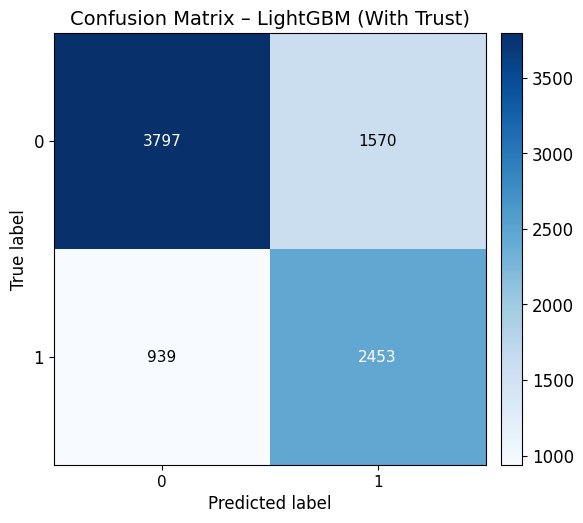

In [ ]:
# test modelu liggbm z trustem + kod na ten model

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from joblib import dump
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ============================================================
# 1. Podział kolumn + PREPROCESS (WITH TRUST, X_train)
# ============================================================
cat_cols = [
    c for c in X_train.columns
    if str(X_train[c].dtype) in ("object", "category")
]
num_cols = [c for c in X_train.columns if c not in cat_cols]

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# ============================================================
# 2. Najlepsze hiperparametry z nested CV (AUC)
# ============================================================
best_params_full_lgb = {
    "n_estimators": 1210,
    "learning_rate": 0.01531566898300964,
    "max_depth": 19,
    "min_child_samples": 27,
    "subsample": 0.557065366573986,
    "colsample_bytree": 0.5112239800569195,
    "reg_alpha": 0.0004196497498346276,
    "reg_lambda": 0.00010716468167469322,
    "objective": "binary",
    "verbosity": -1,
    "random_state": 123,
    "n_jobs": -1,
    "class_weight": "balanced",
    "min_child_weight": 1.0,
}

# ============================================================
# 3. Pipeline: preprocess + LightGBM
# ============================================================
lgb_final_trust = Pipeline([
    ("pre", preprocess),
    ("clf", LGBMClassifier(**best_params_full_lgb)),
])

# ============================================================
# 4. Trening na całym zbiorze treningowym
# ============================================================
lgb_final_trust.fit(X_train, y_train)

# opcjonalnie: zapis modelu
dump(lgb_final_trust, "lightgbm_withtrust_auc_final.joblib")

# ============================================================
# 5. Ewaluacja na zbiorze testowym
# ============================================================
y_pred = lgb_final_trust.predict(X_test)
y_proba = lgb_final_trust.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Test set performance – LightGBM WITH TRUST (best AUC params) ===")
print(f"Accuracy:  {acc:.4f}")
print(f"F1 score:  {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"ROC AUC:   {auc:.4f}")

# macierz pomyłek jako liczby + classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

target_names = ["Positive attitudes (class = 0)", "Negative attitudes (class = 1)"]
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

# ============================================================
# 6. Macierz pomyłek – wykres (jak w wersji NO TRUST)
# ============================================================
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation="nearest", cmap="Blues")

# colorbar o tej samej wysokości co macierz
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
cbar = fig.colorbar(im, cax=cax)

# etykiety osi
ax.set(
    xticks=[0, 1],
    yticks=[0, 1],
    xticklabels=[0, 1],
    yticklabels=[0, 1],
    xlabel="Predicted label",
    ylabel="True label",
)
ax.set_title("Confusion Matrix – LightGBM (With Trust)", fontsize=14)

# liczby w środku
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            fontsize=11,
            color="white" if cm[i, j] > thresh else "black",
        )

plt.tight_layout()
plt.savefig("confusion_matrix_lgbm_withtrust.png", dpi=300, bbox_inches="tight")
plt.show()


c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


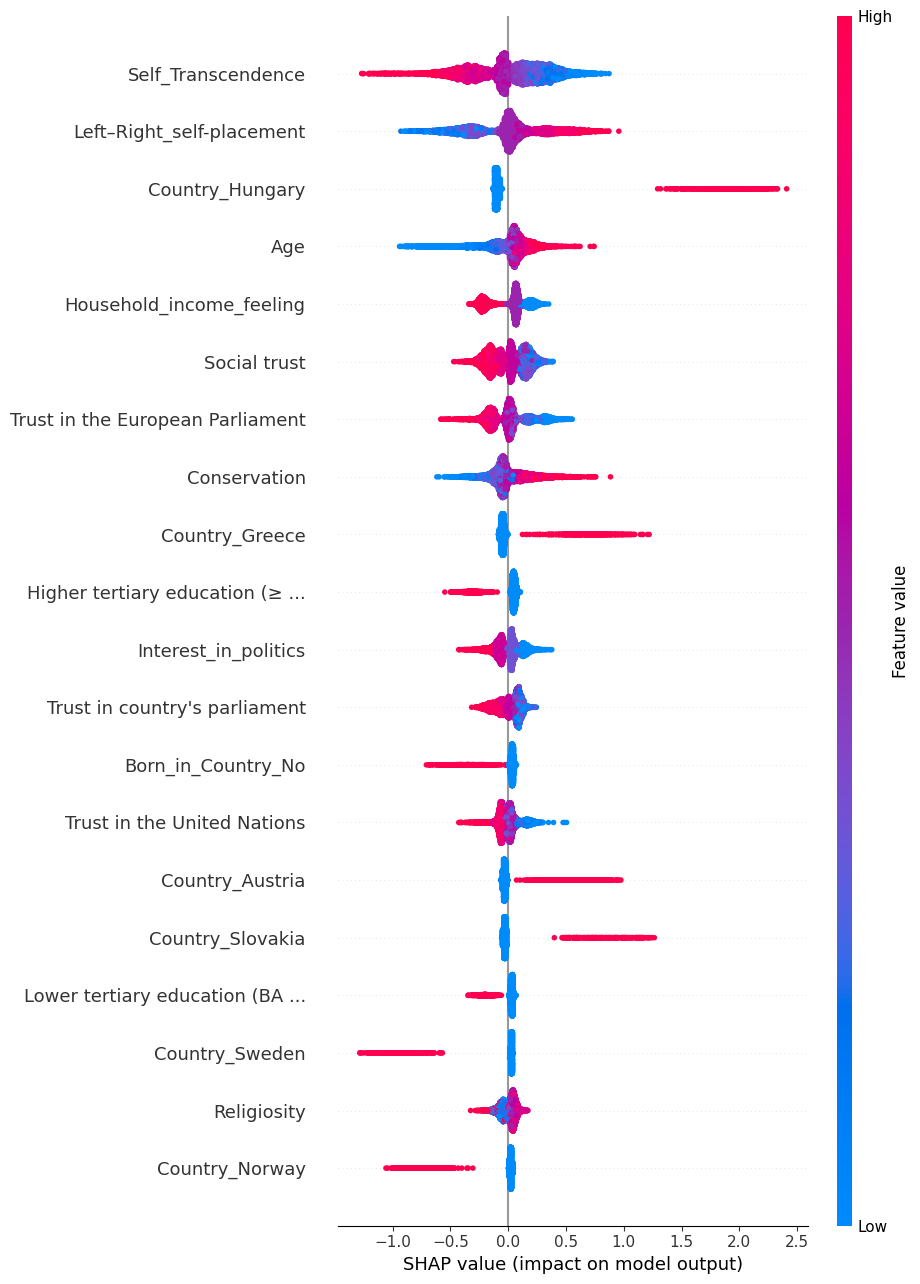

Top 20 features by mean |SHAP| (full original names):
Country_Norway: 0.0426
Religiosity: 0.0507
Country_Sweden: 0.0518
Education_Level_Lower tertiary education (BA level): 0.0518
Country_Slovakia: 0.0560
Country_Austria: 0.0585
Trust in the United Nations: 0.0631
Born_in_Country_No: 0.0641
Trust in country's parliament: 0.0847
Interest_in_politics: 0.0863
Education_Level_Higher tertiary education (≥ MA level): 0.0875
Country_Greece: 0.0885
Conservation: 0.1178
Trust in the European Parliament: 0.1301
Social trust: 0.1330
Household_income_feeling: 0.1418
Age: 0.1421
Country_Hungary: 0.1817
Left–Right_self-placement: 0.2291
Self_Transcendence: 0.2654


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------
# 1. Dane + nazwy cech
# ---------------------------------------
pre_tr = lgb_final_trust.named_steps["pre"]
clf_tr = lgb_final_trust.named_steps["clf"]

Xte = pre_tr.transform(X_test)

feature_names = pre_tr.get_feature_names_out()
feature_names = [
    n.replace("num__", "").replace("cat__", "") for n in feature_names
]

# ---------------------------------------
# 2. MAPA ZMIAN NAZW (tylko to, o co prosisz)
# ---------------------------------------
label_map = {
    "Marital_Status_None of these (never married or in legally registered civil union)":
        "Never married / civil union",
}

# ---------------------------------------
# 3. Usuwamy 'Education_Level_' z nazw edukacji
# ---------------------------------------
cleaned_names = []
for n in feature_names:
    if n.startswith("Education_Level_"):
        cleaned_names.append(n.replace("Education_Level_", ""))
    else:
        cleaned_names.append(n)

# ---------------------------------------
# 4. Finalne nazwy: najpierw education fix, potem label_map
# ---------------------------------------
display_names = [label_map.get(n, n) for n in cleaned_names]

# lekkie przycięcie, żeby nie były absurdalnie długie
max_len = 32
short_feature_names = [
    n if len(n) <= max_len else n[: max_len - 3] + "..."
    for n in display_names
]

# ---------------------------------------
# 5. SHAP values
# ---------------------------------------
explainer = shap.TreeExplainer(clf_tr)
shap_values = explainer.shap_values(Xte)

# używamy nowych nazw w DataFrame
Xte_df = pd.DataFrame(Xte, columns=short_feature_names)

# ---------------------------------------
# 6. Ustawienia wykresu – większy obrazek
# ---------------------------------------
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 12,
})

plt.figure()
shap.summary_plot(
    shap_values,
    Xte_df,
    max_display=20,
    show=False,
    plot_size=(11, 13),   # większy wykres (szerokość, wysokość)
)

# więcej miejsca na nazwy z lewej
plt.gcf().subplots_adjust(left=0.45)

plt.savefig(
    "shap_summary_lgbm_withtrust_top20_big_renamed.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# ---------------------------------------
# 7. TOP 20 cech wg mean |SHAP| – pełne nazwy
# ---------------------------------------
mean_shap_values = np.abs(shap_values).mean(axis=0)
top_idx = np.argsort(mean_shap_values)[-20:]
top_features = [feature_names[i] for i in top_idx]

print("Top 20 features by mean |SHAP| (full original names):")
for feat, imp in zip(top_features, mean_shap_values[top_idx]):
    print(f"{feat}: {imp:.4f}")


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score

# =========================================================
# 1. AgeGroup (1–7) na podstawie kolumny Age w X_test
# =========================================================
age_bins = [15, 25, 35, 45, 55, 65, 75, 200]
age_labels = [1, 2, 3, 4, 5, 6, 7]

X_test_age = X_test.copy()
X_test_age["AgeGroup"] = pd.cut(
    X_test_age["Age"],
    bins=age_bins,
    labels=age_labels,
    right=False,
    include_lowest=True
)

# =========================================================
# 2. Country
# =========================================================
rows_country = []

for country in X_test["Country"].dropna().unique():
    mask = X_test["Country"] == country

    y_true_g = y_test[mask]
    y_pred_g = y_pred[mask]
    y_proba_g = y_proba[mask]

    f1_g = f1_score(y_true_g, y_pred_g, pos_label=1)
    auc_g = roc_auc_score(y_true_g, y_proba_g)

    print(f"\n===== Country = {country} (n = {mask.sum()}) =====")
    print(f"F1 (class 1): {f1_g:.4f}")
    print(f"ROC AUC:      {auc_g:.4f}")

    rows_country.append({
        "Country": country,
        "n": int(mask.sum()),
        "F1_class1": f1_g,
        "ROC_AUC": auc_g
    })

results_country = pd.DataFrame(rows_country)
# np. zapis:
# results_country.to_csv("metrics_country.csv", index=False)


# =========================================================
# 3. Domicile
# =========================================================
rows_domicile = []

for dom in X_test["Domicile"].dropna().unique():
    mask = X_test["Domicile"] == dom

    y_true_g = y_test[mask]
    y_pred_g = y_pred[mask]
    y_proba_g = y_proba[mask]

    f1_g = f1_score(y_true_g, y_pred_g, pos_label=1)
    auc_g = roc_auc_score(y_true_g, y_proba_g)

    print(f"\n===== Domicile = {dom} (n = {mask.sum()}) =====")
    print(f"F1 (class 1): {f1_g:.4f}")
    print(f"ROC AUC:      {auc_g:.4f}")

    rows_domicile.append({
        "Domicile": dom,
        "n": int(mask.sum()),
        "F1_class1": f1_g,
        "ROC_AUC": auc_g
    })

results_domicile = pd.DataFrame(rows_domicile)
# results_domicile.to_csv("metrics_domicile.csv", index=False)


# =========================================================
# 4. Ethnic_majority
# =========================================================
rows_ethnic = []

for em in X_test["Ethnic_majority"].dropna().unique():
    mask = X_test["Ethnic_majority"] == em

    y_true_g = y_test[mask]
    y_pred_g = y_pred[mask]
    y_proba_g = y_proba[mask]

    f1_g = f1_score(y_true_g, y_pred_g, pos_label=1)
    auc_g = roc_auc_score(y_true_g, y_proba_g)

    print(f"\n===== Ethnic_majority = {em} (n = {mask.sum()}) =====")
    print(f"F1 (class 1): {f1_g:.4f}")
    print(f"ROC AUC:      {auc_g:.4f}")

    rows_ethnic.append({
        "Ethnic_majority": em,
        "n": int(mask.sum()),
        "F1_class1": f1_g,
        "ROC_AUC": auc_g
    })

results_ethnic = pd.DataFrame(rows_ethnic)
# results_ethnic.to_csv("metrics_ethnic_majority.csv", index=False)


# =========================================================
# 5. Born_in_Country
# =========================================================
rows_bic = []

for bic in X_test["Born_in_Country"].dropna().unique():
    mask = X_test["Born_in_Country"] == bic

    y_true_g = y_test[mask]
    y_pred_g = y_pred[mask]
    y_proba_g = y_proba[mask]

    f1_g = f1_score(y_true_g, y_pred_g, pos_label=1)
    auc_g = roc_auc_score(y_true_g, y_proba_g)

    print(f"\n===== Born_in_Country = {bic} (n = {mask.sum()}) =====")
    print(f"F1 (class 1): {f1_g:.4f}")
    print(f"ROC AUC:      {auc_g:.4f}")

    rows_bic.append({
        "Born_in_Country": bic,
        "n": int(mask.sum()),
        "F1_class1": f1_g,
        "ROC_AUC": auc_g
    })

results_bic = pd.DataFrame(rows_bic)
# results_bic.to_csv("metrics_born_in_country.csv", index=False)


# =========================================================
# 6. Gender
# =========================================================
rows_gender = []

for g in X_test["Gender"].dropna().unique():
    mask = X_test["Gender"] == g

    y_true_g = y_test[mask]
    y_pred_g = y_pred[mask]
    y_proba_g = y_proba[mask]

    f1_g = f1_score(y_true_g, y_pred_g, pos_label=1)
    auc_g = roc_auc_score(y_true_g, y_proba_g)

    print(f"\n===== Gender = {g} (n = {mask.sum()}) =====")
    print(f"F1 (class 1): {f1_g:.4f}")
    print(f"ROC AUC:      {auc_g:.4f}")

    rows_gender.append({
        "Gender": g,
        "n": int(mask.sum()),
        "F1_class1": f1_g,
        "ROC_AUC": auc_g
    })

results_gender = pd.DataFrame(rows_gender)
# results_gender.to_csv("metrics_gender.csv", index=False)


# =========================================================
# 7. AgeGroup (1–7)
# =========================================================
rows_agegroup = []

for ag in X_test_age["AgeGroup"].dropna().unique():
    mask = X_test_age["AgeGroup"] == ag

    y_true_g = y_test[mask]
    y_pred_g = y_pred[mask]
    y_proba_g = y_proba[mask]

    f1_g = f1_score(y_true_g, y_pred_g, pos_label=1)
    auc_g = roc_auc_score(y_true_g, y_proba_g)

    print(f"\n===== AgeGroup = {ag} (n = {mask.sum()}) =====")
    print(f"F1 (class 1): {f1_g:.4f}")
    print(f"ROC AUC:      {auc_g:.4f}")

    rows_agegroup.append({
        "AgeGroup": int(ag),
        "n": int(mask.sum()),
        "F1_class1": f1_g,
        "ROC_AUC": auc_g
    })

results_agegroup = pd.DataFrame(rows_agegroup)
# results_agegroup.to_csv("metrics_agegroup.csv", index=False)



===== Country = Austria (n = 455) =====
F1 (class 1): 0.7331
ROC AUC:      0.7797

===== Country = Belgium (n = 312) =====
F1 (class 1): 0.3717
ROC AUC:      0.7252

===== Country = Bulgaria (n = 437) =====
F1 (class 1): 0.7229
ROC AUC:      0.6912

===== Country = Croatia (n = 304) =====
F1 (class 1): 0.5156
ROC AUC:      0.6685

===== Country = Cyprus (n = 133) =====
F1 (class 1): 0.8213
ROC AUC:      0.7878

===== Country = Finland (n = 304) =====
F1 (class 1): 0.6352
ROC AUC:      0.8029

===== Country = France (n = 337) =====
F1 (class 1): 0.5389
ROC AUC:      0.8021

===== Country = Germany (n = 465) =====
F1 (class 1): 0.3933
ROC AUC:      0.7591

===== Country = Greece (n = 542) =====
F1 (class 1): 0.7872
ROC AUC:      0.7029

===== Country = Hungary (n = 408) =====
F1 (class 1): 0.9105
ROC AUC:      0.7434

===== Country = Iceland (n = 162) =====
F1 (class 1): 0.1500
ROC AUC:      0.6930

===== Country = Ireland (n = 393) =====
F1 (class 1): 0.5097
ROC AUC:      0.7221

=====

In [ ]:
import pandas as pd

# mapowanie klas wieku na przedziały (do tabeli AgeGroup)
age_label_map = {
    1: "15–24",
    2: "25–34",
    3: "35–44",
    4: "45–54",
    5: "55–64",
    6: "65–74",
    7: "75+",
}

group_dfs = {
    "Country":         (results_country,   "Country"),
    "Domicile":        (results_domicile,  "Domicile"),
    "Ethnic_majority": (results_ethnic,    "Ethnic_majority"),
    "Born_in_Country": (results_bic,       "Born_in_Country"),
    "Gender":          (results_gender,    "Gender"),
    "AgeGroup":        (results_agegroup,  "AgeGroup"),
}

for group_name, (df, col) in group_dfs.items():
    table = df.copy()

    # bierzemy tylko to, co nas interesuje
    table = table[[col, "F1_class1", "ROC_AUC"]]

    # AgeGroup: zamiana 1–7 na przedziały
    if group_name == "AgeGroup":
        table[col] = (
            table[col]
            .astype(int)
            .map(age_label_map)
        )

    # uporządkowanie
    table = table.sort_values(col).reset_index(drop=True)

    print(f"\n=== Tabela dla grupy: {group_name} ===")
    print(table.to_string(index=False))

    # zapis do CSV (np. table_gender.csv, table_country.csv itd.)
    csv_name = f"table_{group_name.lower()}.csv"
    table.to_csv(csv_name, index=False)
    print(f"Zapisano do pliku: {csv_name}")



=== Tabela dla grupy: Country ===
       Country  F1_class1  ROC_AUC
       Austria   0.733083 0.779658
       Belgium   0.371681 0.725195
      Bulgaria   0.722853 0.691226
       Croatia   0.515556 0.668485
        Cyprus   0.821256 0.787807
       Finland   0.635193 0.802920
        France   0.538922 0.802054
       Germany   0.393258 0.759101
        Greece   0.787158 0.702857
       Hungary   0.910547 0.743424
       Iceland   0.150000 0.692964
       Ireland   0.509653 0.722102
         Italy   0.653763 0.777921
        Latvia   0.608696 0.626579
     Lithuania   0.538462 0.694613
    Montenegro   0.562771 0.715691
   Netherlands   0.477157 0.693085
        Norway   0.111111 0.718001
        Poland   0.716612 0.752087
      Portugal   0.590551 0.666724
        Serbia   0.559211 0.662290
      Slovakia   0.818584 0.745386
      Slovenia   0.427184 0.695421
         Spain   0.461538 0.772138
        Sweden   0.090909 0.660361
   Switzerland   0.400000 0.747283
United Kingdom   0.5